# Feature Engineering Notebook

## Introduction

In this notebook, we will focus on some **Feature Engineering**, an essential step in preparing our dataset for model training. The goal of feature engineering is to enhance the predictive power of our data by transforming it into a format that captures the most important information and relationships.

### Project Goal

The goal of this project is to build a machine learning model that can identify stocks that **outperform the S&P 500 by more than 2%**. By selecting high-performing stocks, we aim to create a portfolio capable of beating the market.

### Key Tasks in Feature Engineering

1. **Principal Component Analysis (PCA)**:
   - We will use PCA to reduce the dimensionality of the dataset. This technique helps in summarizing the most important features and eliminates redundancy by addressing multicollinearity. PCA will ensure that we retain only the most valuable information, which will improve model performance and efficiency.

2. **Clustering**:
   - Clustering will be applied to group stocks based on their similarities. This can help us uncover hidden patterns in the data and create additional features that represent stock groupings. These clusters can provide insights into different stock behaviors and trends.

3. **Target Variable Engineering**:
   - We will create a new target variable that identifies stocks that outperform the S&P 500 by more than 2%. This target will help guide the machine learning model to focus on the stocks that have the highest potential for significant returns.

4. **Next Steps**:
   
Through these steps, we aim to refine our dataset and ensure it is optimized for building a robust machine learning model capable of selecting a portfolio of stocks that outperforms the market.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import yfinance as yf

import os

### Load Datasets

In [2]:
# Load datasets from 2000 to 2023
full_df = {}
for year in range(2000, 2024):
    file_path = f'./data/cleaned_data/{year}_Financial_Data_Cleaned.csv'
    try:
        full_df[year] = pd.read_csv(file_path)
        print(f"Loaded data for {year}")
    except FileNotFoundError:
        print(f"File for {year} not found.")

# Print the head of each loaded dataset
for year, df in full_df.items():
    print(f"Head of {year}:")
    display(df.head())

Loaded data for 2000
Loaded data for 2001
Loaded data for 2002
Loaded data for 2003
Loaded data for 2004
Loaded data for 2005
Loaded data for 2006
Loaded data for 2007
Loaded data for 2008
Loaded data for 2009
Loaded data for 2010
Loaded data for 2011
Loaded data for 2012
Loaded data for 2013
Loaded data for 2014
Loaded data for 2015
Loaded data for 2016
Loaded data for 2017
Loaded data for 2018
Loaded data for 2019
Loaded data for 2020
Loaded data for 2021
Loaded data for 2022
Loaded data for 2023
Head of 2000:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2000.0            8.450000e+07                   0.0   
1  0A55.L  2000.0            1.901000e+06                   0.0   
2  0A6Y.L  2000.0            1.741000e+09                   0.0   
3  0A8G.L  2000.0            1.130000e+07                   0.0   
4  0A8K.L  2000.0            1.482252e+07            79673934.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 8.450000e+07    8.250000e+07          93300000.0   
1                 1.901000e+06    1.206500e+07            616000.0   
2                 1.741000e+09    7.378000e+09         724000000.0   
3                 1.130000e+07    1.780000e+07           3900000.0   
4                 9.449645e+07    6.938350e+05           1443116.0   

   totalCurrentAssets  propertyPlantEquipmentNet  goodwill  ...  \
0        5.929000e+08               2.345800e+09       0.0  ...   
1        2.302000e+07               2.054100e+07       0.0  ...   
2        1.302200e+10               2.495000e+09       0.0  ...   
3        5.010000e+07               1.050000e+07  800000.0  ...   
4        9.957567e+07               3.238082e+06       0.0  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         0.549785                          -0.261935        -1.122093   
1         0.000000                           0.000000         0.000000   
2        -1.180478                           0.013904         3.102941   
3         1.106383                          -0.125000         0.022727   
4       -63.365558                           0.322317         0.000000   

                          industry           sector  country     ipoDate  \
0              Agricultural Inputs  Basic Materials       US  2020-01-20   
1            Medical - Specialties       Healthcare       US  2022-07-01   
2  Information Technology Services       Technology       US  2021-02-05   
3           Software - Application       Technology       US  2021-04-13   
4                              NaN              NaN       US  2021-04-14   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False   False  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2001:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2001.0            2.487000e+08                   0.0   
1  0A55.L  2001.0            3.396000e+06                   0.0   
2  0A6Y.L  2001.0            3.990000e+09                   0.0   
3  0A8G.L  2001.0            6.145000e+06                   0.0   
4  0A8K.L  2001.0            1.623341e+07           121606576.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 2.487000e+08    2.176000e+08        6.500000e+06   
1                 3.396000e+06    1.565700e+07        9.220000e+05   
2                 3.990000e+09    5.818000e+09        1.428000e+09   
3                 6.145000e+06    2.711200e+07        9.672000e+06   
4                 1.378400e+08    2.545747e+06        2.134814e+06   

   totalCurrentAssets  propertyPlantEquipmentNet  goodwill  ...  \
0        1.153200e+09               2.308600e+09       0.0  ...   
1        2.912000e+07               2.265200e+07       0.0  ...   
2        1.260000e+10               1.999000e+09       0.0  ...   
3        6.783600e+07               1.588600e+07       0.0  ...   
4        1.454090e+08               6.703149e+06       0.0  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         0.807246                          -0.034965         5.797619   
1         1.145912                           0.247933        -2.178853   
2         0.723735                           0.405063         0.143369   
3        -0.814000                           0.171429        -0.192093   
4         0.043219                           0.606920         0.752758   

                          industry           sector  country     ipoDate  \
0              Agricultural Inputs  Basic Materials       US  2020-01-20   
1            Medical - Specialties       Healthcare       US  2022-07-01   
2  Information Technology Services       Technology       US  2021-02-05   
3           Software - Application       Technology       US  2021-04-13   
4                              NaN              NaN       US  2021-04-14   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False   False  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2002:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2002.0            1.770000e+07                   0.0   
1  0A55.L  2002.0            2.910000e+06                   0.0   
2  0A6Y.L  2002.0            2.887000e+09                   0.0   
3  0A8G.L  2002.0            1.038980e+08                   0.0   
4  0A8K.L  2002.0            1.013239e+07            91140757.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 1.770000e+07    1.790000e+08        3.710000e+07   
1                 2.910000e+06    1.772000e+07        1.204000e+06   
2                 2.887000e+09    5.724000e+09        1.186000e+09   
3                 1.038980e+08    2.991600e+07        9.605000e+06   
4                 1.012731e+08    7.798090e+05        9.787230e+05   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        7.000000e+08               2.300700e+09  319000000.0  ...   
1        3.240000e+07               2.293500e+07          0.0  ...   
2        1.101900e+10               1.757000e+09          0.0  ...   
3        1.674090e+08               1.765200e+07          0.0  ...   
4        1.086524e+08               9.045847e+06          0.0  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0        -0.657143                           0.048913        -2.409429   
1         0.513482                          -0.245674         0.056298   
2         2.281690                          -0.222973        -0.949843   
3         3.096774                           0.731504         0.793016   
4        -0.365860                           0.147805        -2.755939   

                          industry           sector  country     ipoDate  \
0              Agricultural Inputs  Basic Materials       US  2020-01-20   
1            Medical - Specialties       Healthcare       US  2022-07-01   
2  Information Technology Services       Technology       US  2021-02-05   
3           Software - Application       Technology       US  2021-04-13   
4                              NaN              NaN       US  2021-04-14   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False   False  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2003:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2003.0            7.680000e+07                   0.0   
1  0A55.L  2003.0            2.562700e+07                   0.0   
2  0A6Y.L  2003.0            2.477000e+09                   0.0   
3  0A8G.L  2003.0            6.877600e+07             1012000.0   
4  0A8K.L  2003.0            6.768055e+06            87841505.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 7.680000e+07    1.948000e+08        4.280000e+07   
1                 2.562700e+07    2.414300e+07        6.651000e+06   
2                 2.477000e+09    5.601000e+09        1.105000e+09   
3                 6.978800e+07    2.129100e+07        4.762000e+06   
4                 9.460956e+07    1.051540e+07        8.240120e+05   

   totalCurrentAssets  propertyPlantEquipmentNet  goodwill  ...  \
0        6.396000e+08               2.357800e+09       0.0  ...   
1        6.591600e+07               2.083000e+07       0.0  ...   
2        1.033500e+10               1.827000e+09       0.0  ...   
3        1.190300e+08               1.497000e+07  253000.0  ...   
4        1.125870e+08               9.709627e+06       0.0  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0        -0.228675                          -0.010363         1.656690   
1        14.221534                           0.073857         2.415571   
2         2.956044                          -0.277295         2.875000   
3       -54.622047                           0.173964         0.719133   
4         0.703901                           0.143227         0.627652   

                          industry           sector  country     ipoDate  \
0              Agricultural Inputs  Basic Materials       US  2020-01-20   
1            Medical - Specialties       Healthcare       US  2022-07-01   
2  Information Technology Services       Technology       US  2021-02-05   
3           Software - Application       Technology       US  2021-04-13   
4                              NaN              NaN       US  2021-04-14   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False   False  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2004:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2004.0            2.450000e+08                   0.0   
1  0A55.L  2004.0            3.632200e+07                   0.0   
2  0A6Y.L  2004.0            3.218000e+09                   0.0   
3  0A8G.L  2004.0            8.759700e+07             7777000.0   
4  0A8K.L  2004.0            3.423000e+06            87142000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 2.450000e+08    6.717000e+08        5.960000e+07   
1                 3.632200e+07    1.527400e+07        7.530000e+05   
2                 3.218000e+09    5.385000e+09        1.182000e+09   
3                 9.537400e+07    1.657200e+07        3.640000e+06   
4                 9.056500e+07    6.453000e+06        1.398000e+06   

   totalCurrentAssets  propertyPlantEquipmentNet  goodwill  ...  \
0        1.731900e+09               4.121400e+09       0.0  ...   
1        6.149500e+07               2.018100e+07       0.0  ...   
2        1.092800e+10               1.759000e+09       0.0  ...   
3        1.353240e+08               1.475700e+07  253000.0  ...   
4        9.993600e+07               9.883000e+06       0.0  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         2.223043                           0.051193        -3.096515   
1        -0.919393                          -0.059688        -1.735000   
2         1.386111                          -0.082888        -1.612903   
3         1.272198                           0.098190         1.144295   
4        -0.850850                           0.719545         6.030702   

                          industry           sector  country     ipoDate  \
0              Agricultural Inputs  Basic Materials       US  2020-01-20   
1            Medical - Specialties       Healthcare       US  2022-07-01   
2  Information Technology Services       Technology       US  2021-02-05   
3           Software - Application       Technology       US  2021-04-13   
4                              NaN              NaN       US  2021-04-14   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False   False  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2005:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2005.0            1.733000e+08                   0.0   
1  0A55.L  2005.0            3.493000e+07                   0.0   
2  0A6Y.L  2005.0            1.322000e+09           244000000.0   
3  0A8G.L  2005.0            9.356100e+07            26052000.0   
4  0A8K.L  2005.0            4.813000e+06            70210000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 1.733000e+08    5.058000e+08        8.990000e+07   
1                 3.493000e+07    1.581900e+07        1.354000e+06   
2                 1.566000e+09    4.937000e+09        1.032000e+09   
3                 1.196130e+08    2.913200e+07        5.665000e+06   
4                 7.502300e+07    6.988000e+06        1.298000e+06   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        1.580400e+09               4.416600e+09  2.347100e+09  ...   
1        6.060300e+07               1.955700e+07  0.000000e+00  ...   
2        8.736000e+09               1.627000e+09  0.000000e+00  ...   
3        1.738680e+08               1.581400e+07  1.882000e+06  ...   
4        8.454400e+07               9.319000e+06  0.000000e+00  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0        -1.733092                           0.495296         0.785166   
1        -6.256944                          -0.119381         0.164237   
2         0.138533                          -0.071429        -3.263158   
3         0.787089                          -0.253665       -84.000000   
4        -0.628527                           0.209721        -0.974209   

                          industry           sector  country     ipoDate  \
0              Agricultural Inputs  Basic Materials       US  2020-01-20   
1            Medical - Specialties       Healthcare       US  2022-07-01   
2  Information Technology Services       Technology       US  2021-02-05   
3           Software - Application       Technology       US  2021-04-13   
4                              NaN              NaN       US  2021-04-14   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False   False  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2006:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0170.HK  2006.0            1.673644e+07            18898016.0   
1   02M.DE  2006.0            4.206000e+08                   0.0   
2   0A55.L  2006.0            3.662500e+07                   0.0   
3   0A6Y.L  2006.0            1.399000e+09           137000000.0   
4   0A8G.L  2006.0            2.159400e+07            14596000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 3.563446e+07    0.000000e+00                 0.0   
1                 4.206000e+08    5.570000e+08         155500000.0   
2                 3.662500e+07    1.813900e+07           3280000.0   
3                 1.536000e+09    5.121000e+09         308000000.0   
4                 3.619000e+07    3.447200e+07           2781000.0   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        4.644395e+07               0.000000e+00  0.000000e+00  ...   
1        1.955500e+09               4.449400e+09  2.283800e+09  ...   
2        6.766900e+07               2.005800e+07  6.470000e+06  ...   
3        8.754000e+09               2.008000e+09  2.024000e+09  ...   
4        1.006830e+08               2.719100e+07  2.037900e+07  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         0.000000                           0.000000         0.000000   
1         4.457166                           0.159511        -0.148810   
2         3.608142                           0.666484        -0.308140   
3         0.237219                          -0.001570         1.067901   
4        -2.239384                           0.115042        -0.419445   

                          industry           sector  country     ipoDate  \
0                              NaN              NaN       US  2018-01-31   
1              Agricultural Inputs  Basic Materials       US  2020-01-20   
2            Medical - Specialties       Healthcare       US  2022-07-01   
3  Information Technology Services       Technology       US  2021-02-05   
4           Software - Application       Technology       US  2021-04-13   

   isEtf  isFund  isAdr  
0  False    True  False  
1  False   False  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2007:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2007.0            2.915220e+10          1.192747e+09   
1    0170.HK  2007.0            5.093738e+07          4.111988e+06   
2     02M.DE  2007.0            1.960700e+09          0.000000e+00   
3     0A55.L  2007.0            4.548900e+07          0.000000e+00   
4     0A6Y.L  2007.0            1.099000e+09          0.000000e+00   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 3.034494e+10    0.000000e+00        1.202428e+11   
1                 5.504937e+07    0.000000e+00        0.000000e+00   
2                 1.960700e+09    1.039200e+09        2.018000e+08   
3                 4.548900e+07    2.316300e+07        7.544000e+06   
4                 1.099000e+09    5.454000e+09        3.170000e+08   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        1.520260e+11               2.733328e+11  0.000000e+00  ...   
1        5.830516e+07               0.000000e+00  0.000000e+00  ...   
2        4.809500e+09               4.648000e+09  1.875200e+09  ...   
3        8.723300e+07               1.992600e+07  0.000000e+00  ...   
4        8.540000e+09               2.174000e+09  3.448000e+09  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         0.000000                           0.000000         0.000000   
1         0.167691                           0.000000         0.000000   
2         3.962592                           0.137887       -27.347150   
3        -0.372364                           0.081568        -0.255111   
4        -0.061983                           0.031447        -4.909091   

                          industry           sector  country     ipoDate  \
0                    Regulated Gas        Utilities       US  2000-01-04   
1                              NaN              NaN       US  2018-01-31   
2              Agricultural Inputs  Basic Materials       US  2020-01-20   
3            Medical - Specialties       Healthcare       US  2022-07-01   
4  Information Technology Services       Technology       US  2021-02-05   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False    True  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2008:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2008.0            1.910295e+10           103313000.0   
1    0170.HK  2008.0            4.172619e+07             4931642.0   
2     02M.DE  2008.0            2.703200e+09                   0.0   
3     0A55.L  2008.0            5.790800e+07                   0.0   
4     0A6Y.L  2008.0            1.229000e+09                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 1.920627e+10    0.000000e+00        1.259968e+11   
1                 4.665784e+07    0.000000e+00        0.000000e+00   
2                 2.703200e+09    5.976000e+08        6.757000e+08   
3                 5.790800e+07    2.532000e+07        6.096000e+06   
4                 1.229000e+09    4.899000e+09        3.460000e+08   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        1.457454e+11               2.968224e+11  0.000000e+00  ...   
1        4.835877e+07               0.000000e+00  0.000000e+00  ...   
2        5.307800e+09               4.899300e+09  1.734100e+09  ...   
3        1.010260e+08               1.908100e+07  6.470000e+06  ...   
4        8.150000e+09               2.013000e+09  3.182000e+09  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0        -0.030360                           0.095757         1.767618   
1        -5.763185                           0.000000         0.000000   
2         0.128385                           0.008976         0.673369   
3         0.382731                          -0.545676         0.529037   
4        -0.797357                           0.019817        -1.651163   

                          industry           sector  country     ipoDate  \
0                    Regulated Gas        Utilities       US  2000-01-04   
1                              NaN              NaN       US  2018-01-31   
2              Agricultural Inputs  Basic Materials       US  2020-01-20   
3            Medical - Specialties       Healthcare       US  2022-07-01   
4  Information Technology Services       Technology       US  2021-02-05   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False    True  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2009:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2009.0            3.053299e+10          9.771875e+09   
1    0170.HK  2009.0            3.107837e+07          7.093943e+06   
2     02M.DE  2009.0            2.523000e+09          3.996000e+08   
3     0A55.L  2009.0            8.900300e+07          3.999000e+06   
4     0A6Y.L  2009.0            3.799000e+09          0.000000e+00   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 4.030487e+10    0.000000e+00        1.437168e+11   
1                 3.817231e+07    0.000000e+00        0.000000e+00   
2                 2.922600e+09    7.059000e+08        2.283000e+08   
3                 9.300200e+07    9.717000e+06        8.466000e+06   
4                 3.799000e+09    4.324000e+09        7.080000e+08   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        1.844190e+11               3.189483e+11  0.000000e+00  ...   
1        4.188873e+07               0.000000e+00  0.000000e+00  ...   
2        4.974800e+09               5.465600e+09  1.763200e+09  ...   
3        1.262230e+08               2.125100e+07  6.470000e+06  ...   
4        9.731000e+09               1.860000e+09  3.422000e+09  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0        -0.246381                           0.084826        -0.838125   
1         1.413631                           0.000000         0.000000   
2        -0.646200                           0.237142         1.514829   
3         0.744641                           0.422252        -4.016541   
4         1.243478                           0.043348         3.798246   

                          industry           sector  country     ipoDate  \
0                    Regulated Gas        Utilities       US  2000-01-04   
1                              NaN              NaN       US  2018-01-31   
2              Agricultural Inputs  Basic Materials       US  2020-01-20   
3            Medical - Specialties       Healthcare       US  2022-07-01   
4  Information Technology Services       Technology       US  2021-02-05   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False    True  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2010:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2010.0            7.757788e+10            13164000.0   
1    0170.HK  2010.0            3.024789e+07             8674035.0   
2     02M.DE  2010.0            3.906400e+09                   0.0   
3     0A55.L  2010.0            6.788000e+06                   0.0   
4     0A6Y.L  2010.0            1.211000e+09                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 7.759105e+10    0.000000e+00        1.458015e+11   
1                 3.892192e+07    0.000000e+00        8.000000e+01   
2                 3.906400e+09    9.864000e+08        9.050000e+07   
3                 6.788000e+06    1.347700e+07        9.711000e+06   
4                 1.211000e+09    5.311000e+09        1.126000e+09   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        2.239183e+11               3.185801e+11  0.000000e+00  ...   
1        4.844795e+07               0.000000e+00  0.000000e+00  ...   
2        6.684900e+09               6.635900e+09  1.829800e+09  ...   
3        5.602700e+07               3.175500e+07  7.101300e+07  ...   
4        8.639000e+09               2.201000e+09  8.649000e+09  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         0.508006                           0.066945        -1.885540   
1        -0.368120                           0.000000         0.000000   
2         2.022850                           0.005393        -3.659783   
3        -1.342761                           0.936224         1.725420   
4         0.234496                           0.571633        -1.473354   

                          industry           sector  country     ipoDate  \
0                    Regulated Gas        Utilities       US  2000-01-04   
1                              NaN              NaN       US  2018-01-31   
2              Agricultural Inputs  Basic Materials       US  2020-01-20   
3            Medical - Specialties       Healthcare       US  2022-07-01   
4  Information Technology Services       Technology       US  2021-02-05   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False    True  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2011:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2011.0            8.108900e+10                   0.0   
1    0170.HK  2011.0            1.868199e+07            13408379.0   
2     02M.DE  2011.0            3.811000e+09                   0.0   
3     0A55.L  2011.0            6.133200e+07                   0.0   
4     0A6Y.L  2011.0            9.020000e+08                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 8.108900e+10    0.000000e+00        1.663893e+11   
1                 3.209037e+07    9.556319e+06        0.000000e+00   
2                 3.811000e+09    7.516000e+08        5.431000e+08   
3                 6.133200e+07    1.464600e+07        1.392700e+07   
4                 9.020000e+08    4.931000e+09        1.058000e+09   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        2.480047e+11               3.067897e+11  0.000000e+00  ...   
1        4.165211e+07               0.000000e+00  0.000000e+00  ...   
2        6.581100e+09               7.545900e+09  1.844400e+09  ...   
3        9.063200e+07               2.808600e+07  7.101300e+07  ...   
4        7.912000e+09               2.145000e+09  8.803000e+09  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         0.186800                           0.054304         0.994558   
1        -1.347109                           0.000000         0.000000   
2        -0.231828                           0.135673         1.026563   
3         1.677225                           0.444832         0.261570   
4         1.084772                           0.140383         0.178808   

                          industry           sector  country     ipoDate  \
0                    Regulated Gas        Utilities       US  2000-01-04   
1                              NaN              NaN       US  2018-01-31   
2              Agricultural Inputs  Basic Materials       US  2020-01-20   
3            Medical - Specialties       Healthcare       US  2022-07-01   
4  Information Technology Services       Technology       US  2021-02-05   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False    True  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2012:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2012.0            1.208684e+11                   0.0   
1    0170.HK  2012.0            2.033780e+07             7040033.0   
2     02M.DE  2012.0            3.697100e+09                   0.0   
3     0A26.L  2012.0            5.908400e+07            13650000.0   
4     0A52.L  2012.0            1.604400e+07            38064000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 1.208684e+11    0.000000e+00        1.972940e+11   
1                 2.737784e+07    0.000000e+00        0.000000e+00   
2                 3.697100e+09    1.015700e+09        5.347000e+08   
3                 1.212380e+08    0.000000e+00        7.038860e+08   
4                 5.410800e+07    4.265200e+07        4.954999e+06   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        3.186583e+11               3.101755e+11  0.000000e+00  ...   
1        3.186456e+07               0.000000e+00  0.000000e+00  ...   
2        6.880500e+09               8.486800e+09  1.844600e+09  ...   
3        7.766200e+08               0.000000e+00  0.000000e+00  ...   
4        1.407310e+08               1.522900e+07  0.000000e+00  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         0.121969                           0.047491        44.722461   
1       -11.226423                           0.000000         0.000000   
2        -0.020199                           0.190317       -49.538462   
3         0.000000                           0.000000         0.000000   
4         0.000000                           0.000000         0.000000   

                  industry              sector  country     ipoDate  isEtf  \
0            Regulated Gas           Utilities       US  2000-01-04  False   
1                      NaN                 NaN       US  2018-01-31  False   
2      Agricultural Inputs     Basic Materials       US  2020-01-20  False   
3  Financial - Diversified  Financial Services       US  2019-08-30  False   
4  Communication Equipment          Technology       US  2020-11-27  False   

   isFund  isAdr  
0   False  False  
1    True  False  
2   False  False  
3   False  False  
4   False  False  

[5 rows x 297 columns]

Head of 2013:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2013.0            1.442111e+11             7530000.0   
1    0170.HK  2013.0            2.518187e+07             5902284.0   
2     02M.DE  2013.0            5.293100e+09                   0.0   
3     0A26.L  2013.0            1.834890e+08            27962000.0   
4     0A52.L  2013.0            2.911000e+06            16611999.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 1.442186e+11             0.0        1.918290e+11   
1                 3.108416e+07             0.0        0.000000e+00   
2                 5.293100e+09     612500000.0        7.673000e+08   
3                 2.711150e+08             0.0        1.032071e+09   
4                 1.952300e+07      39985000.0        8.328000e+06   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        3.365556e+11               3.116225e+11  0.000000e+00  ...   
1        3.545882e+07               0.000000e+00  0.000000e+00  ...   
2        8.105800e+09               8.576600e+09  1.794400e+09  ...   
3        1.243522e+09               0.000000e+00  0.000000e+00  ...   
4        9.562900e+07               9.901000e+06  0.000000e+00  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0        -0.012432                           0.050960        -1.394084   
1         1.087246                           0.000000         0.000000   
2        -0.691903                           0.155896         1.167353   
3        -0.191691                           0.000000         0.000000   
4         0.513667                          -0.271147        15.378571   

                  industry              sector  country     ipoDate  isEtf  \
0            Regulated Gas           Utilities       US  2000-01-04  False   
1                      NaN                 NaN       US  2018-01-31  False   
2      Agricultural Inputs     Basic Materials       US  2020-01-20  False   
3  Financial - Diversified  Financial Services       US  2019-08-30  False   
4  Communication Equipment          Technology       US  2020-11-27  False   

   isFund  isAdr  
0   False  False  
1    True  False  
2   False  False  
3   False  False  
4   False  False  

[5 rows x 297 columns]

Head of 2014:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2014.0            5.591343e+10                   0.0   
1    0170.HK  2014.0            2.622541e+07             7004648.0   
2     02M.DE  2014.0            2.374600e+09                   0.0   
3     0A26.L  2014.0            1.141400e+08           172001000.0   
4     0A52.L  2014.0            1.785300e+07                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 5.591343e+10    0.000000e+00        2.135364e+11   
1                 3.323006e+07    8.247428e+06        4.144215e+06   
2                 2.374600e+09    1.006200e+09        4.660000e+07   
3                 3.661700e+08    0.000000e+00        1.485197e+09   
4                 1.785300e+07    2.421300e+07        7.911999e+06   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        2.701527e+11               3.231467e+11  0.000000e+00  ...   
1        4.569196e+07               0.000000e+00  0.000000e+00  ...   
2        5.364200e+09               9.313900e+09  1.806500e+09  ...   
3        1.771338e+09               0.000000e+00  0.000000e+00  ...   
4        8.778100e+07               5.279000e+06  0.000000e+00  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0        -0.047385                           0.003060       -15.185071   
1         4.884175                           0.000000         0.000000   
2         0.767843                           0.074117        -3.456439   
3        -0.246511                           0.000000         0.000000   
4         0.096377                          -0.162843        -2.946795   

                  industry              sector  country     ipoDate  isEtf  \
0            Regulated Gas           Utilities       US  2000-01-04  False   
1                      NaN                 NaN       US  2018-01-31  False   
2      Agricultural Inputs     Basic Materials       US  2020-01-20  False   
3  Financial - Diversified  Financial Services       US  2019-08-30  False   
4  Communication Equipment          Technology       US  2020-11-27  False   

   isFund  isAdr  
0   False  False  
1    True  False  
2   False  False  
3   False  False  
4   False  False  

[5 rows x 297 columns]

Head of 2015:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2015.0            1.279766e+11                   0.0   
1    0170.HK  2015.0            4.278451e+07             5055595.0   
2     02M.DE  2015.0            1.276300e+09                   0.0   
3     0A1S.L  2015.0            5.219142e+06                   0.0   
4     0A26.L  2015.0            1.887660e+08           105700000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 1.279766e+11    0.000000e+00        1.495314e+11   
1                 4.784010e+07    3.670680e+05        0.000000e+00   
2                 1.276300e+09    1.100000e+09        8.180000e+07   
3                 5.219142e+06    1.986488e+06        8.292260e+04   
4                 1.887660e+08    8.703970e+08       -1.059163e+09   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        2.779416e+11               3.485018e+11  0.000000e+00  ...   
1        4.820717e+07               0.000000e+00  0.000000e+00  ...   
2        4.144700e+09               8.721000e+09  1.595300e+09  ...   
3        7.954550e+06               2.270296e+07  8.861660e+01  ...   
4        1.325168e+09               0.000000e+00  0.000000e+00  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         0.185225                           0.042116         2.381136   
1         0.039876                           0.000000         0.000000   
2        -0.027756                          -0.014782         0.585968   
3         0.000000                           0.000000         0.000000   
4        -0.356246                           0.000000         0.000000   

                  industry              sector  country     ipoDate  isEtf  \
0            Regulated Gas           Utilities       US  2000-01-04  False   
1                      NaN                 NaN       US  2018-01-31  False   
2      Agricultural Inputs     Basic Materials       US  2020-01-20  False   
3                Chemicals     Basic Materials       US         NaN  False   
4  Financial - Diversified  Financial Services       US  2019-08-30  False   

   isFund  isAdr  
0   False  False  
1    True  False  
2   False  False  
3   False  False  
4   False  False  

[5 rows x 297 columns]

Head of 2016:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2016.0            1.330093e+11                   0.0   
1    0170.HK  2016.0            6.825232e+07             6168912.0   
2     02M.DE  2016.0            6.731000e+08                   0.0   
3     0A1O.L  2016.0            1.343240e+08                   0.0   
4     0A1S.L  2016.0            1.962099e+04                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 1.330093e+11             0.0        1.350876e+11   
1                 7.442123e+07        227803.0        0.000000e+00   
2                 6.731000e+08     805700000.0        8.790000e+07   
3                 1.343240e+08       9884000.0        7.670999e+06   
4                 1.962099e+04             1.0        1.072826e+05   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        2.685954e+11               3.723740e+11  0.000000e+00  ...   
1        7.470097e+07               0.000000e+00  0.000000e+00  ...   
2        3.057700e+09               9.198500e+09  1.630900e+09  ...   
3        1.518790e+08               5.660000e+06  0.000000e+00  ...   
4        1.167912e+05               7.143995e+05  0.000000e+00  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         0.195767                          -0.003997        -1.240962   
1         0.116358                           0.000000         0.000000   
2        -0.699341                          -0.038659         5.897579   
3         0.000000                           0.000000         0.000000   
4        -0.777190                           0.000000         0.000000   

              industry           sector  country     ipoDate  isEtf  isFund  \
0        Regulated Gas        Utilities       US  2000-01-04  False   False   
1                  NaN              NaN       US  2018-01-31  False    True   
2  Agricultural Inputs  Basic Materials       US  2020-01-20  False   False   
3  Software - Services       Technology       US  2019-05-02  False   False   
4            Chemicals  Basic Materials       US         NaN  False   False   

   isAdr  
0  False  
1  False  
2  False  
3  False  
4  False  

[5 rows x 297 columns]

Head of 2017:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2017.0            1.726249e+11          0.000000e+00   
1     02M.DE  2017.0            2.153500e+09          0.000000e+00   
2     0A1O.L  2017.0            3.614600e+07          1.030560e+08   
3     0A1S.L  2017.0            1.090760e+09          2.466933e+08   
4     0A20.L  2017.0            3.253567e+07          0.000000e+00   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 1.726249e+11    0.000000e+00        1.565232e+11   
1                 2.153500e+09    7.839000e+08        6.290000e+07   
2                 1.392020e+08    2.452600e+07        5.546000e+06   
3                 1.337453e+09    1.752363e+09        4.250256e+08   
4                 3.253567e+07    2.984763e+06        1.007701e+06   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        3.297238e+11               3.776937e+11  0.000000e+00  ...   
1        4.616500e+09               9.711700e+09  1.693600e+09  ...   
2        1.692740e+08               1.303200e+07  0.000000e+00  ...   
3        5.210917e+09               8.260226e+09  1.493786e+09  ...   
4        4.331616e+07               1.176735e+07  0.000000e+00  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0        -0.094119                           0.080947        -0.190646   
1        -1.345950                          -0.064258        -1.592015   
2         0.427886                           1.725363         0.000000   
3        -0.675279                           0.000000         0.000000   
4        -0.059889                           0.345523         0.536770   

              industry              sector  country     ipoDate  isEtf  \
0        Regulated Gas           Utilities       US  2000-01-04  False   
1  Agricultural Inputs     Basic Materials       US  2020-01-20  False   
2  Software - Services          Technology       US  2019-05-02  False   
3            Chemicals     Basic Materials       US         NaN  False   
4       Packaged Foods  Consumer Defensive       US  2019-10-14  False   

   isFund  isAdr  
0   False  False  
1   False  False  
2   False  False  
3   False  False  
4   False  False  

[5 rows x 297 columns]

Head of 2018:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2018.0            1.863634e+11                   0.0   
1     02M.DE  2018.0            8.477000e+08                   0.0   
2     0A1O.L  2018.0            6.362400e+07           112977000.0   
3     0A1S.L  2018.0            2.377780e+09            87290000.0   
4     0A20.L  2018.0            4.737316e+07                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 1.863634e+11    0.000000e+00        1.496489e+11   
1                 8.477000e+08    8.385000e+08        2.806000e+08   
2                 1.766010e+08    6.361300e+07        1.005200e+07   
3                 2.465070e+09    4.944978e+09        2.093389e+10   
4                 4.737316e+07    1.102124e+07        4.951088e+06   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        3.365896e+11               4.207699e+11  0.000000e+00  ...   
1        4.237000e+09               1.174650e+10  1.707500e+09  ...   
2        2.502660e+08               3.727500e+07  0.000000e+00  ...   
3        3.436607e+10               1.869577e+10  8.594573e+09  ...   
4        8.975682e+07               2.664702e+07  0.000000e+00  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         0.093691                           0.177985         0.979985   
1         5.509597                           0.328174        -2.194605   
2         1.921843                           1.358117         0.000000   
3         8.980645                           0.142857         0.035915   
4        -0.030106                           0.620125       -10.821490   

              industry              sector  country     ipoDate  isEtf  \
0        Regulated Gas           Utilities       US  2000-01-04  False   
1  Agricultural Inputs     Basic Materials       US  2020-01-20  False   
2  Software - Services          Technology       US  2019-05-02  False   
3            Chemicals     Basic Materials       US         NaN  False   
4       Packaged Foods  Consumer Defensive       US  2019-10-14  False   

   isFund  isAdr  
0   False  False  
1   False  False  
2   False  False  
3   False  False  
4   False  False  

[5 rows x 297 columns]

Head of 2019:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2019.0            1.750873e+11          3.200000e+10   
1     02M.DE  2019.0            5.191000e+08          0.000000e+00   
2     0A1O.L  2019.0            3.316810e+08          5.720600e+08   
3     0A1S.L  2019.0            2.367000e+09          2.100000e+07   
4     0A20.L  2019.0            2.759880e+08          0.000000e+00   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 2.070873e+11    0.000000e+00        1.555062e+11   
1                 5.191000e+08    8.039000e+08        3.188000e+08   
2                 9.037410e+08    1.204350e+08        2.646100e+07   
3                 2.396000e+09    4.885000e+09        3.328000e+09   
4                 2.759880e+08    4.008000e+07        5.929999e+06   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        3.631667e+11               4.385023e+11  0.000000e+00  ...   
1        3.718200e+09               1.169000e+10  1.156900e+09  ...   
2        1.050637e+09               1.257460e+08  0.000000e+00  ...   
3        1.681500e+10               2.306800e+10  8.796000e+09  ...   
4        4.035940e+08               4.747400e+07  0.000000e+00  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0        -0.006173                           0.158903         3.622251   
1        -3.321345                           0.691820         1.257539   
2         1.867880                          -0.409308         0.000000   
3        -1.292825                           0.009233         1.777648   
4         0.523028                           0.887074        -1.659716   

              industry              sector  country     ipoDate  isEtf  \
0        Regulated Gas           Utilities       US  2000-01-04  False   
1  Agricultural Inputs     Basic Materials       US  2020-01-20  False   
2  Software - Services          Technology       US  2019-05-02  False   
3            Chemicals     Basic Materials       US         NaN  False   
4       Packaged Foods  Consumer Defensive       US  2019-10-14  False   

   isFund  isAdr  
0   False  False  
1   False  False  
2   False  False  
3   False  False  
4   False  False  

[5 rows x 297 columns]

Head of 2020:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  015350.KS  2020.0            1.768840e+11          2.400000e+10   
1     02M.DE  2020.0            5.740000e+08          0.000000e+00   
2     0A1O.L  2020.0            2.290778e+09          2.004410e+09   
3     0A1S.L  2020.0            5.104000e+09          4.500000e+07   
4     0A20.L  2020.0            1.591270e+08          0.000000e+00   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 2.008840e+11    0.000000e+00        1.467937e+11   
1                 5.740000e+08    8.811000e+08        3.269000e+08   
2                 4.295188e+09    2.947030e+08        6.634400e+07   
3                 5.149000e+09    5.148000e+09        3.086000e+09   
4                 1.591270e+08    3.597500e+07        1.540700e+07   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        3.482532e+11               4.589716e+11  0.000000e+00  ...   
1        3.521200e+09               1.185430e+10  1.173000e+09  ...   
2        4.656235e+09               2.475730e+08  2.434000e+07  ...   
3        1.908400e+10               2.209500e+10  8.908000e+09  ...   
4        3.322260e+08               1.298690e+08  0.000000e+00  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         2.666064                           0.001831        -1.554514   
1         1.610194                          -0.365722         0.494145   
2        29.874805                           7.095507         1.000000   
3         1.901398                          -0.022519        -0.229042   
4        -3.239492                           0.640637         0.243012   

              industry              sector  country     ipoDate  isEtf  \
0        Regulated Gas           Utilities       US  2000-01-04  False   
1  Agricultural Inputs     Basic Materials       US  2020-01-20  False   
2  Software - Services          Technology       US  2019-05-02  False   
3            Chemicals     Basic Materials       US         NaN  False   
4       Packaged Foods  Consumer Defensive       US  2019-10-14  False   

   isFund  isAdr  
0   False  False  
1   False  False  
2   False  False  
3   False  False  
4   False  False  

[5 rows x 297 columns]

Head of 2021:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2021.0            7.695000e+08          0.000000e+00   
1  0A1O.L  2021.0            1.073056e+09          4.356446e+09   
2  0A1S.L  2021.0            2.988000e+09          2.450000e+08   
3  0A20.L  2021.0            7.332940e+08          0.000000e+00   
4  0A23.L  2021.0            2.187810e+08          0.000000e+00   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 7.695000e+08    1.531900e+09        2.825000e+08   
1                 5.429502e+09    4.196730e+08        1.353660e+08   
2                 3.234000e+09    6.875000e+09        3.368000e+09   
3                 7.332940e+08    4.380600e+07        3.307800e+07   
4                 2.187810e+08    2.905200e+07        1.548800e+07   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        5.325300e+09               1.247530e+10  1.172200e+09  ...   
1        5.984541e+09               3.183190e+08  2.760700e+07  ...   
2        2.084800e+10               2.196700e+10  8.764000e+09  ...   
3        1.052048e+09               2.533040e+08  0.000000e+00  ...   
4        2.722680e+08               2.931400e+07  8.307000e+06  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         1.456280                          -0.145915        -6.579415   
1         1.047657                          -0.638128         0.000000   
2         4.151837                          -0.009359        -4.433010   
3        -2.452097                           0.628919        -2.156370   
4        -0.344897                           0.142488        -0.222915   

                         industry              sector  country     ipoDate  \
0             Agricultural Inputs     Basic Materials       US  2020-01-20   
1             Software - Services          Technology       US  2019-05-02   
2                       Chemicals     Basic Materials       US         NaN   
3                  Packaged Foods  Consumer Defensive       US  2019-10-14   
4  Medical - Equipment & Services          Healthcare       US  2021-01-14   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False   False  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2022:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2022.0            7.354000e+08          0.000000e+00   
1  0A1O.L  2022.0            1.099971e+09          4.325836e+09   
2  0A1S.L  2022.0            3.886000e+09          9.390000e+08   
3  0A20.L  2022.0            3.099220e+08          0.000000e+00   
4  0A23.L  2022.0            3.138120e+08          0.000000e+00   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 7.354000e+08    1.699900e+09        5.782000e+08   
1                 5.425807e+09    5.574040e+08        1.499510e+08   
2                 4.930000e+09    5.659000e+09        3.005000e+09   
3                 3.099220e+08    3.419800e+07        2.664300e+07   
4                 3.138120e+08    4.026200e+07        3.063300e+07   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        6.556600e+09               1.267870e+10  1.116300e+09  ...   
1        6.133162e+09               3.337270e+08  1.226410e+08  ...   
2        2.047700e+10               2.166900e+10  8.644000e+09  ...   
3        6.064590e+08               3.445970e+08  0.000000e+00  ...   
4        3.863490e+08               3.698200e+07  3.362100e+07  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0         1.210655                           0.152821         0.298062   
1        -0.924582                           6.090749         0.000000   
2        -0.273966                          -0.026890         1.196267   
3        -1.010582                           0.504039         1.020968   
4        -3.329510                           0.339075        -1.000000   

                         industry              sector  country     ipoDate  \
0             Agricultural Inputs     Basic Materials       US  2020-01-20   
1             Software - Services          Technology       US  2019-05-02   
2                       Chemicals     Basic Materials       US         NaN   
3                  Packaged Foods  Consumer Defensive       US  2019-10-14   
4  Medical - Equipment & Services          Healthcare       US  2021-01-14   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False   False  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

Head of 2023:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2023.0            3.488000e+08          0.000000e+00   
1  0A1O.L  2023.0            1.565126e+09          5.404233e+09   
2  0A1S.L  2023.0            2.987000e+09          1.300000e+09   
3  0A20.L  2023.0            1.905050e+08          0.000000e+00   
4  0A23.L  2023.0            1.766830e+08          0.000000e+00   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 3.488000e+08    1.538500e+09        5.020000e+07   
1                 6.969359e+09    5.360780e+08        2.123080e+08   
2                 4.288000e+09    4.731000e+09        2.520000e+09   
3                 1.905050e+08    3.173000e+07        2.027300e+07   
4                 1.766830e+08    5.139400e+07        3.330800e+07   

   totalCurrentAssets  propertyPlantEquipmentNet      goodwill  ...  \
0        4.745000e+09               1.381520e+10  1.138600e+09  ...   
1        7.717745e+09               3.526790e+08  3.072950e+08  ...   
2        1.761400e+10               2.238600e+10  8.641000e+09  ...   
3        3.728440e+08               3.245060e+08  0.000000e+00  ...   
4        2.624410e+08               2.223900e+07  3.373600e+07  ...   

   growthNetIncome  growthDepreciationAndAmortization  growthInventory  \
0        -0.665431                          -0.070778         2.415955   
1         5.146937                           0.097934         0.000000   
2        -0.871454                          -0.051158         1.432277   
3         0.076455                           0.476091        40.246890   
4        -0.490729                           0.187870         0.000000   

                         industry              sector  country     ipoDate  \
0             Agricultural Inputs     Basic Materials       US  2020-01-20   
1             Software - Services          Technology       US  2019-05-02   
2                       Chemicals     Basic Materials       US         NaN   
3                  Packaged Foods  Consumer Defensive       US  2019-10-14   
4  Medical - Equipment & Services          Healthcare       US  2021-01-14   

   isEtf  isFund  isAdr  
0  False   False  False  
1  False   False  False  
2  False   False  False  
3  False   False  False  
4  False   False  False  

[5 rows x 297 columns]

## 1. Principal Component Analysis (PCA)

In this step, we will apply **Principal Component Analysis (PCA)** to reduce the dimensionality of our dataset while retaining the most important information. PCA is a statistical technique that transforms the original features into a set of new, uncorrelated variables called **principal components**. These components capture the maximum variance in the data, making it easier to focus on the most influential aspects of the dataset.

#### Why PCA?

- **Reduce Dimensionality**: By reducing the number of features, we can simplify the dataset without losing significant information, making it more manageable for the model.
- **Address Multicollinearity**: PCA helps to resolve issues of multicollinearity by combining correlated features into single principal components, which improves the performance of machine learning algorithms.
- **Improve Model Efficiency**: With fewer features, models can train faster and become less prone to overfitting, leading to more generalizable results.

#### Steps:
1. **Standardize the Data**: PCA works best when the data is standardized, as it relies on variance. We will scale the features to ensure that each one contributes equally.
2. **Determine Number of Principal Components**: We will use explained variance to decide how many principal components to retain, aiming to capture the majority of variance in the dataset.
3. **Transform the Dataset**: The data will be transformed into a lower-dimensional space using the selected principal components.

PCA will help us focus on the most critical components of the dataset, ensuring that we can capture meaningful patterns while reducing complexity.


In [9]:
# Your function
def perform_pca_analysis(data, num_top_features=10):
    """
    Perform PCA on the provided dataset and visualize the explained variance.
    Also, provide the loadings for the top features of each component.
    
    Parameters:
    - data (DataFrame): The dataset to perform PCA on.
    - num_top_features (int): Number of top features' loadings to return for each component.
    
    Returns:
    - pca: The PCA model.
    - explained_variance_plot: Matplotlib figure object for the explained variance plot.
    - loadings_dict: Dictionary containing the loadings for the top features of each component.
    """
    # Isolate numeric data for PCA
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Perform PCA
    pca = PCA()
    pca.fit(scaled_data)
    
    # Explained variance plot
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by PCA Components')
    plt.grid(True)
    explained_variance_plot = plt
    
    # Create a dictionary to store loadings for each component
    loadings_dict = {}
    for i in range(len(pca.components_)):
        loadings = pca.components_[i]
        loading_scores = pd.Series(loadings, index=numeric_data.columns)
        sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
        loadings_dict[f"Component {i+1}"] = sorted_loading_scores.head(num_top_features)
    
    return pca, explained_variance_plot, loadings_dict


Performing PCA analysis for 2000 dataset...

Explained variance plot for 2000:


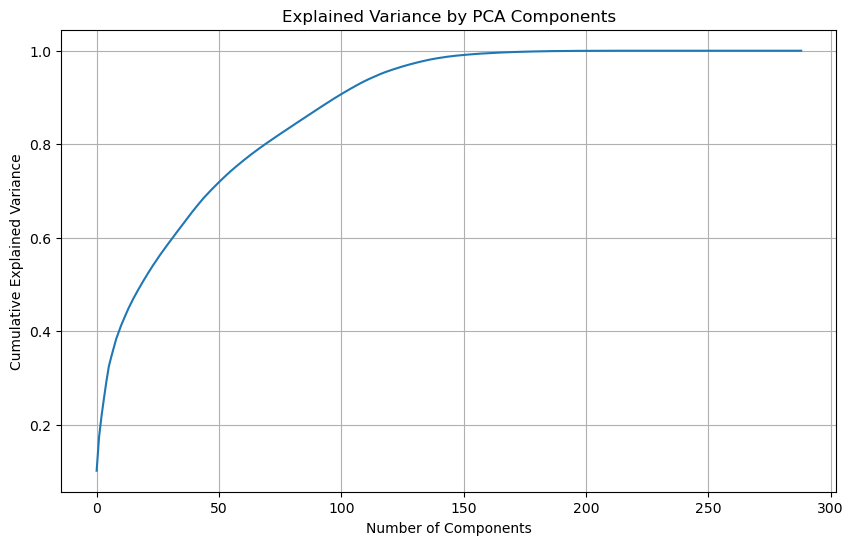

Top loadings for 2000:
Component 1:
EBITDA                                   0.172656
operatingIncome                          0.170646
totalAssets                              0.167744
totalLiabilitiesAndStockholdersEquity    0.167740
totalLiabilities                         0.164573
retainedEarnings                         0.159513
netIncome                                0.155900
totalStockholdersEquity                  0.153638
totalEquity                              0.152973
depreciationAndAmortization              0.150746
dtype: float64


Component 2:
priceEarningsRatio                0.218628
peRatio                           0.218628
enterpriseValueMultiple           0.218628
enterpriseValueOverEBITDA         0.218628
priceToOperatingCashFlowsRatio    0.218620
priceCashFlowRatio                0.218620
pocfratio                         0.218620
evToOperatingCashFlow             0.218620
priceToFreeCashFlowsRatio         0.218620
pfcfRatio                         0.218620
dtyp

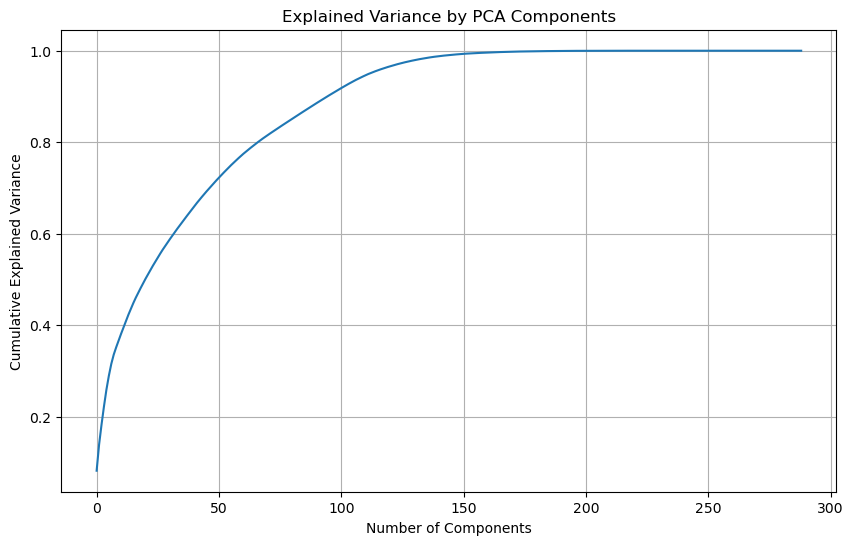

Top loadings for 2001:
Component 1:
totalLiabilitiesAndStockholdersEquity    0.185850
totalAssets                              0.185623
totalLiabilities                         0.183819
totalNonCurrentLiabilities               0.176850
EBITDA                                   0.173957
longTermDebt                             0.169828
totalDebt                                0.168183
interestIncome                           0.166759
netCurrentAssetValue                     0.166658
shortTermDebt                            0.163943
dtype: float64


Component 2:
priceToSalesRatio                 0.245661
priceSalesRatio                   0.245661
evToSales                         0.245587
priceCashFlowRatio                0.242110
priceToOperatingCashFlowsRatio    0.242110
pocfratio                         0.241734
evToOperatingCashFlow             0.241734
priceToFreeCashFlowsRatio         0.241583
pfcfRatio                         0.241206
priceEarningsToGrowthRatio        0.241087
dtyp

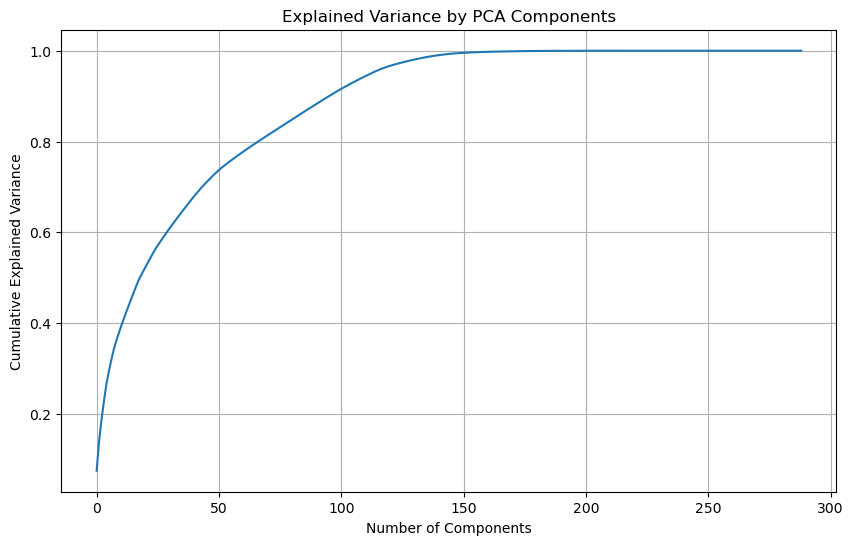

Top loadings for 2002:
Component 1:
EBITDA                                   0.205449
totalAssets                              0.195375
totalLiabilitiesAndStockholdersEquity    0.195368
totalLiabilities                         0.191305
netCashUsedForInvestingActivites         0.179717
totalDebt                                0.174191
interestIncome                           0.172094
netDebt                                  0.170435
totalEquity                              0.170074
totalStockholdersEquity                  0.168337
dtype: float64


Component 2:
priceToFreeCashFlowsRatio    0.230911
pfcfRatio                    0.230911
priceFairValue               0.228439
priceToBookRatio             0.228439
priceBookValueRatio          0.228439
pbRatio                      0.228439
ptbRatio                     0.228439
priceEarningsRatio           0.227461
peRatio                      0.227461
enterpriseValueMultiple      0.226770
dtype: float64


Component 3:
shortTermInvestments    

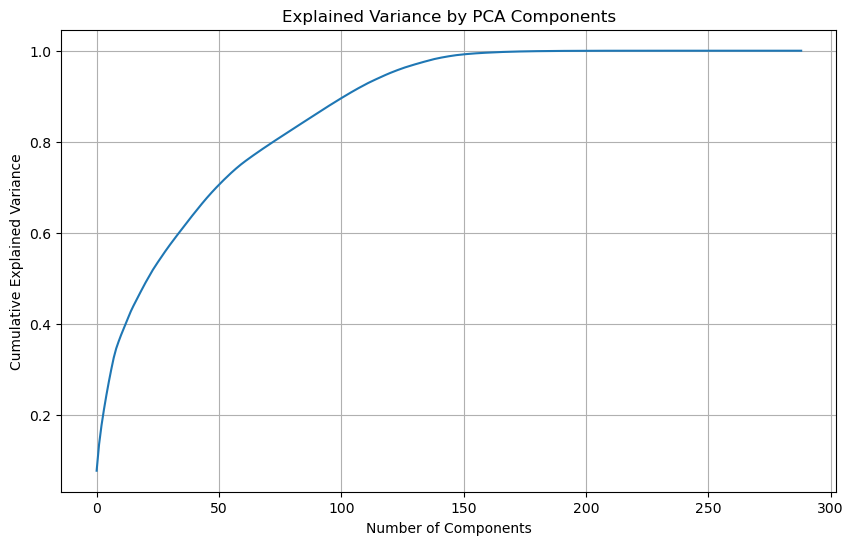

Top loadings for 2003:
Component 1:
totalAssets                              0.196652
totalLiabilitiesAndStockholdersEquity    0.196644
EBITDA                                   0.196586
totalLiabilities                         0.193885
interestIncome                           0.182235
totalNonCurrentLiabilities               0.180096
longTermDebt                             0.179441
totalDebt                                0.176954
netCashUsedForInvestingActivites         0.174948
netDebt                                  0.172952
dtype: float64


Component 2:
priceToFreeCashFlowsRatio    0.244418
priceToBookRatio             0.244417
priceBookValueRatio          0.244417
priceFairValue               0.244417
pfcfRatio                    0.244416
ptbRatio                     0.244416
pbRatio                      0.244416
enterpriseValueOverEBITDA    0.244340
enterpriseValueMultiple      0.244339
priceEarningsRatio           0.244323
dtype: float64


Component 3:
cashAtEndOfPeriod       

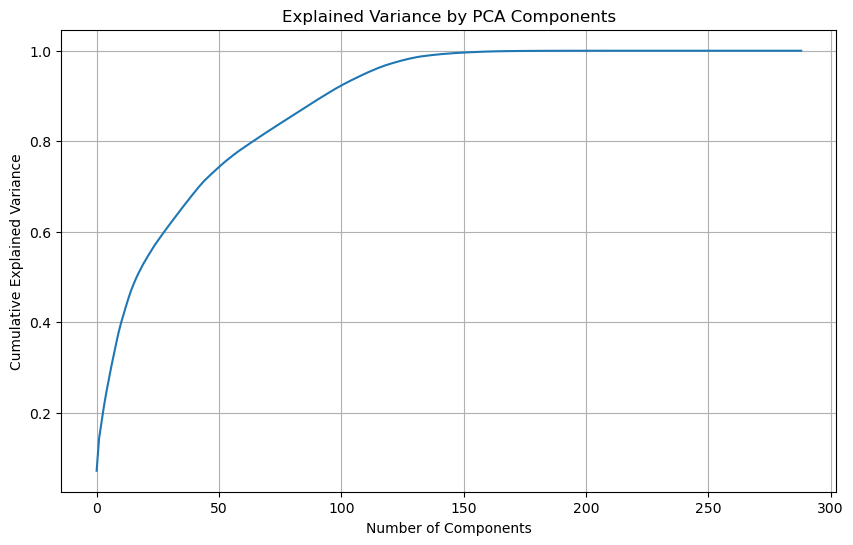

Top loadings for 2004:
Component 1:
totalLiabilities                         0.193845
totalAssets                              0.193275
totalLiabilitiesAndStockholdersEquity    0.193267
EBITDA                                   0.192139
purchasesOfInvestments                   0.189463
salesMaturitiesOfInvestments             0.187784
interestIncome                           0.180834
longTermDebt                             0.179018
totalDebt                                0.177998
totalNonCurrentLiabilities               0.175848
dtype: float64


Component 2:
enterpriseValueOverEBITDA         0.217999
enterpriseValueMultiple           0.217999
priceToBookRatio                  0.217587
priceFairValue                    0.217587
priceBookValueRatio               0.217587
ptbRatio                          0.217587
pbRatio                           0.217587
evToOperatingCashFlow             0.217495
priceToOperatingCashFlowsRatio    0.217495
priceCashFlowRatio                0.217495
dtyp

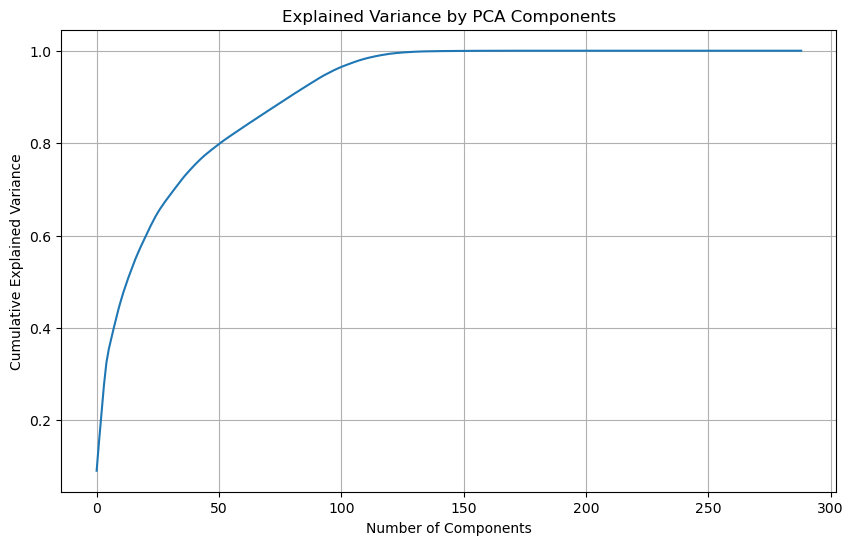

Top loadings for 2005:
Component 1:
costAndExpenses                  0.193946
costOfRevenue                    0.190190
grossProfit                      0.186875
growthCostAndExpenses            0.186502
operatingExpenses                0.185605
totalCurrentLiabilities          0.185589
purchasesOfInvestments           0.185423
otherCurrentLiabilities          0.185316
growthOtherLiabilities           0.185265
growthOtherInvestingActivites    0.185265
dtype: float64


Component 2:
totalStockholdersEquity                  0.190468
totalEquity                              0.190272
EBITDA                                   0.188370
totalAssets                              0.175922
totalLiabilitiesAndStockholdersEquity    0.175916
netIncome                                0.172829
retainedEarnings                         0.171050
totalLiabilities                         0.166208
revenue                                  0.159003
cashAtBeginningOfPeriod                  0.153781
dtype: float64

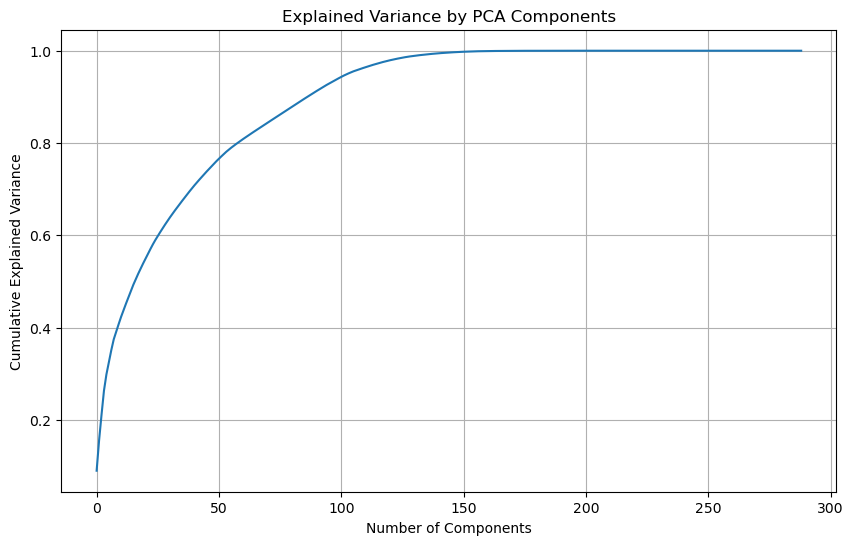

Top loadings for 2006:
Component 1:
totalCurrentLiabilities               0.195910
costAndExpenses                       0.195738
purchasesOfInvestments                0.195665
payablesTurnover                      0.195604
growthSalesMaturitiesOfInvestments    0.195603
growthAcquisitionsNet                 0.195603
acquisitionsNet                       0.195602
grossProfitRatio                      0.195602
grossProfitMargin                     0.195602
operatingProfitMargin                 0.195596
dtype: float64


Component 2:
totalAssets                              0.211959
totalLiabilitiesAndStockholdersEquity    0.211958
EBITDA                                   0.207042
totalEquity                              0.204730
totalStockholdersEquity                  0.204709
totalLiabilities                         0.203907
netCashUsedForInvestingActivites         0.185037
retainedEarnings                         0.184079
cashAtBeginningOfPeriod                  0.183926
netIncome     

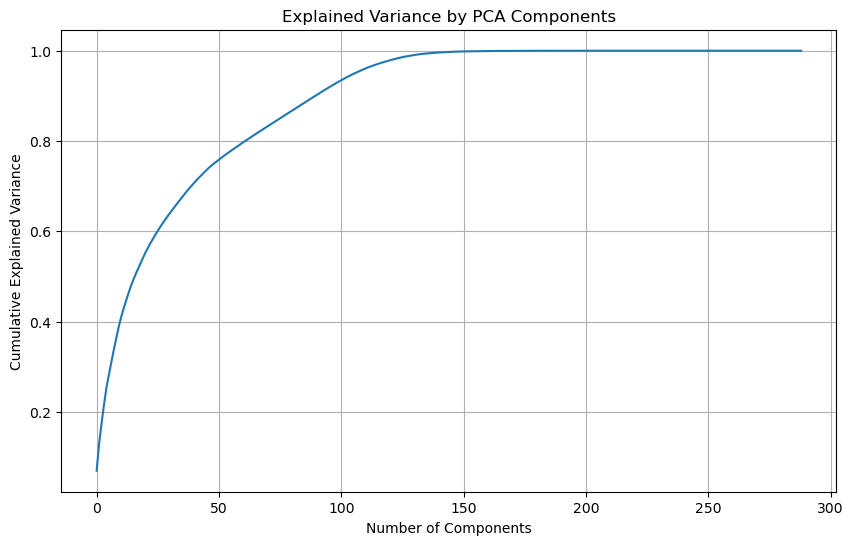

Top loadings for 2007:
Component 1:
totalAssets                              0.202684
totalLiabilitiesAndStockholdersEquity    0.202678
EBITDA                                   0.200397
totalLiabilities                         0.194785
operatingIncome                          0.190218
totalNonCurrentAssets                    0.175263
cashAtBeginningOfPeriod                  0.174840
retainedEarnings                         0.174306
dividendsPaid                            0.172063
grossProfit                              0.170722
dtype: float64


Component 2:
enterpriseValueOverEBITDA    0.242179
enterpriseValueMultiple      0.242154
priceEarningsRatio           0.242105
peRatio                      0.242054
enterpriseValue              0.241030
marketCap                    0.241029
priceToBookRatio             0.237765
priceFairValue               0.237765
priceBookValueRatio          0.237765
ptbRatio                     0.237638
dtype: float64


Component 3:
growthAccountsReceivable

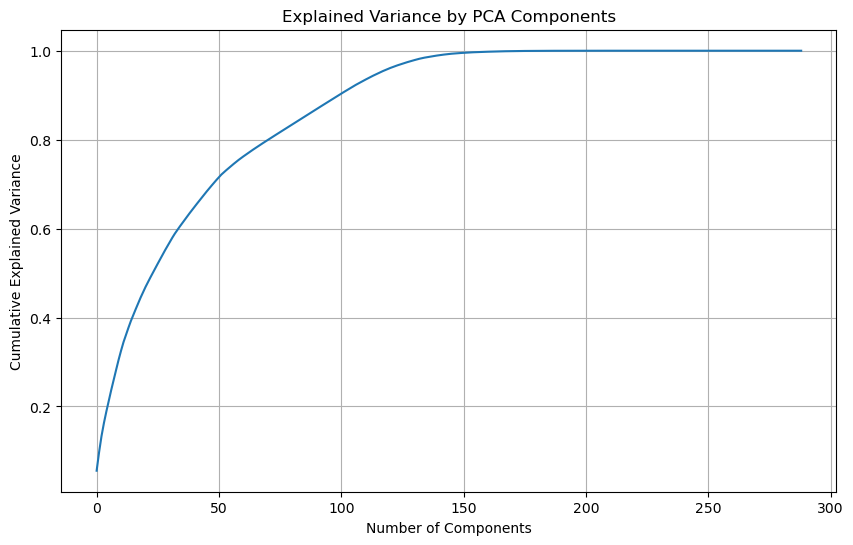

Top loadings for 2008:
Component 1:
totalAssets                              0.220232
totalLiabilitiesAndStockholdersEquity    0.220226
totalLiabilities                         0.209717
totalEquity                              0.205795
totalStockholdersEquity                  0.204450
longTermDebt                             0.203295
cashAtBeginningOfPeriod                  0.196739
cashAndCashEquivalents                   0.190363
grossProfit                              0.179616
totalDebt                                0.179218
dtype: float64


Component 2:
otherAssets                                 0.256609
totalCurrentAssets                          0.253304
netCurrentAssetValue                        0.247425
workingCapital                              0.240149
netCashUsedProvidedByFinancingActivities    0.216133
growthAcquisitionsNet                       0.215426
otherLiabilities                            0.213433
otherFinancingActivites                     0.210709
otherNonCu

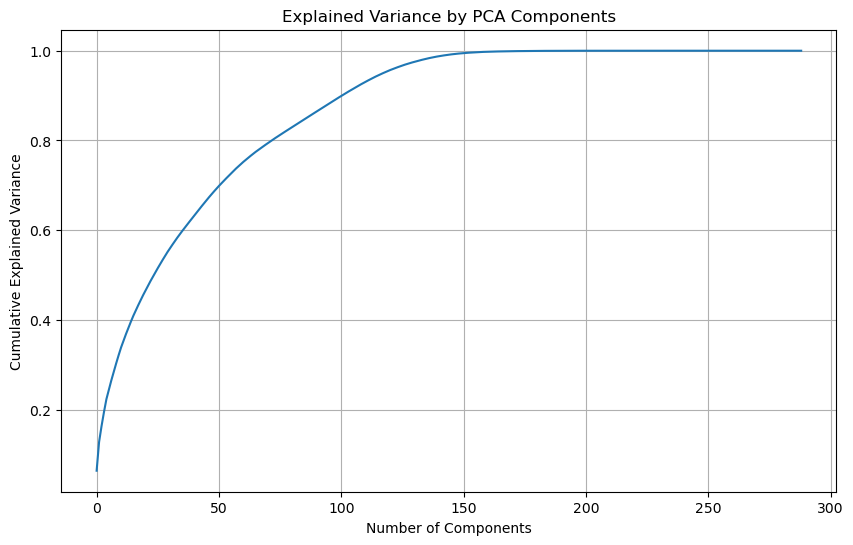

Top loadings for 2009:
Component 1:
pocfratio                         0.209978
priceCashFlowRatio                0.209978
priceToOperatingCashFlowsRatio    0.209978
evToOperatingCashFlow             0.209978
pfcfRatio                         0.209976
priceToFreeCashFlowsRatio         0.209976
priceEarningsRatio                0.209616
peRatio                           0.209616
priceToBookRatio                  0.209564
pbRatio                           0.209564
dtype: float64


Component 2:
totalAssets                                 0.195810
totalLiabilitiesAndStockholdersEquity       0.195807
totalLiabilities                            0.187320
totalStockholdersEquity                     0.184092
totalEquity                                 0.183739
cashAndCashEquivalents                      0.178482
longTermDebt                                0.168704
interestIncome                              0.164342
netCashUsedProvidedByFinancingActivities    0.163764
interestExpense            

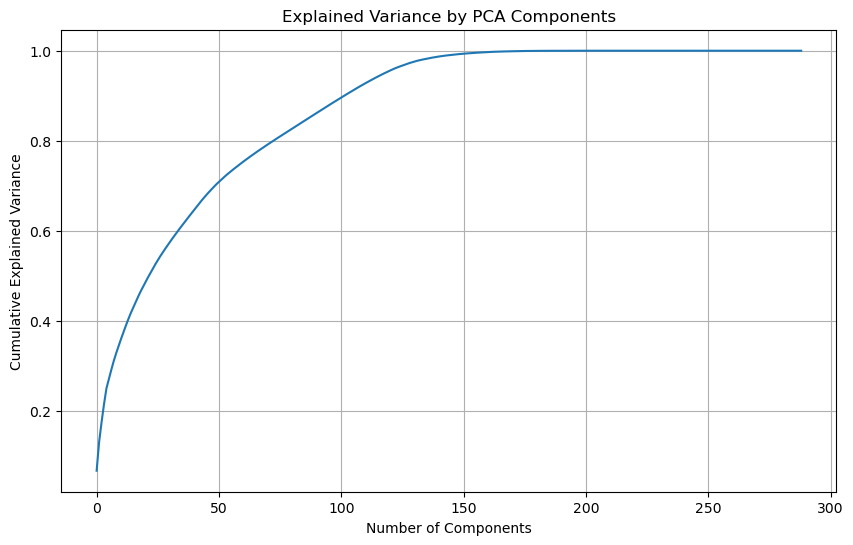

Top loadings for 2010:
Component 1:
pbRatio                           0.226560
ptbRatio                          0.226560
priceBookValueRatio               0.226560
priceToBookRatio                  0.226560
priceFairValue                    0.226560
evToOperatingCashFlow             0.226367
pocfratio                         0.226367
priceToOperatingCashFlowsRatio    0.226367
priceCashFlowRatio                0.226367
marketCap                         0.226159
dtype: float64


Component 2:
totalAssets                              0.207730
totalLiabilitiesAndStockholdersEquity    0.207726
cashAtEndOfPeriod                        0.202278
totalLiabilities                         0.198561
cashAtBeginningOfPeriod                  0.194735
cashAndCashEquivalents                   0.187687
interestIncome                           0.177884
totalStockholdersEquity                  0.176012
totalEquity                              0.175989
totalDebt                                0.165100
dtyp

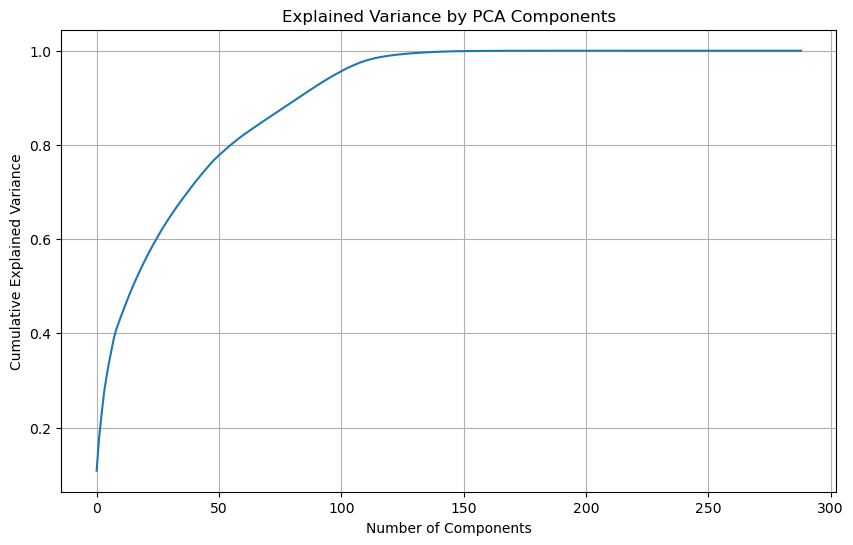

Top loadings for 2011:
Component 1:
growthOperatingIncome                     0.178565
operatingIncome                           0.178499
cashAtBeginningOfPeriod                   0.178495
growthSalesMaturitiesOfInvestments        0.178485
growthEBITDA                              0.178485
interestIncome                            0.178482
growthNetCashUsedForInvestingActivites    0.178482
growthRevenue                             0.178481
EBITDA                                    0.178478
freeCashFlow                              0.178461
dtype: float64


Component 2:
priceToFreeCashFlowsRatio         0.223602
pfcfRatio                         0.223602
evToOperatingCashFlow             0.223602
priceCashFlowRatio                0.223602
priceToOperatingCashFlowsRatio    0.223602
pocfratio                         0.223602
peRatio                           0.223602
priceEarningsRatio                0.223602
priceBookValueRatio               0.223602
priceToBookRatio                  0.2

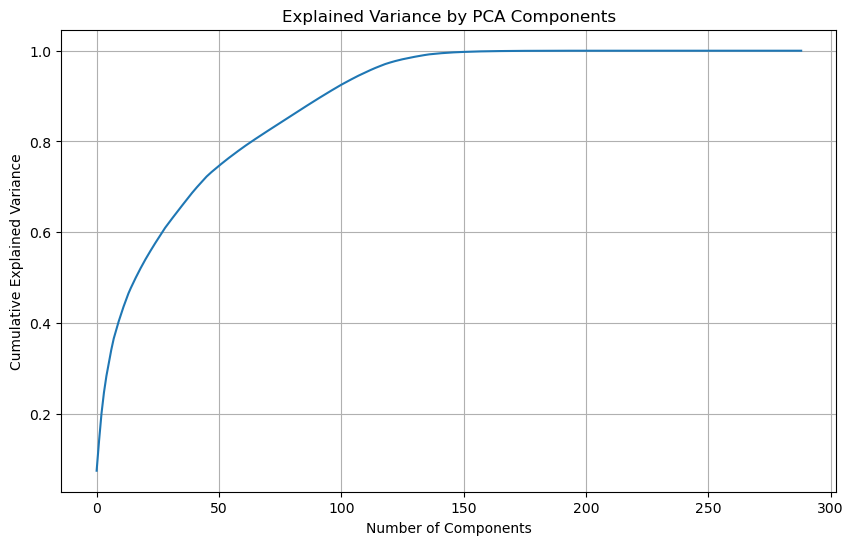

Top loadings for 2012:
Component 1:
cashAtBeginningOfPeriod                0.210856
dividendsPaid                          0.208437
cashAtEndOfPeriod                      0.208137
revenue                                0.207939
EBITDA                                 0.207401
operatingIncome                        0.207369
freeCashFlow                           0.207353
interestIncome                         0.207310
operatingCashFlow                      0.207247
netCashProvidedByOperatingActivites    0.207247
dtype: float64


Component 2:
priceFairValue                    0.227291
priceBookValueRatio               0.227291
priceToBookRatio                  0.227291
priceToOperatingCashFlowsRatio    0.227291
priceCashFlowRatio                0.227291
priceToFreeCashFlowsRatio         0.227290
marketCap                         0.227286
ptbRatio                          0.227282
pbRatio                           0.227282
pocfratio                         0.227282
dtype: float64


Compone

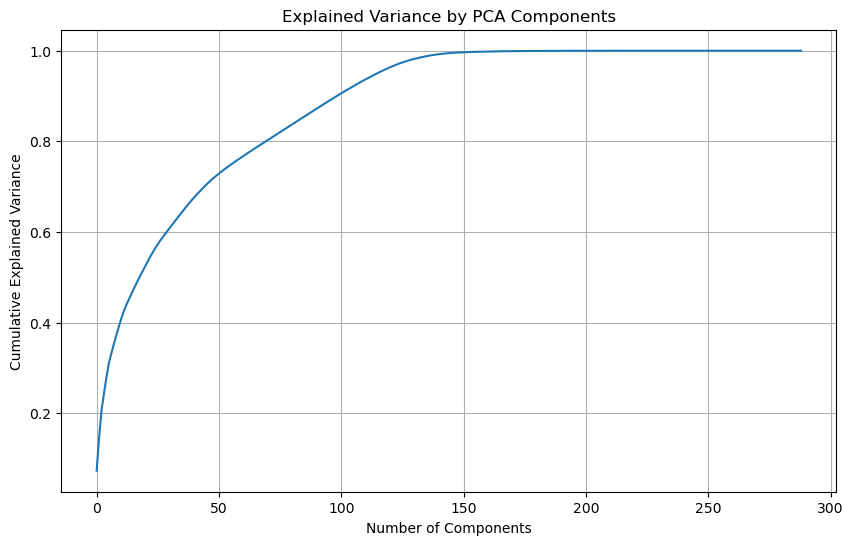

Top loadings for 2013:
Component 1:
priceEarningsToGrowthRatio        0.180854
priceToBookRatio                  0.180854
priceFairValue                    0.180854
priceBookValueRatio               0.180854
priceEarningsRatio                0.180853
enterpriseValueOverEBITDA         0.180853
enterpriseValueMultiple           0.180853
evToOperatingCashFlow             0.180767
priceCashFlowRatio                0.180767
priceToOperatingCashFlowsRatio    0.180767
dtype: float64


Component 2:
totalAssets                              0.163850
totalLiabilitiesAndStockholdersEquity    0.162984
totalLiabilities                         0.157208
netIncome                                0.152944
incomeBeforeTax                          0.152612
operatingCashFlow                        0.152238
netCashProvidedByOperatingActivites      0.152238
cashAtBeginningOfPeriod                  0.142077
interestIncome                           0.140881
totalStockholdersEquity                  0.136476
dtyp

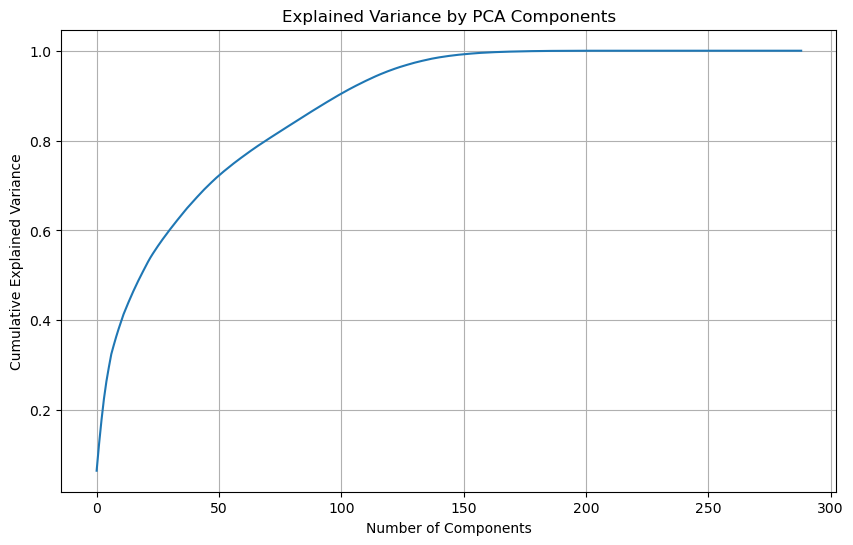

Top loadings for 2014:
Component 1:
workingCapital                  0.228310
totalCurrentAssets              0.227921
salesMaturitiesOfInvestments    0.226927
shortTermDebt                   0.226199
purchasesOfInvestments          0.225910
shortTermInvestments            0.225580
otherInvestingActivites         0.225577
totalInvestments                0.225554
debtEquityRatio                 0.225347
debtToEquity                    0.225347
dtype: float64


Component 2:
priceEarningsToGrowthRatio        0.239689
peRatio                           0.239677
priceEarningsRatio                0.239677
pocfratio                         0.239674
priceToOperatingCashFlowsRatio    0.239674
priceCashFlowRatio                0.239674
evToOperatingCashFlow             0.239674
pfcfRatio                         0.239670
priceToFreeCashFlowsRatio         0.239670
priceToBookRatio                  0.239666
dtype: float64


Component 3:
totalLiabilitiesAndStockholdersEquity     0.211700
totalAssets  

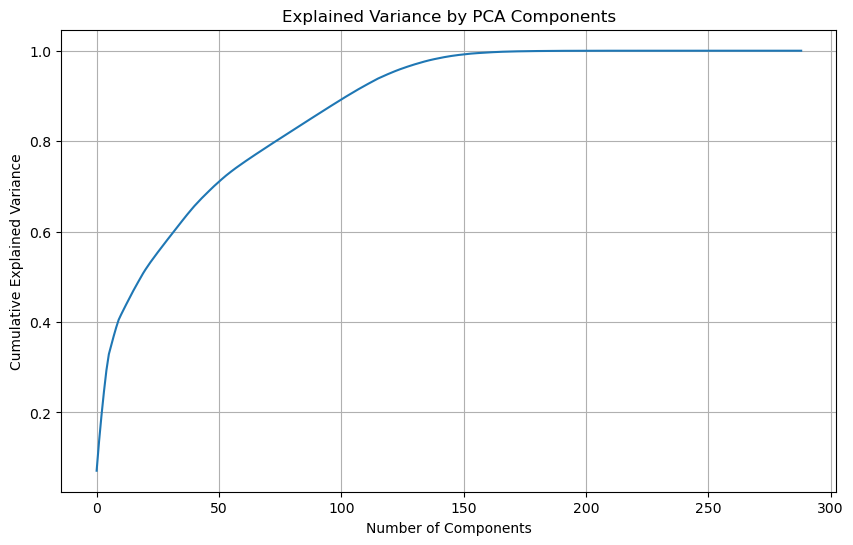

Top loadings for 2015:
Component 1:
priceToSalesRatio                 0.203716
priceSalesRatio                   0.203716
priceEarningsToGrowthRatio        0.203716
priceEarningsRatio                0.203716
priceToOperatingCashFlowsRatio    0.203716
priceCashFlowRatio                0.203716
priceToFreeCashFlowsRatio         0.203716
priceToBookRatio                  0.203716
priceFairValue                    0.203716
priceBookValueRatio               0.203716
dtype: float64


Component 2:
incomeBeforeTax                          0.191773
netIncome                                0.188556
dividendsPaid                            0.186841
totalStockholdersEquity                  0.183880
EBITDA                                   0.182766
netCashProvidedByOperatingActivites      0.175591
operatingCashFlow                        0.175591
revenue                                  0.173418
totalAssets                              0.172181
totalLiabilitiesAndStockholdersEquity    0.170389
dtyp

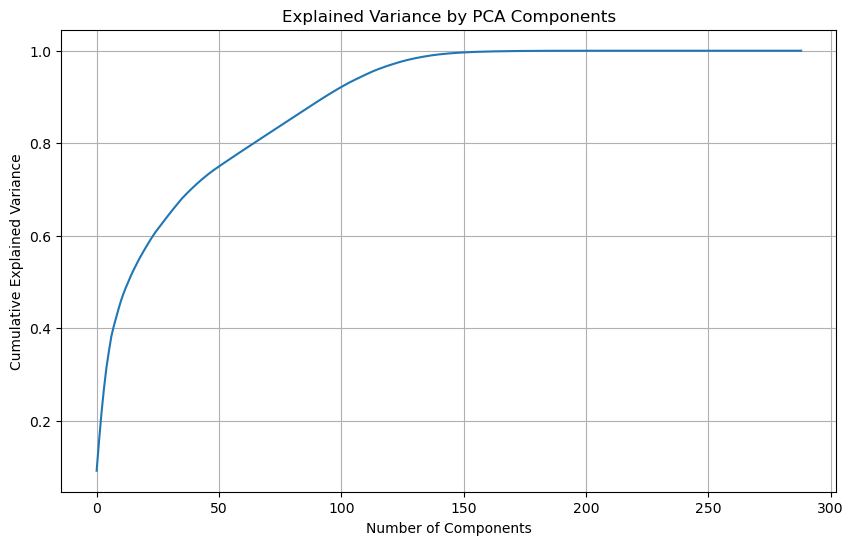

Top loadings for 2016:
Component 1:
growthRetainedEarnings                          0.194504
growthCapitalExpenditure                        0.194502
growthInvestmentsInPropertyPlantAndEquipment    0.194502
growthIntangibleAssets                          0.194502
growthChangeInWorkingCapital                    0.194493
growthTotalNonCurrentAssets                     0.194484
growthGoodwill                                  0.194480
growthGoodwillAndIntangibleAssets               0.194480
growthStockBasedCompensation                    0.194480
growthTotalCurrentLiabilities                   0.194394
dtype: float64


Component 2:
priceSalesRatio                   0.230086
priceToSalesRatio                 0.230086
priceEarningsRatio                0.230086
priceEarningsToGrowthRatio        0.230086
priceCashFlowRatio                0.230086
priceToOperatingCashFlowsRatio    0.230086
priceToFreeCashFlowsRatio         0.230086
priceToBookRatio                  0.230086
priceFairValue      

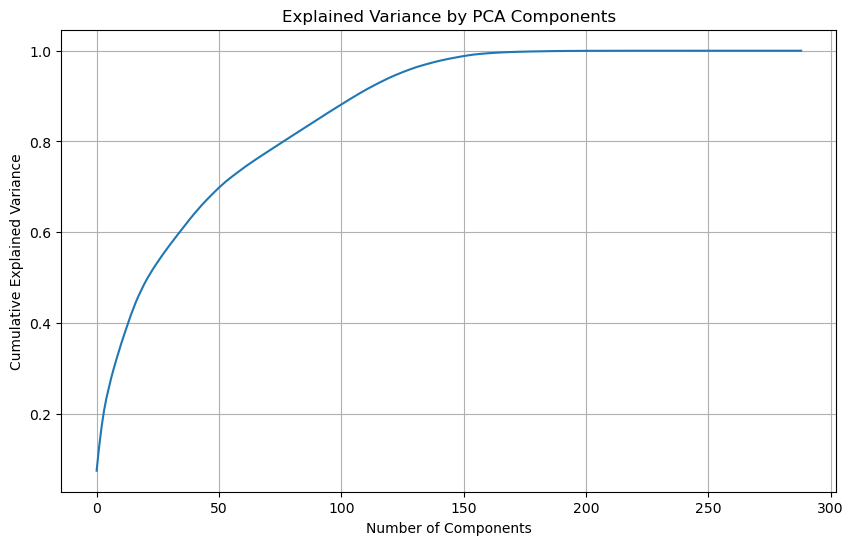

Top loadings for 2017:
Component 1:
operatingIncome                           0.192450
EBITDA                                    0.186267
incomeBeforeTax                           0.179013
totalAssets                               0.177982
totalLiabilitiesAndStockholdersEquity     0.176798
totalStockholdersEquity                   0.168500
totalLiabilities                          0.166491
netIncome                                 0.162675
capitalExpenditure                        0.159273
investmentsInPropertyPlantAndEquipment    0.159273
dtype: float64


Component 2:
investedCapital                 0.253401
inventory                       0.252877
totalCurrentAssets              0.251404
workingCapital                  0.251124
otherAssets                     0.251116
netCurrentAssetValue            0.249950
averageInventory                0.248807
salesMaturitiesOfInvestments    0.247773
purchasesOfInvestments          0.241329
currentRatio                    0.189894
dtype: float64

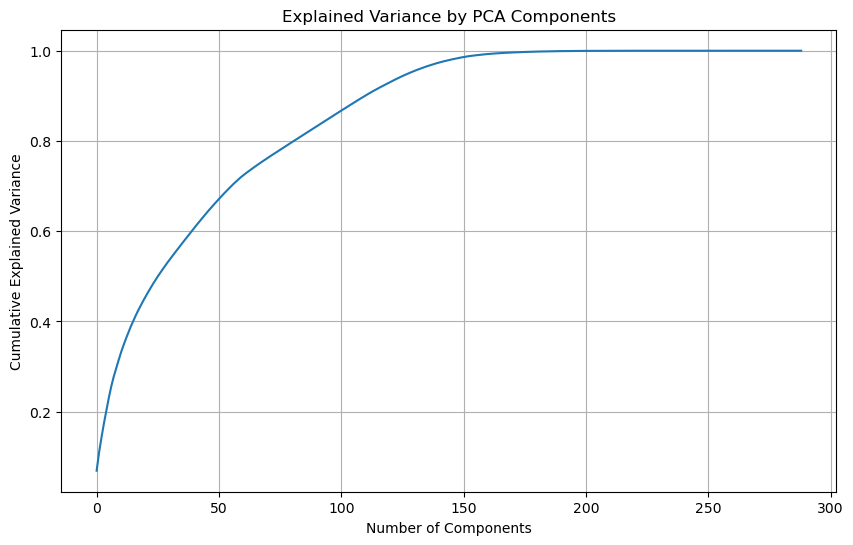

Top loadings for 2018:
Component 1:
totalLiabilities                         0.196171
netCurrentAssetValue                     0.179447
operatingIncome                          0.179285
EBITDA                                   0.171273
totalAssets                              0.169721
totalLiabilitiesAndStockholdersEquity    0.167913
totalNonCurrentLiabilities               0.162323
accountPayables                          0.162213
totalCurrentAssets                       0.159166
averagePayables                          0.154957
dtype: float64


Component 2:
deferrredTaxLiabilitiesNonCurrent    0.244686
minorityInterest                     0.240795
deferredRevenueNonCurrent            0.237655
capitalLeaseObligations              0.234289
debtRepayment                        0.226027
longTermDebt                         0.211042
netDebt                              0.204173
otherFinancingActivites              0.203680
totalDebt                            0.202612
otherNonCurrentLiabi

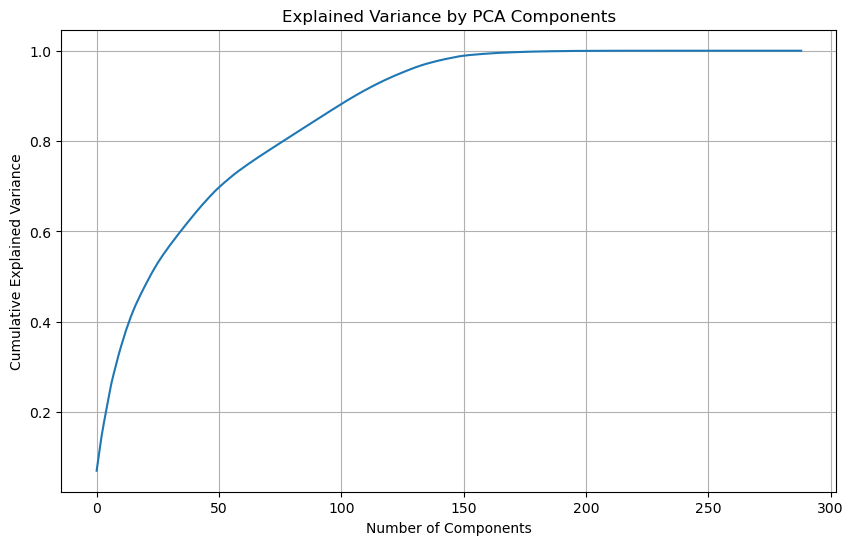

Top loadings for 2019:
Component 1:
totalCurrentLiabilities                0.172341
totalCurrentAssets                     0.172323
totalLiabilities                       0.169933
operatingCashFlow                      0.169534
netCashProvidedByOperatingActivites    0.169534
accountPayables                        0.161664
EBITDA                                 0.160835
totalNonCurrentAssets                  0.160325
incomeTaxExpense                       0.156764
operatingIncome                        0.156611
dtype: float64


Component 2:
minorityInterest              0.215754
deferredRevenueNonCurrent     0.215597
debtRepayment                 0.207643
totalNonCurrentLiabilities    0.204697
longTermDebt                  0.201148
netCurrentAssetValue          0.198242
totalDebt                     0.191200
totalEquity                   0.184750
otherFinancingActivites       0.183335
netDebt                       0.178829
dtype: float64


Component 3:
pretaxProfitMargin                

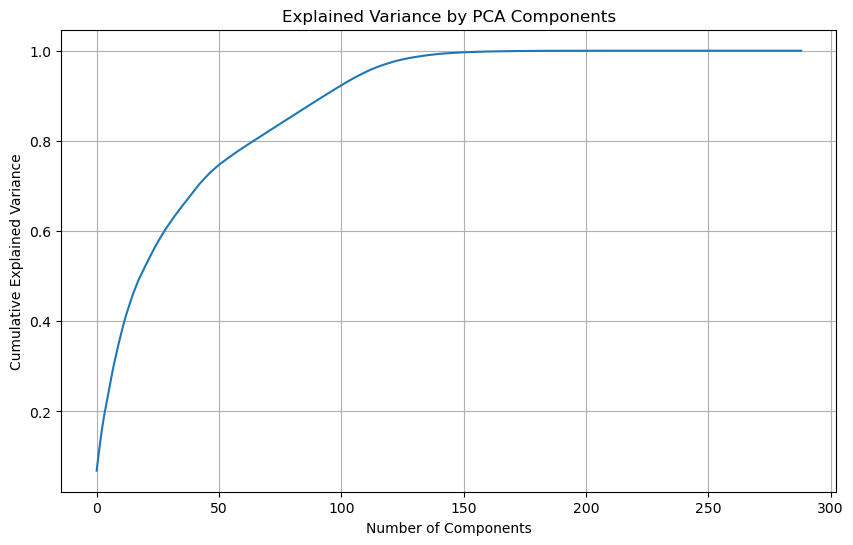

Top loadings for 2020:
Component 1:
totalAssets                              0.217740
totalLiabilitiesAndStockholdersEquity    0.217693
totalLiabilities                         0.201967
totalCurrentAssets                       0.189254
totalNonCurrentAssets                    0.180692
netCurrentAssetValue                     0.176410
cashAndShortTermInvestments              0.172164
totalEquity                              0.171263
investedCapital                          0.169166
totalStockholdersEquity                  0.165093
dtype: float64


Component 2:
incomeBeforeTax                   0.276931
netIncome                         0.276271
operatingIncome                   0.275225
EBITDA                            0.274916
totalOtherIncomeExpensesNet       0.274654
interestExpense                   0.274363
ResearchAndDevelopmentExpenses    0.273934
growthNetIncome                   0.272607
growthInterestExpense             0.272457
otherExpenses                     0.262959
dtyp

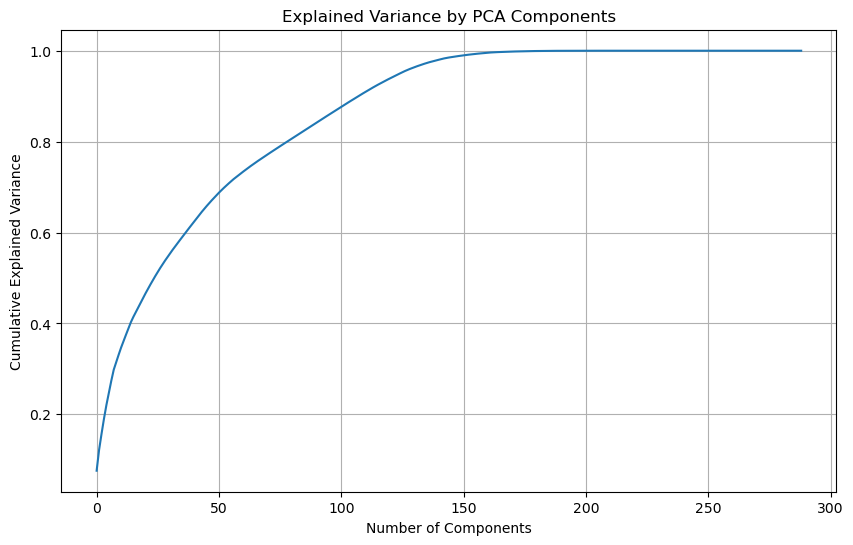

Top loadings for 2021:
Component 1:
totalCurrentAssets                       0.202442
totalStockholdersEquity                  0.199664
goodwillAndIntangibleAssets              0.193146
totalCurrentLiabilities                  0.192496
tangibleAssetValue                       0.190072
totalAssets                              0.188362
totalLiabilitiesAndStockholdersEquity    0.188330
intangibleAssets                         0.184747
workingCapital                           0.181983
growthDebtRepayment                      0.180860
dtype: float64


Component 2:
netCurrentAssetValue          0.226935
longTermDebt                  0.203278
capitalLeaseObligations       0.199874
netDebt                       0.198615
totalDebt                     0.197505
totalNonCurrentLiabilities    0.196149
otherAssets                   0.189982
totalLiabilities              0.185615
minorityInterest              0.179594
deferredRevenueNonCurrent     0.175360
dtype: float64


Component 3:
operatingIncom

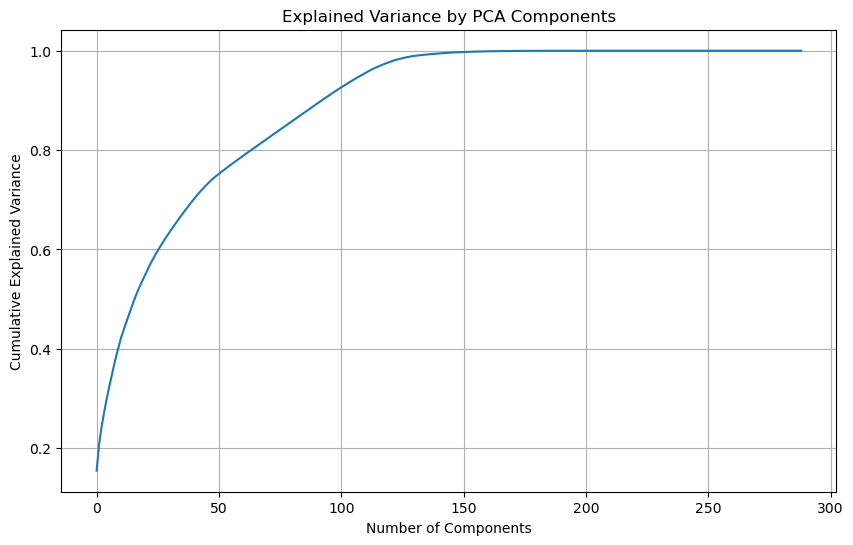

Top loadings for 2022:
Component 1:
growthTotalNonCurrentAssets                    0.148665
capitalLeaseObligations                        0.148629
growthTotalCurrentAssets                       0.148623
growthTotalLiabilitiesAndStockholdersEquity    0.148622
growthCashAndCashEquivalents                   0.148622
growthCashAndShortTermInvestments              0.148622
growthTotalLiabilities                         0.148622
growthTotalCurrentLiabilities                  0.148622
growthRetainedEarnings                         0.148622
growthNetDebt                                  0.148621
dtype: float64


Component 2:
totalLiabilitiesAndStockholdersEquity    0.246226
totalAssets                              0.246209
totalNonCurrentAssets                    0.242416
totalEquity                              0.242414
totalStockholdersEquity                  0.240793
tangibleAssetValue                       0.239192
commonStock                              0.238093
depreciationAndAmortizat

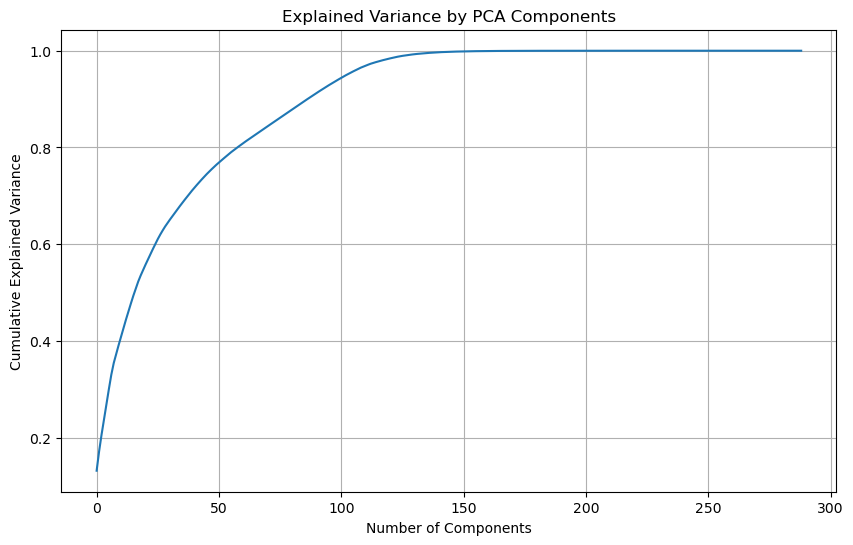

Top loadings for 2023:
Component 1:
totalAssets                              0.159496
totalLiabilitiesAndStockholdersEquity    0.159496
totalLiabilities                         0.159148
totalNonCurrentAssets                    0.158127
totalNonCurrentLiabilities               0.156048
totalDebt                                0.155620
totalStockholdersEquity                  0.154130
longTermDebt                             0.154122
totalCurrentAssets                       0.151401
totalEquity                              0.151227
dtype: float64


Component 2:
investedCapital            0.284911
commonStockRepurchased     0.283870
shortTermDebt              0.283573
otherLiabilities           0.283484
debtToEquity               0.283464
debtEquityRatio            0.283463
otherFinancingActivites    0.281461
workingCapital             0.280590
debtToAssets               0.271524
debtRatio                  0.271524
dtype: float64


Component 3:
costAndExpenses                   0.247725
a

In [11]:
# Initialize the dictionary to store PCA results
pca_analysis_results = {}

# Loop through each dataset and perform PCA analysis
for year, df in full_df.items():
    try:
        print(f"\nPerforming PCA analysis for {year} dataset...\n")
        
        # Perform PCA analysis
        pca, explained_variance_plot, loadings_dict = perform_pca_analysis(df)
        
        # Store the PCA results
        pca_analysis_results[year] = {
            'pca_model': pca,
            'explained_variance_plot': explained_variance_plot,
            'loadings': loadings_dict
        }
        
        # Show explained variance plot
        print(f"Explained variance plot for {year}:")
        explained_variance_plot.show()
        plt.close()  # Close the figure to prevent too many open figures

        # Print the top loadings for each component
        print(f"Top loadings for {year}:")
        for component, loadings in loadings_dict.items():
            print(f"{component}:")
            print(loadings)
            print("\n")
    
    except Exception as e:
        print(f"Error performing PCA analysis on {year}: {e}")

## 2. Clustering

In this step, we will apply **Clustering** techniques to group stocks with similar characteristics. Clustering is an unsupervised learning method that helps identify patterns and relationships in the data by grouping similar data points together. These clusters can be used to create new features that capture the behavior of similar stocks, providing additional insights for the machine learning model.


In [13]:
# Make clustering
def kmeans_clustering_analysis(data, pca_components=2, num_clusters=4):
    """
    Perform K-means clustering on the provided dataset and visualize the clusters.
    
    Parameters:
    - data (DataFrame): The dataset to perform clustering on.
    - pca_components (int): Number of PCA components to use for clustering.
    - num_clusters (int): Number of clusters to form.
    
    Returns:
    - clusters: The cluster labels for each data point.
    - cluster_plot: Matplotlib figure object for the cluster plot.
    """
    # Isolate numeric data for clustering
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=pca_components)
    pca_data = pca.fit_transform(scaled_data)
    
    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(pca_data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 15), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method to Determine Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

    # Apply K-means clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(pca_data)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(pca_data, clusters)
    silhouette_values = silhouette_samples(pca_data, clusters)
    
    # Add cluster labels to the original data
    data['Cluster'] = clusters
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    cluster_plot = plt
    
    return clusters, cluster_plot, silhouette_avg, silhouette_values

# Run silhouette
def plot_silhouette_scores(clusters, silhouette_values, num_clusters, silhouette_avg):
    """
    Plot silhouette scores for each sample in each cluster.
    
    Parameters:
    - clusters: Cluster labels for each data point.
    - silhouette_values: Silhouette values for each data point.
    - num_clusters: Number of clusters.
    - silhouette_avg: Average silhouette score.
    
    Returns:
    - silhouette_plot: Matplotlib figure object for the silhouette plot.
    """
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_silhouette_values = silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values)
        
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10

    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.title("Silhouette plot for the various clusters")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()


Performing K-means clustering for 2000 dataset...



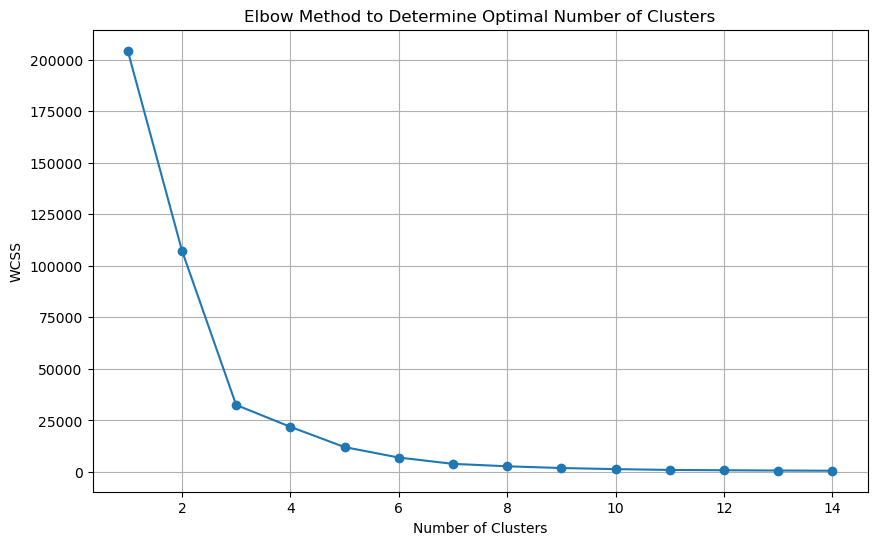

Cluster plot for 2000:


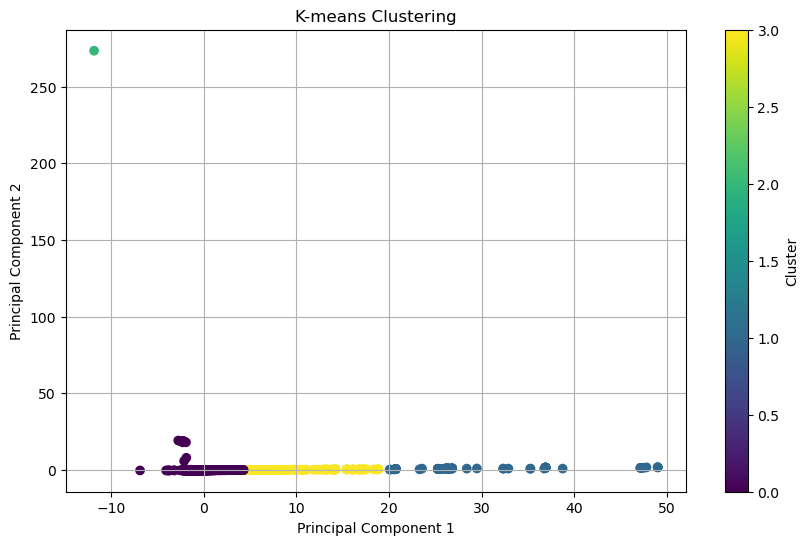

Silhouette plot for 2000:


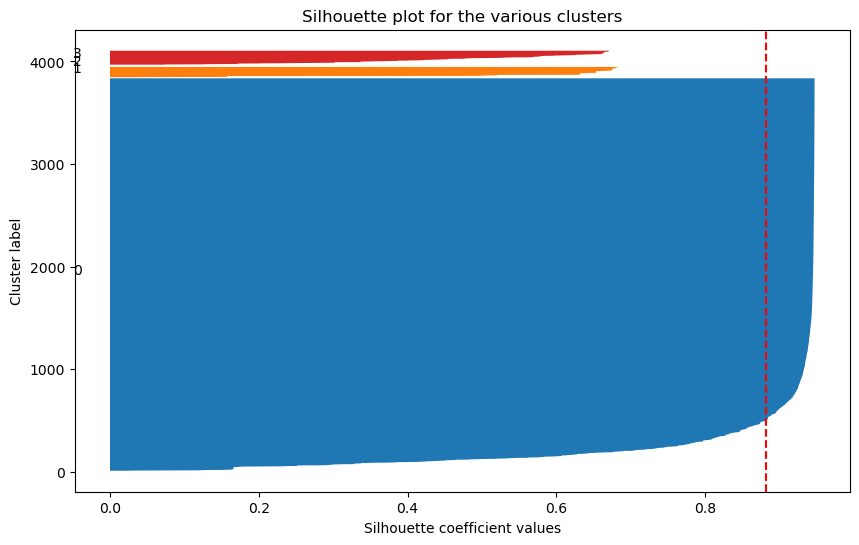


Performing K-means clustering for 2001 dataset...



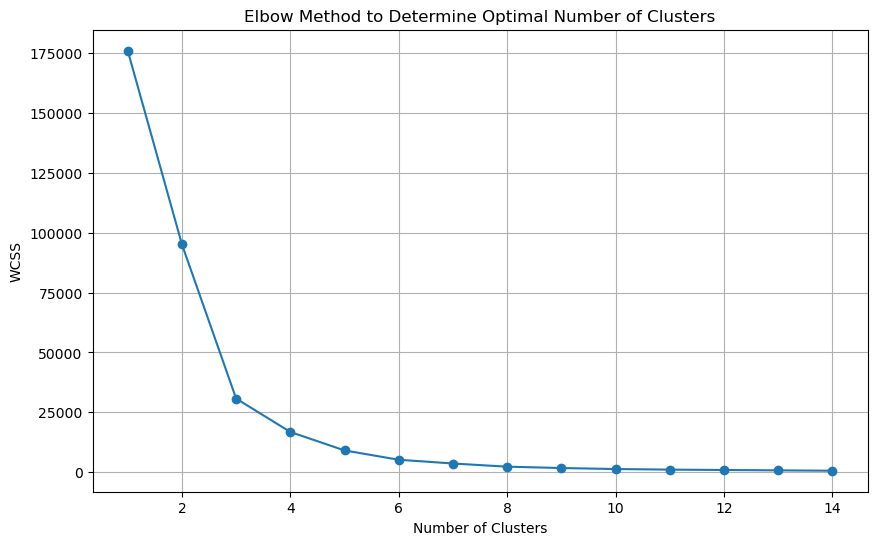

Cluster plot for 2001:


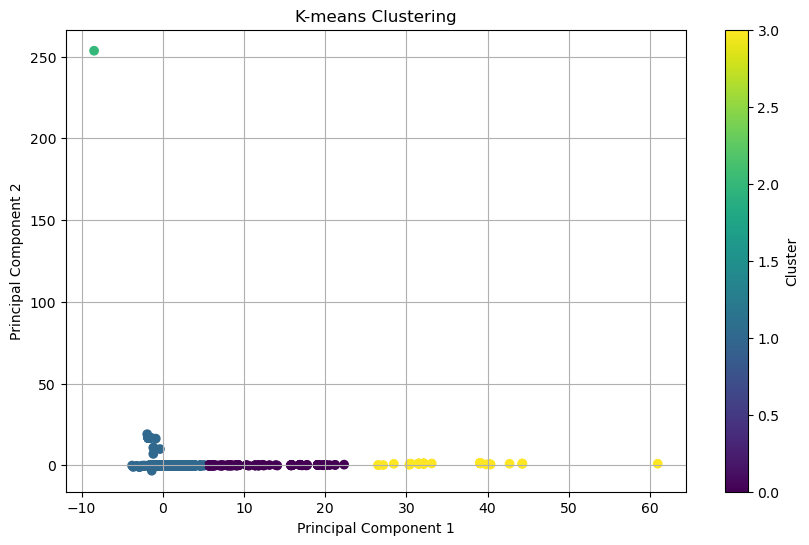

Silhouette plot for 2001:


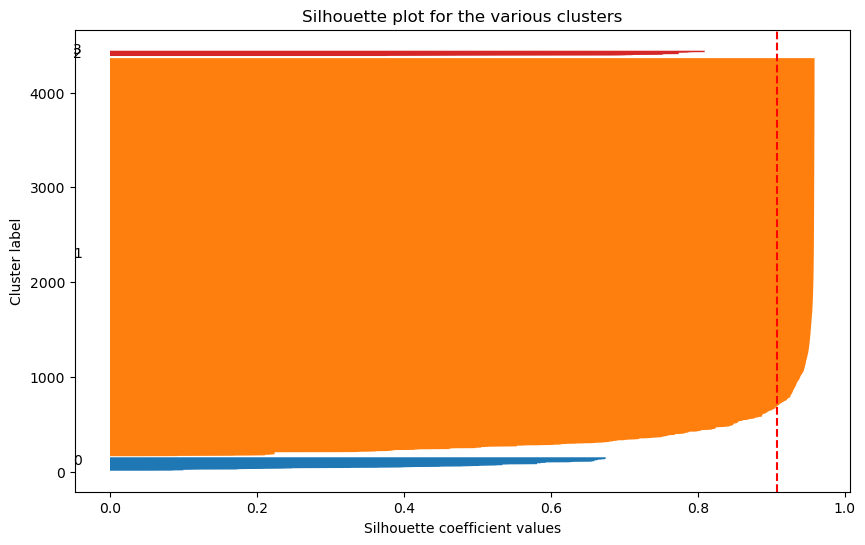


Performing K-means clustering for 2002 dataset...



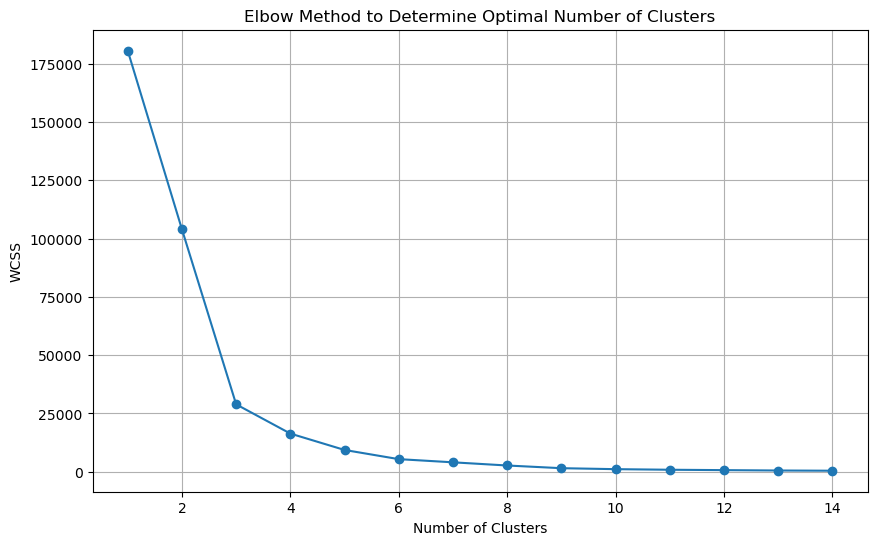

Cluster plot for 2002:


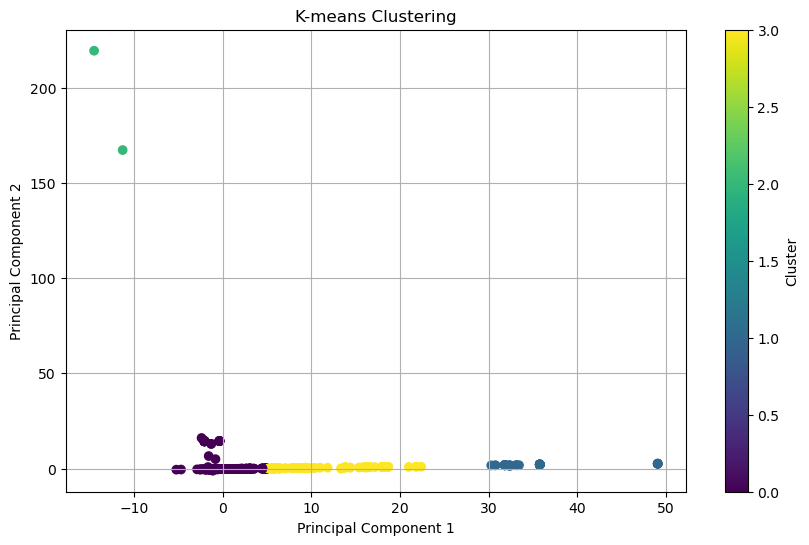

Silhouette plot for 2002:


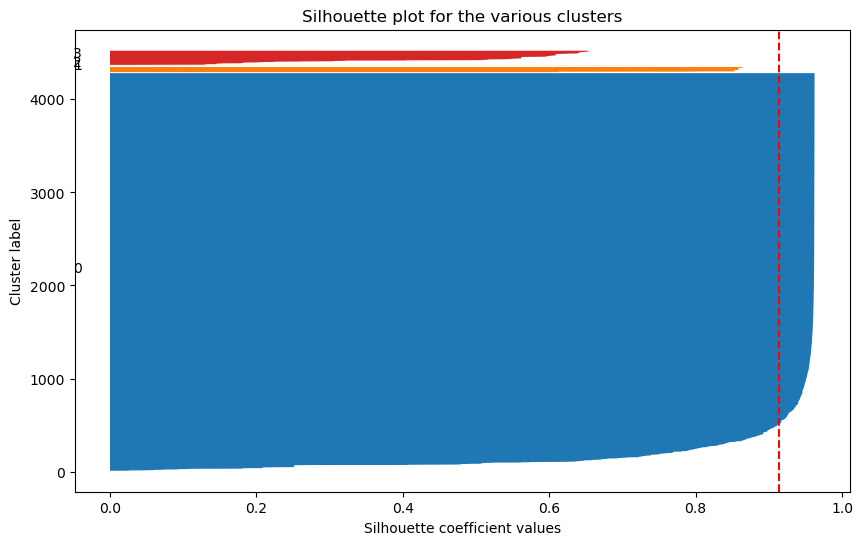


Performing K-means clustering for 2003 dataset...



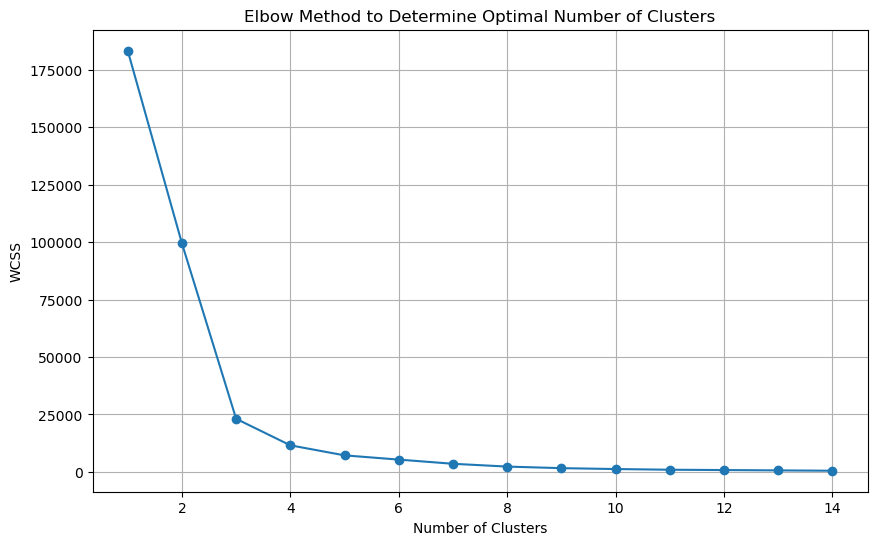

Cluster plot for 2003:


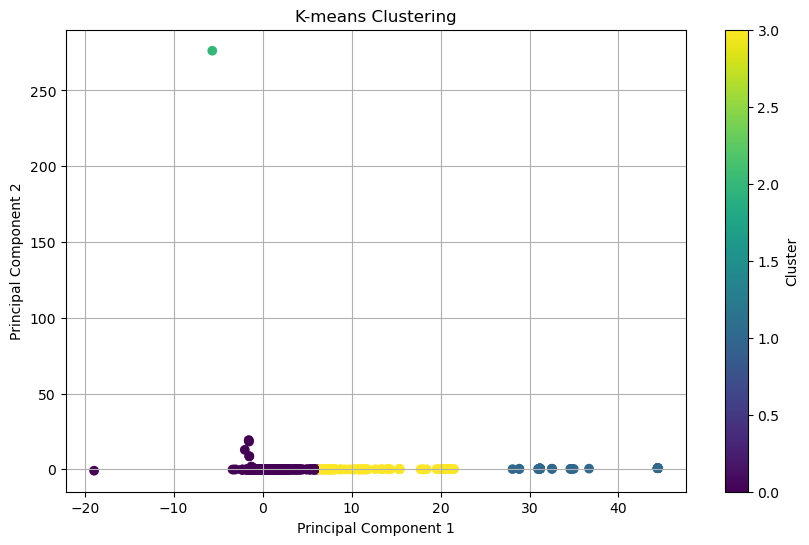

Silhouette plot for 2003:


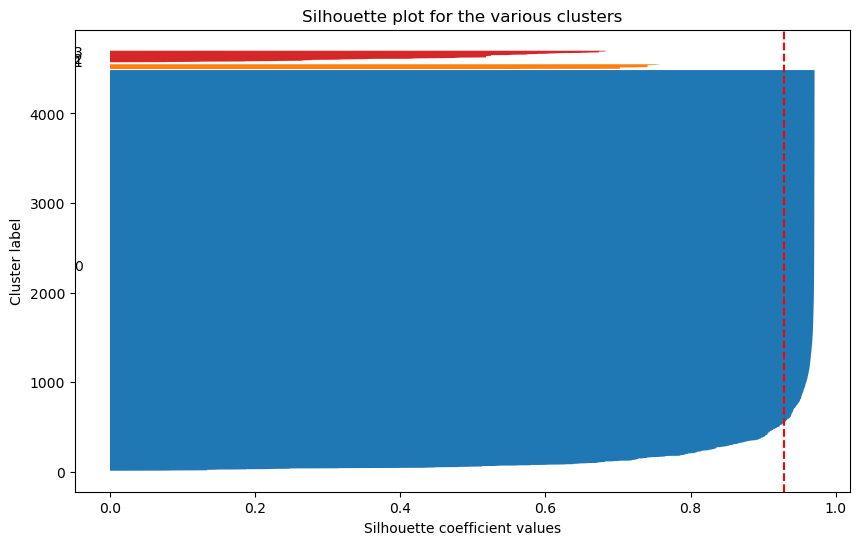


Performing K-means clustering for 2004 dataset...



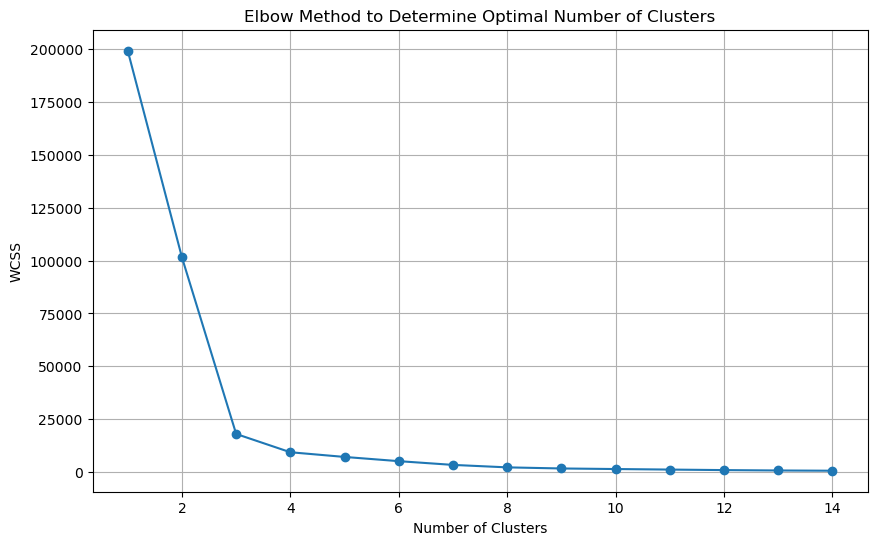

Cluster plot for 2004:


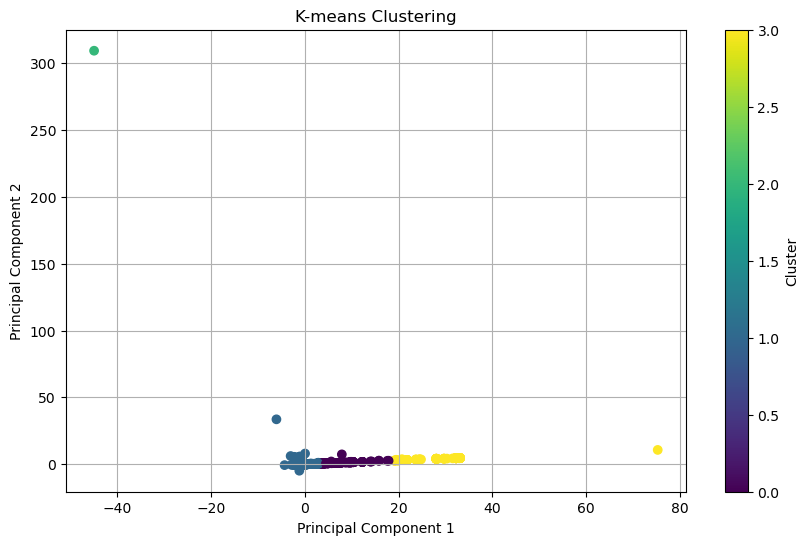

Silhouette plot for 2004:


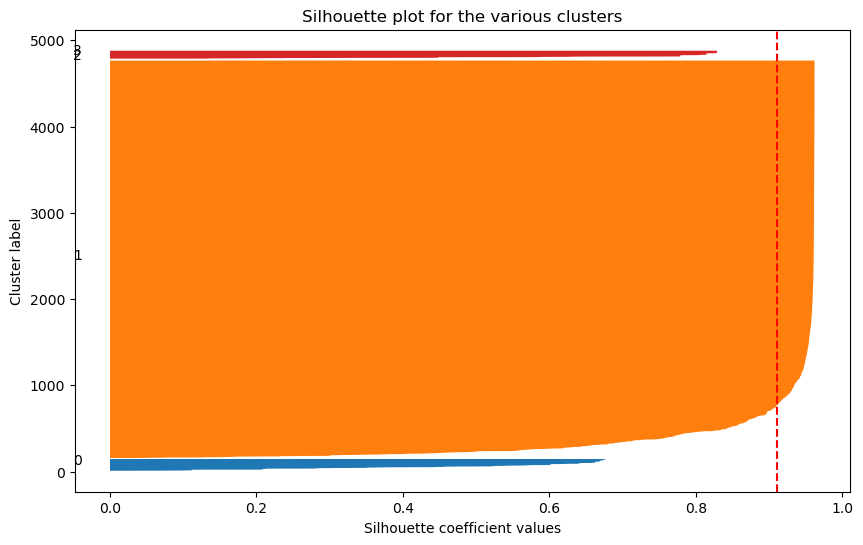


Performing K-means clustering for 2005 dataset...



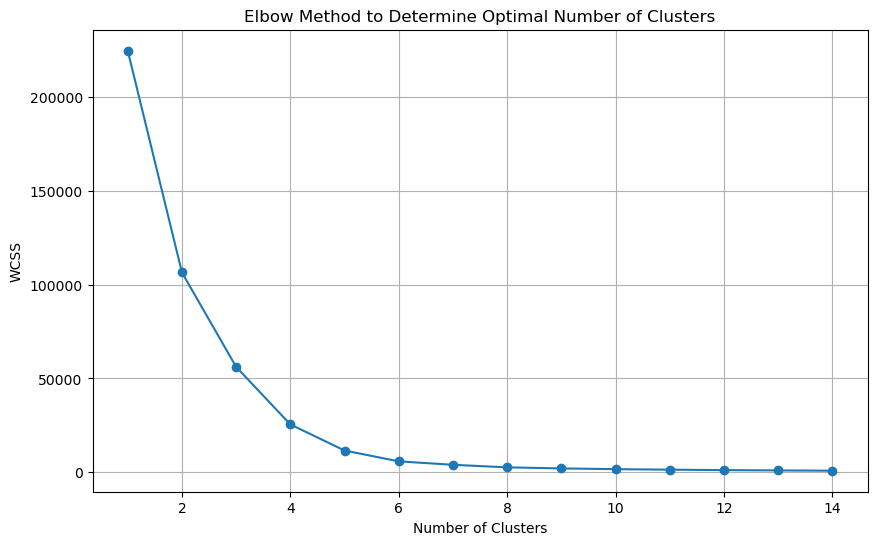

Cluster plot for 2005:


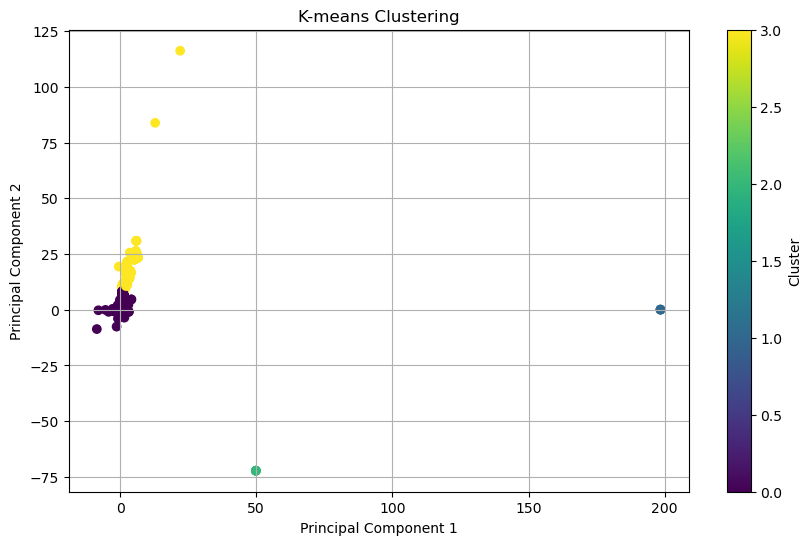

Silhouette plot for 2005:


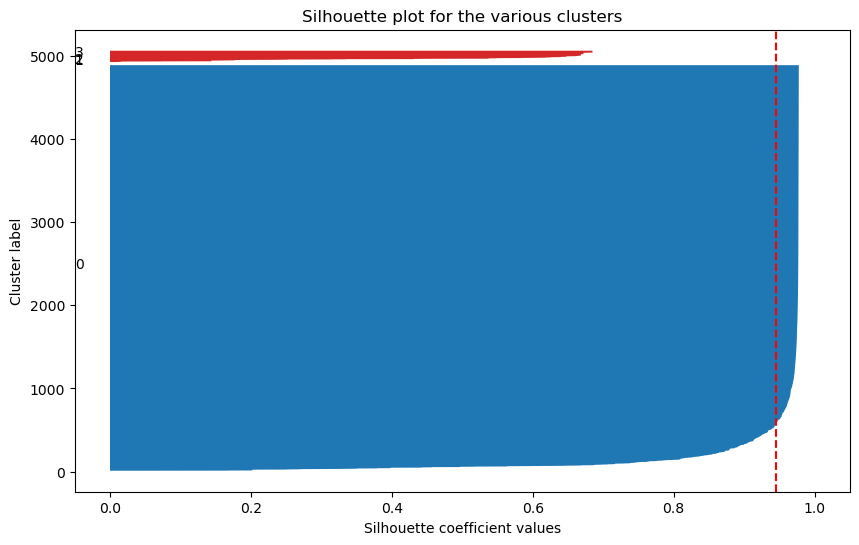


Performing K-means clustering for 2006 dataset...



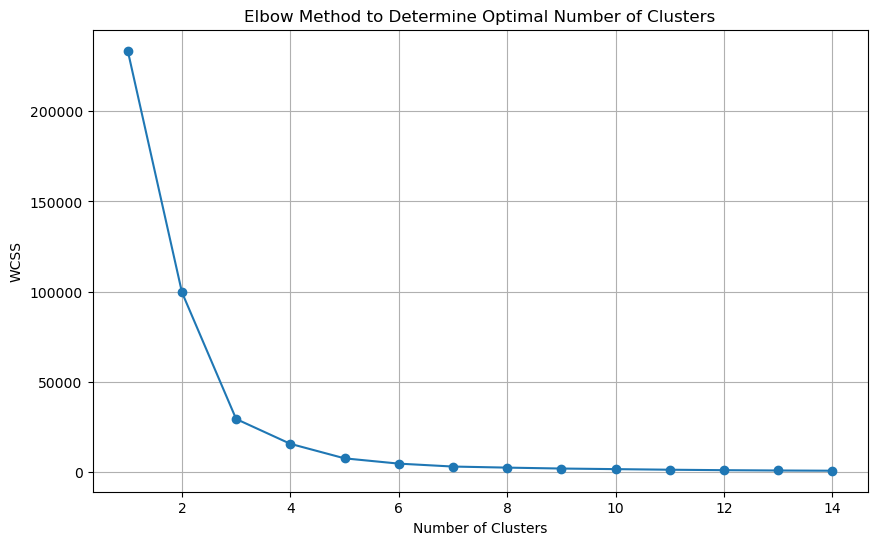

Cluster plot for 2006:


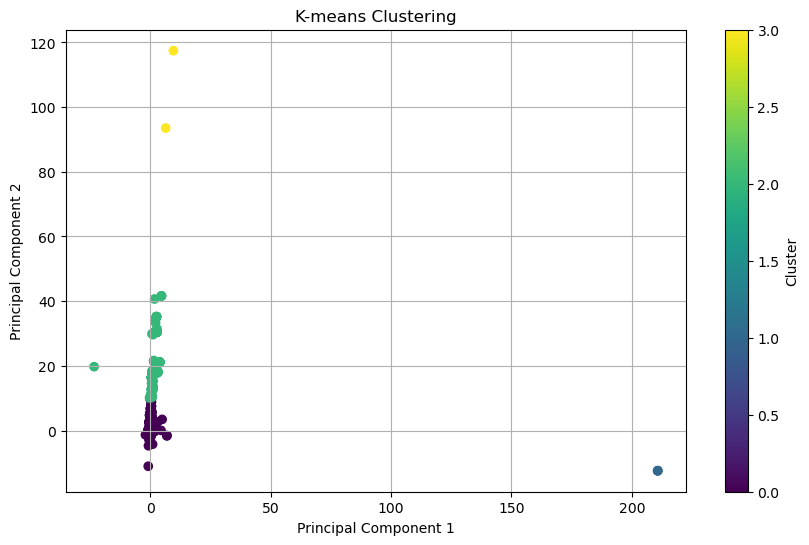

Silhouette plot for 2006:


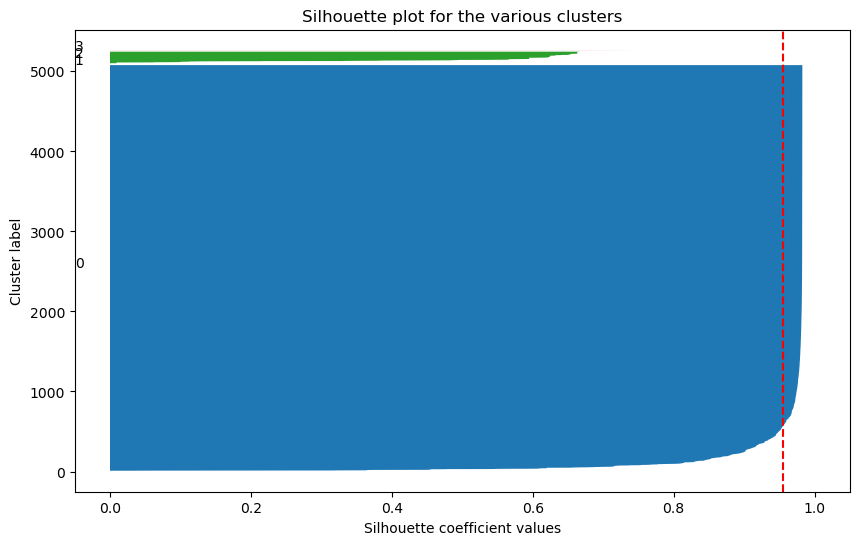


Performing K-means clustering for 2007 dataset...



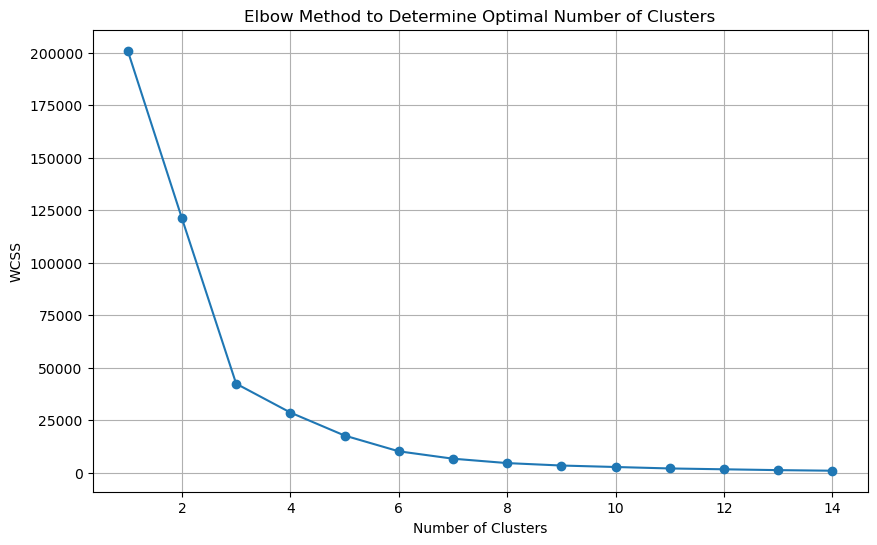

Cluster plot for 2007:


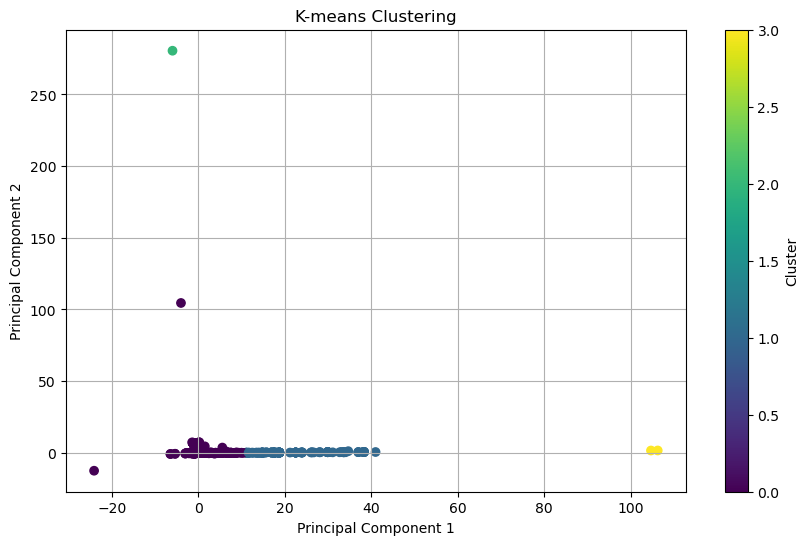

Silhouette plot for 2007:


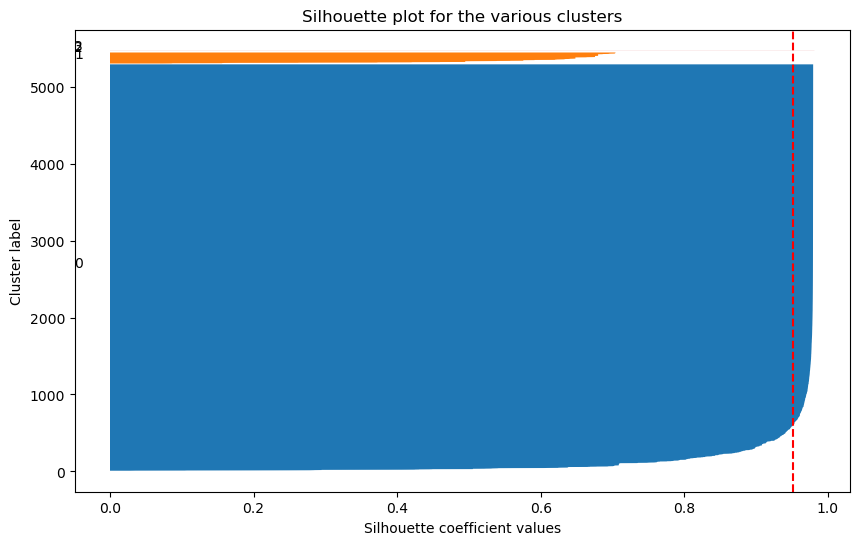


Performing K-means clustering for 2008 dataset...



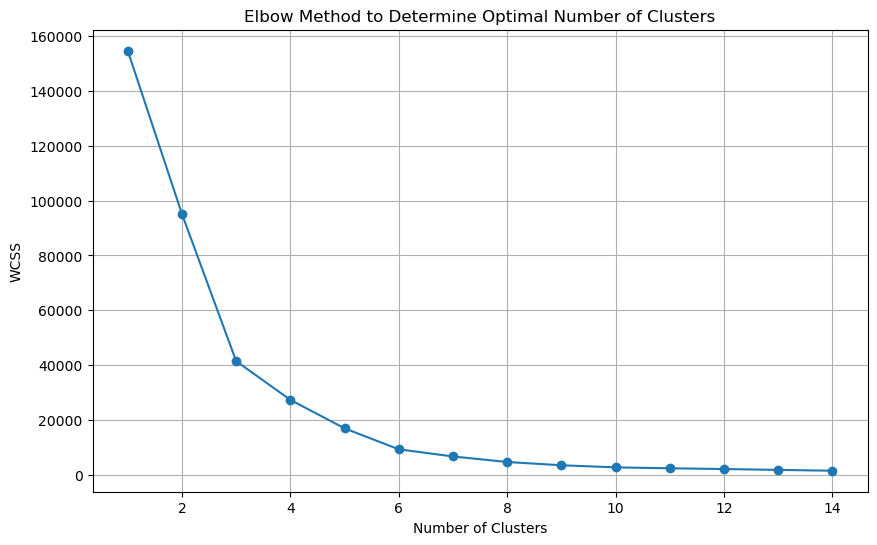

Cluster plot for 2008:


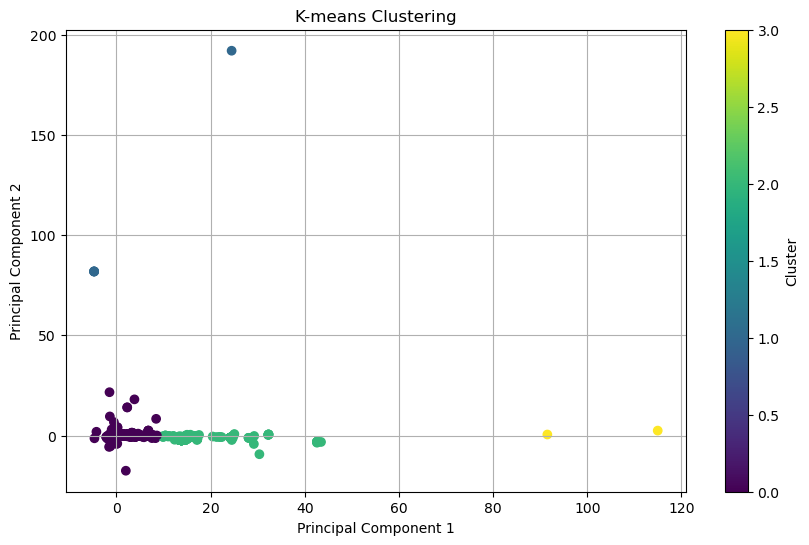

Silhouette plot for 2008:


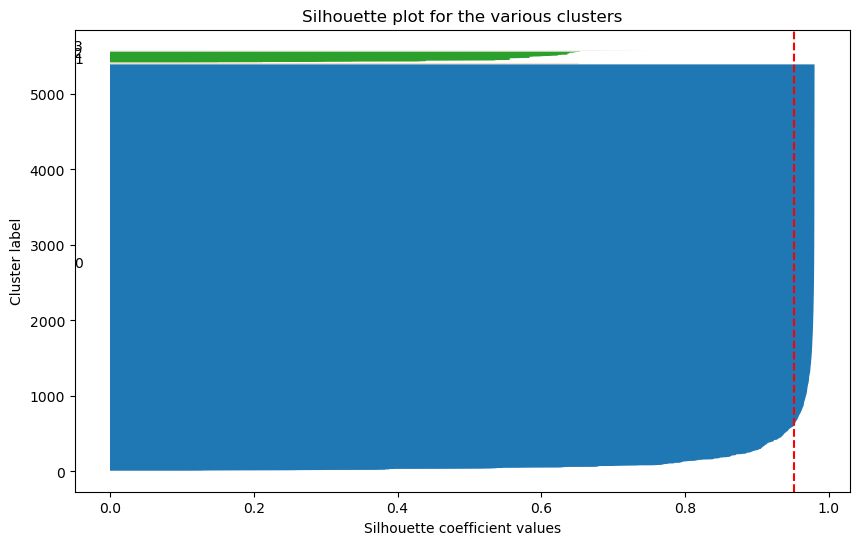


Performing K-means clustering for 2009 dataset...



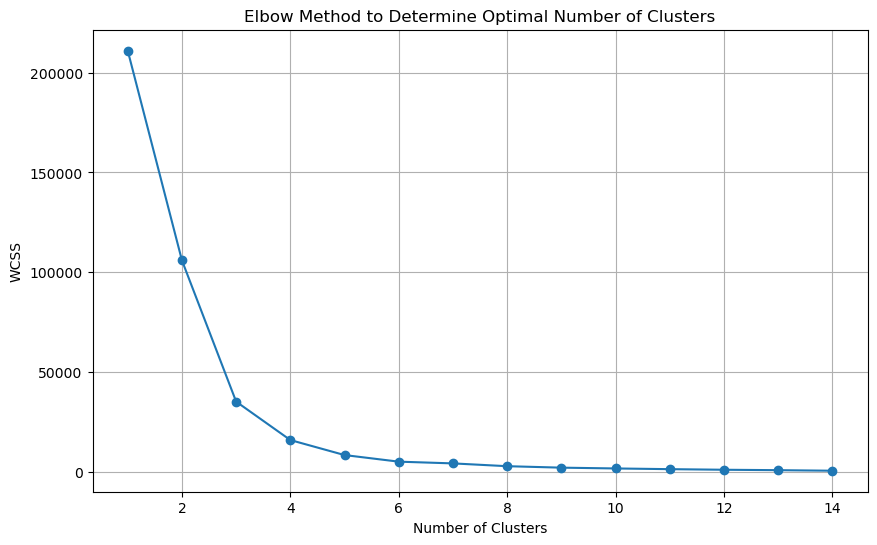

Cluster plot for 2009:


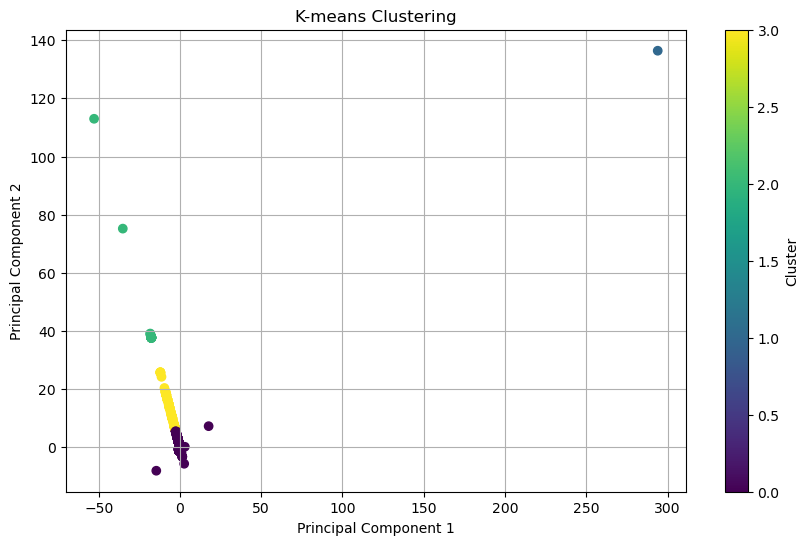

Silhouette plot for 2009:


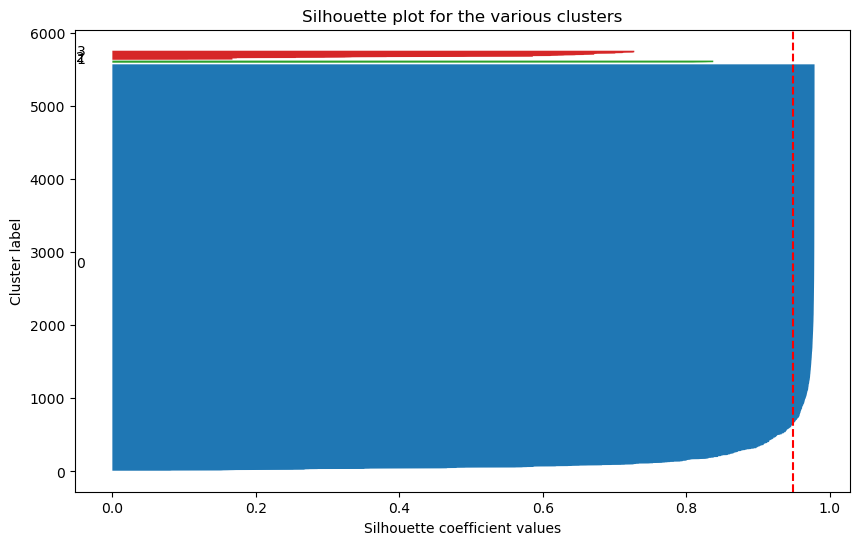


Performing K-means clustering for 2010 dataset...



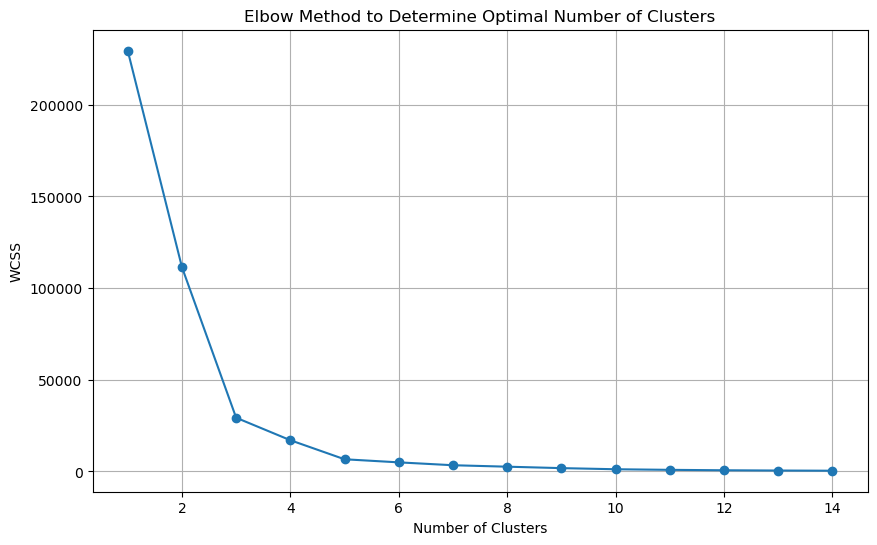

Cluster plot for 2010:


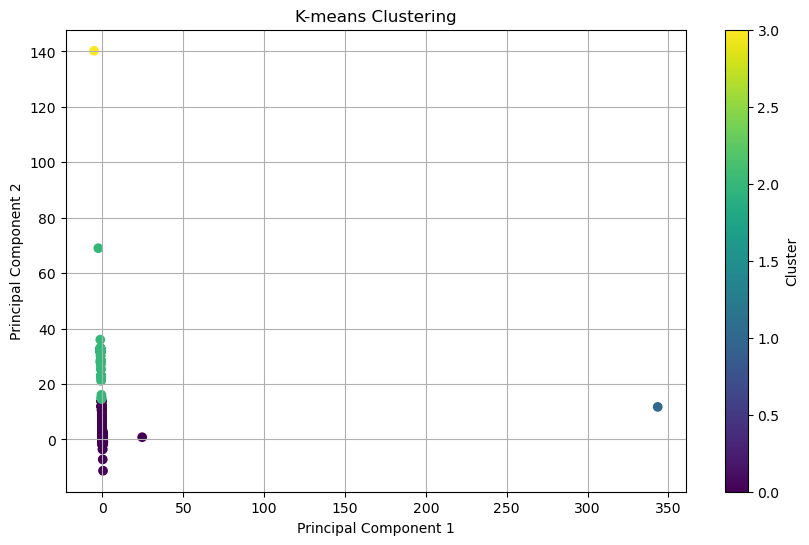

Silhouette plot for 2010:


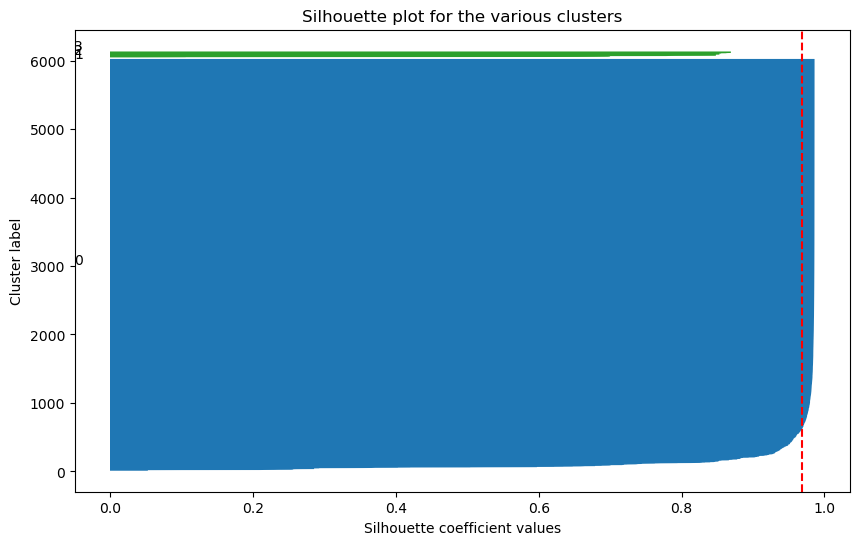


Performing K-means clustering for 2011 dataset...



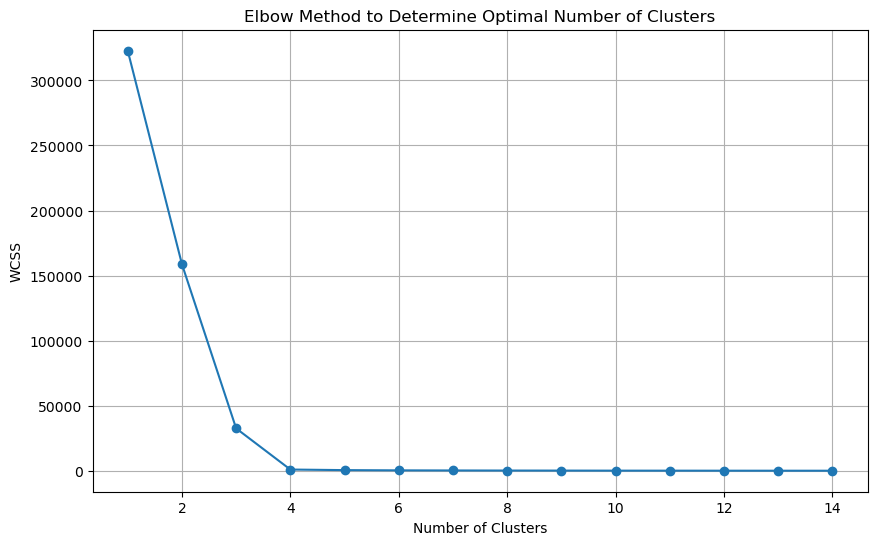

Cluster plot for 2011:


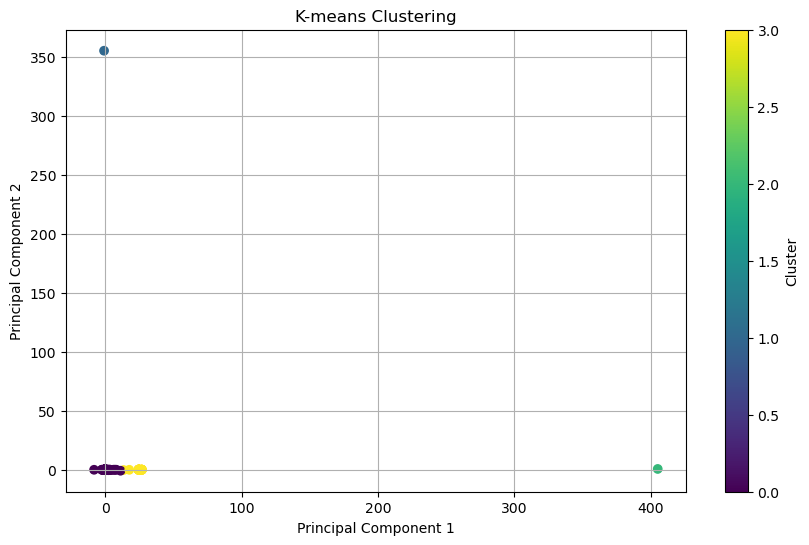

Silhouette plot for 2011:


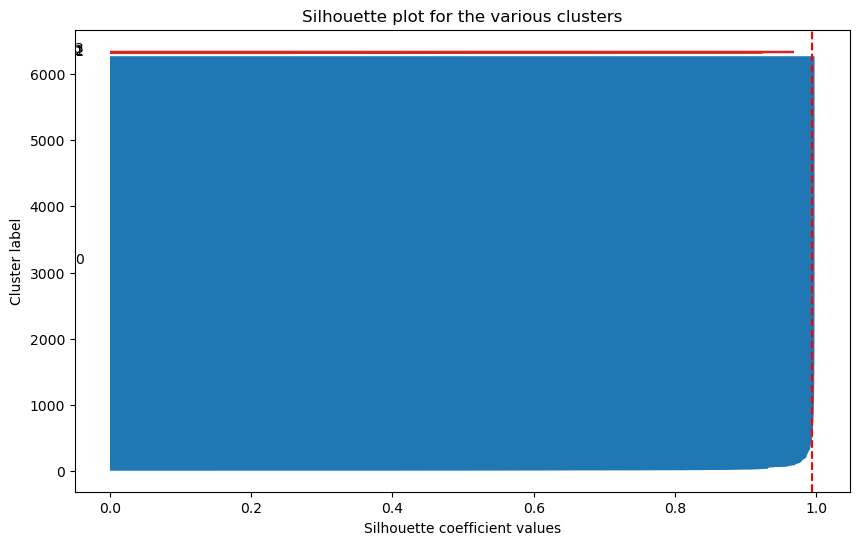


Performing K-means clustering for 2012 dataset...



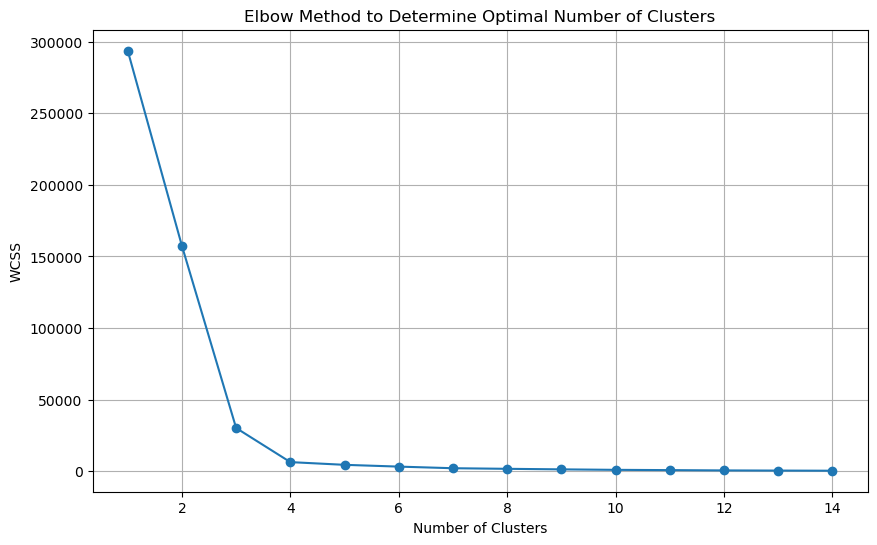

Cluster plot for 2012:


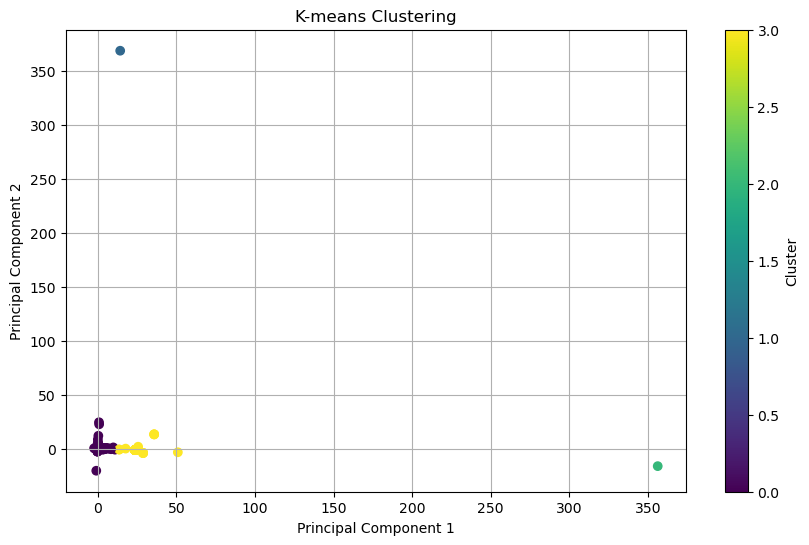

Silhouette plot for 2012:


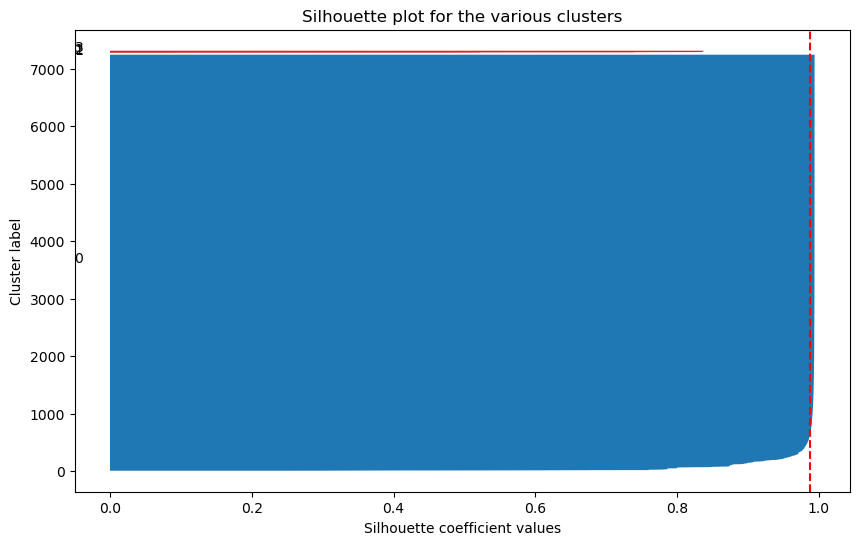


Performing K-means clustering for 2013 dataset...



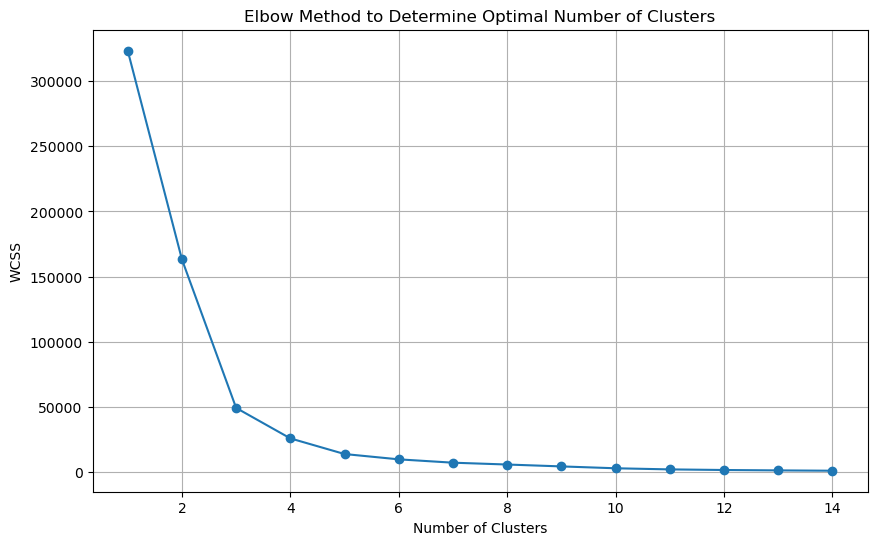

Cluster plot for 2013:


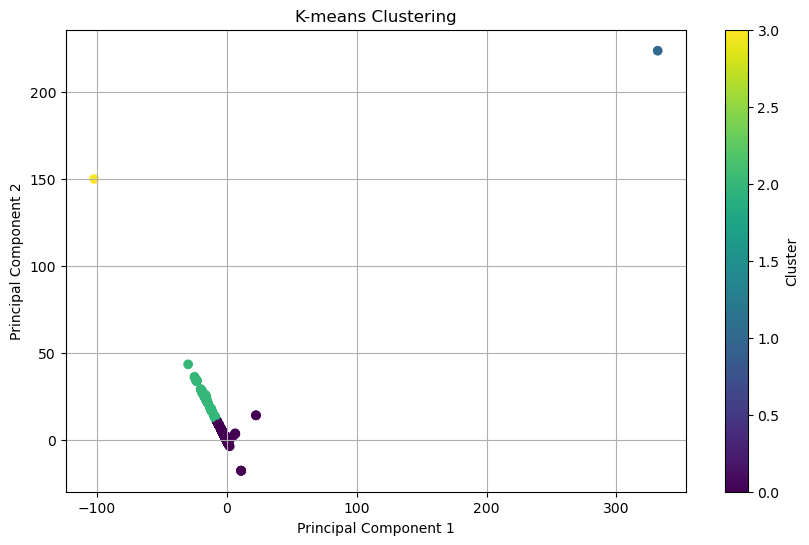

Silhouette plot for 2013:


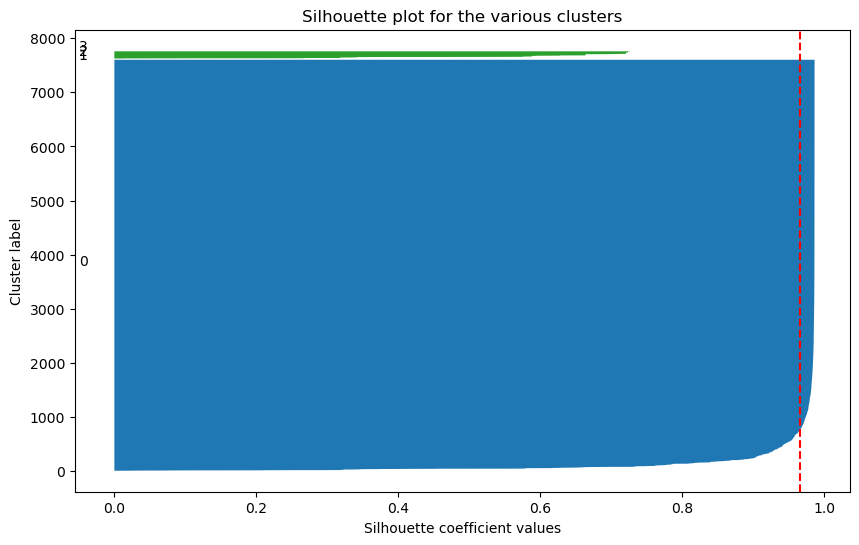


Performing K-means clustering for 2014 dataset...



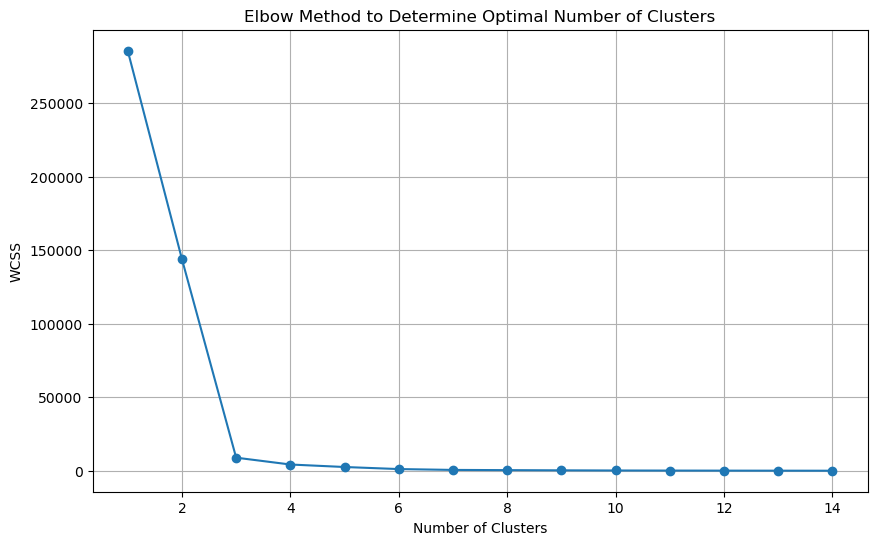

Cluster plot for 2014:


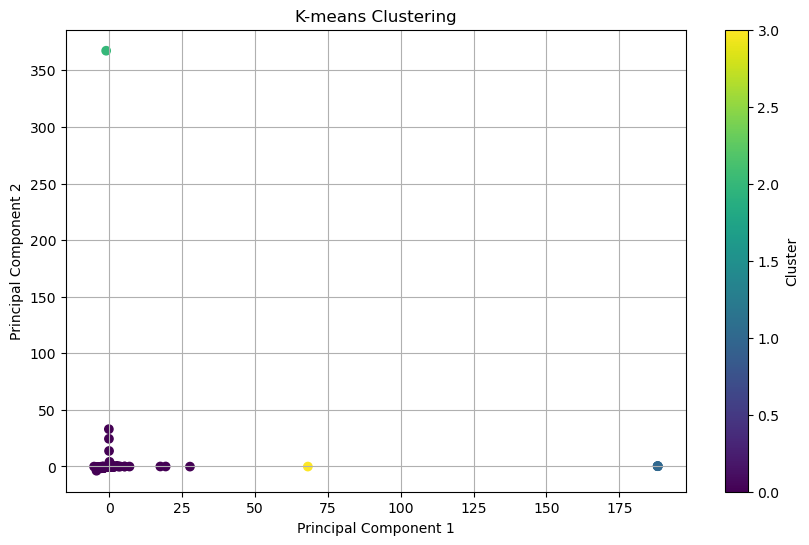

Silhouette plot for 2014:


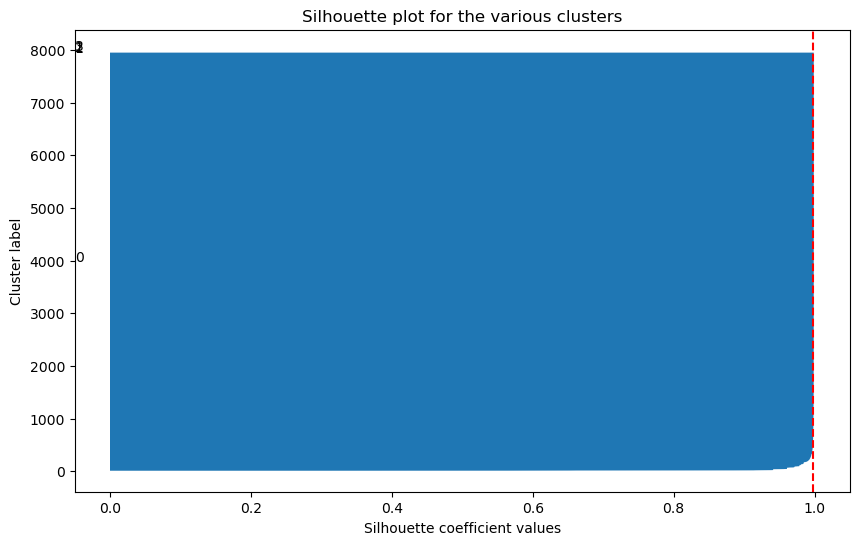


Performing K-means clustering for 2015 dataset...



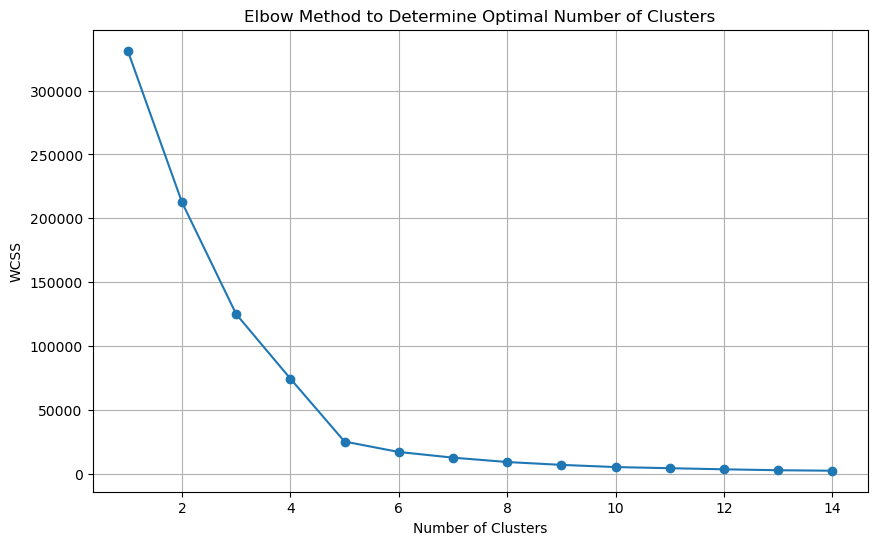

Cluster plot for 2015:


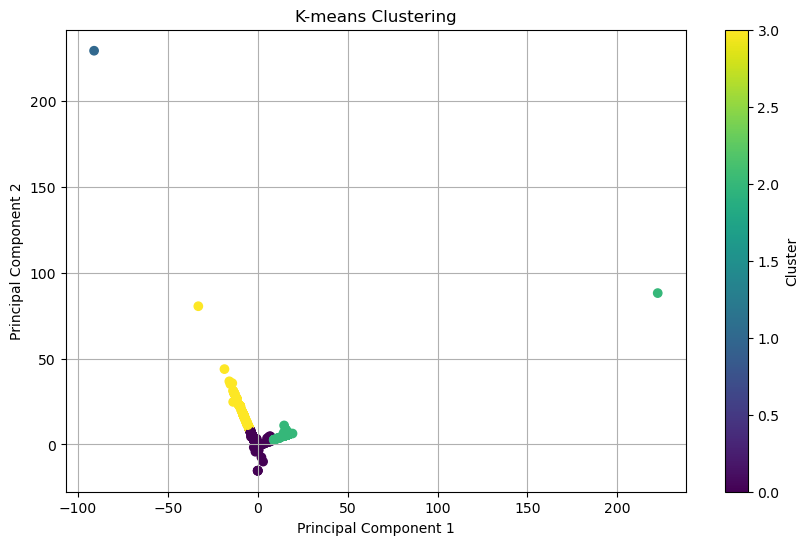

Silhouette plot for 2015:


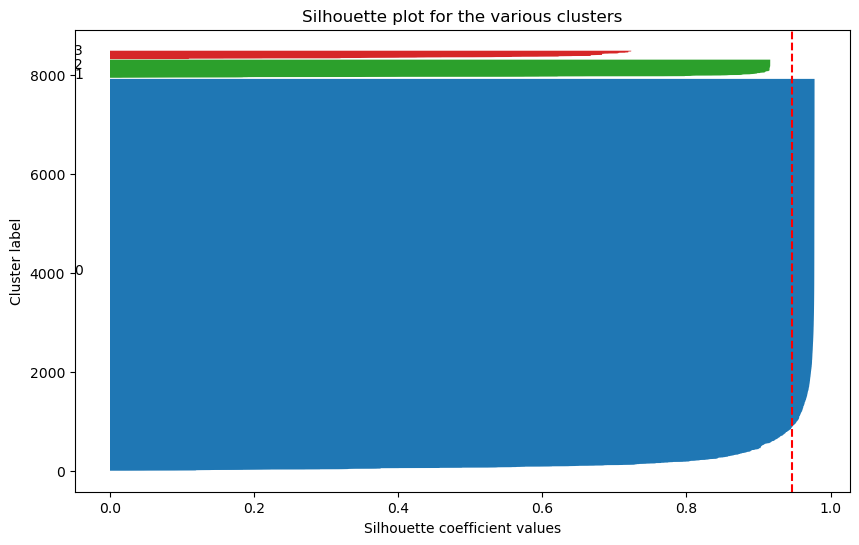


Performing K-means clustering for 2016 dataset...



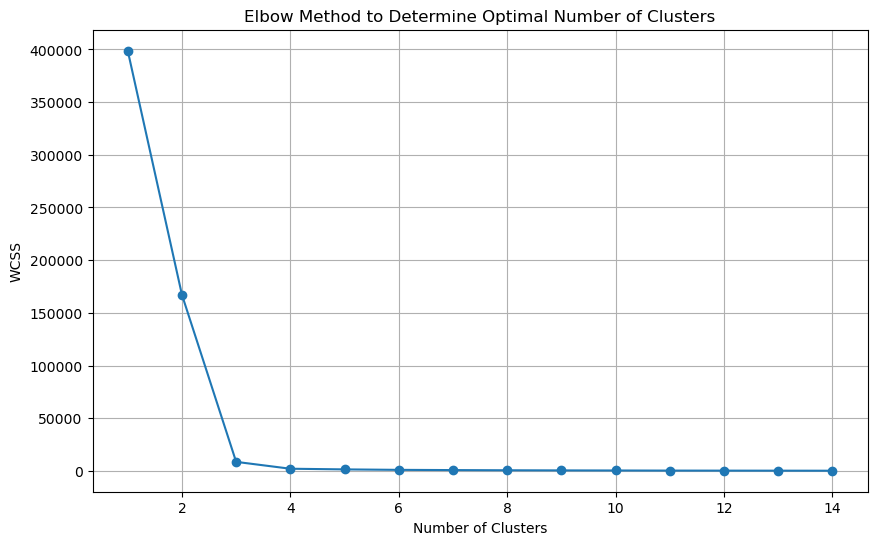

Cluster plot for 2016:


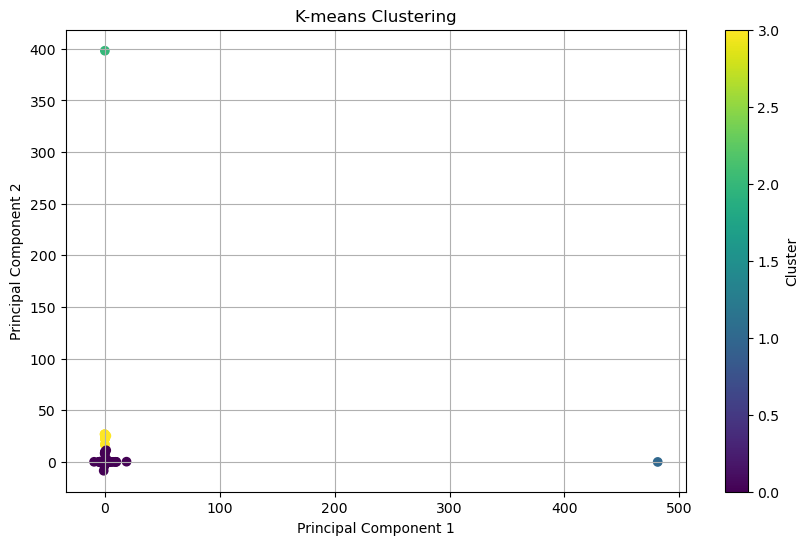

Silhouette plot for 2016:


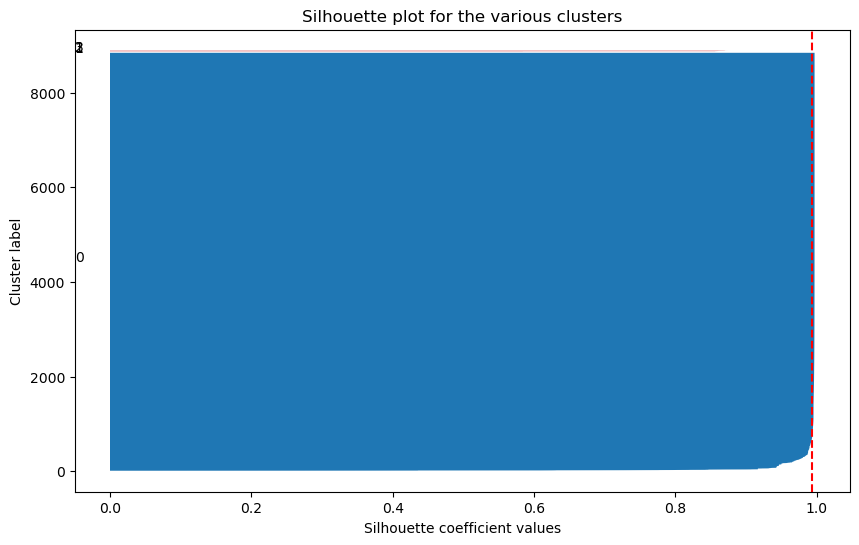


Performing K-means clustering for 2017 dataset...



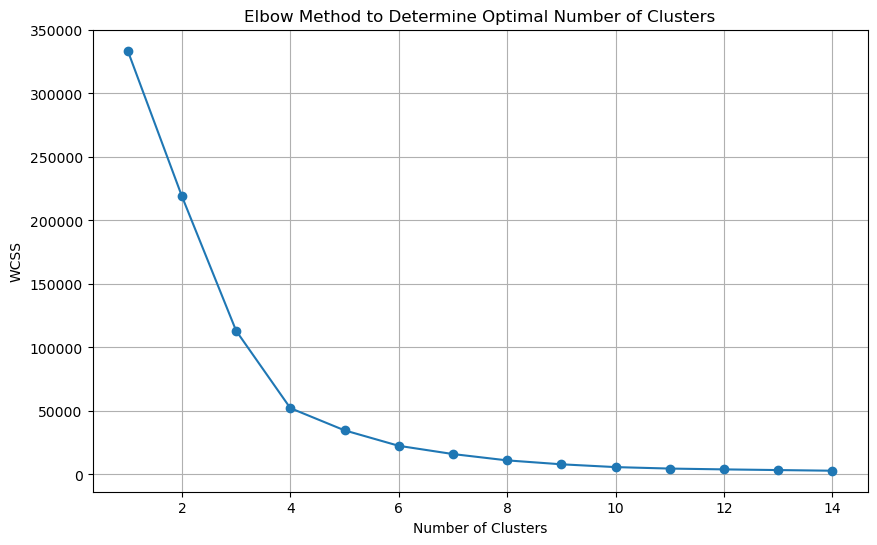

Cluster plot for 2017:


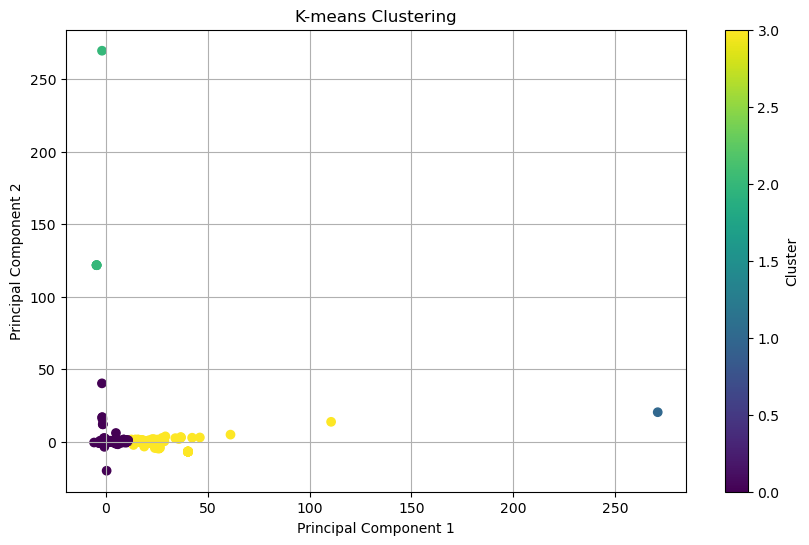

Silhouette plot for 2017:


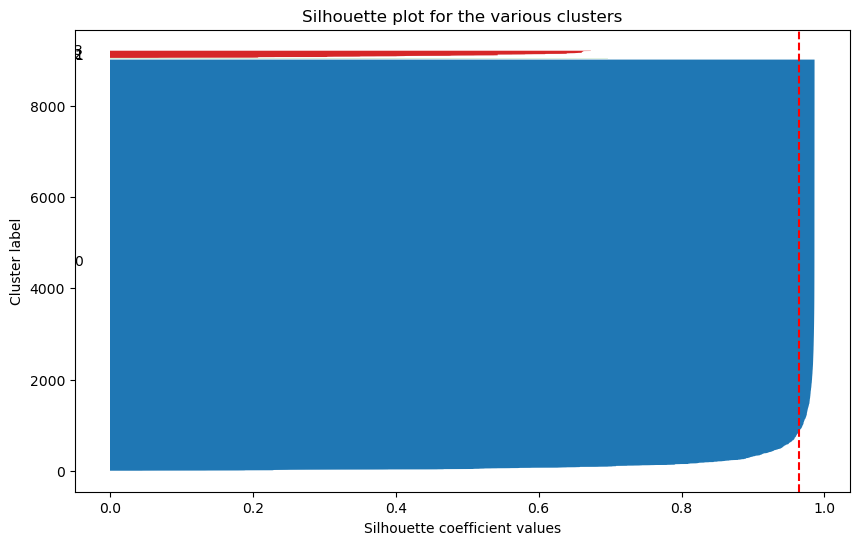


Performing K-means clustering for 2018 dataset...



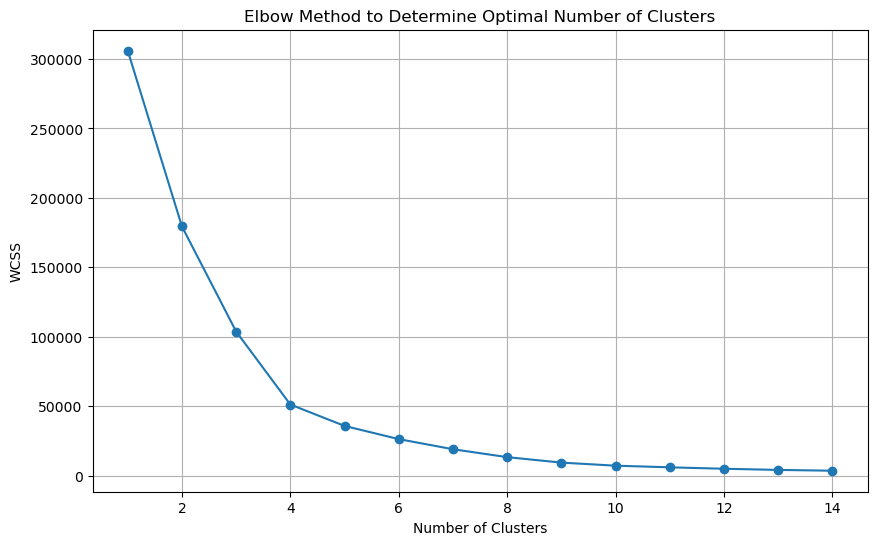

Cluster plot for 2018:


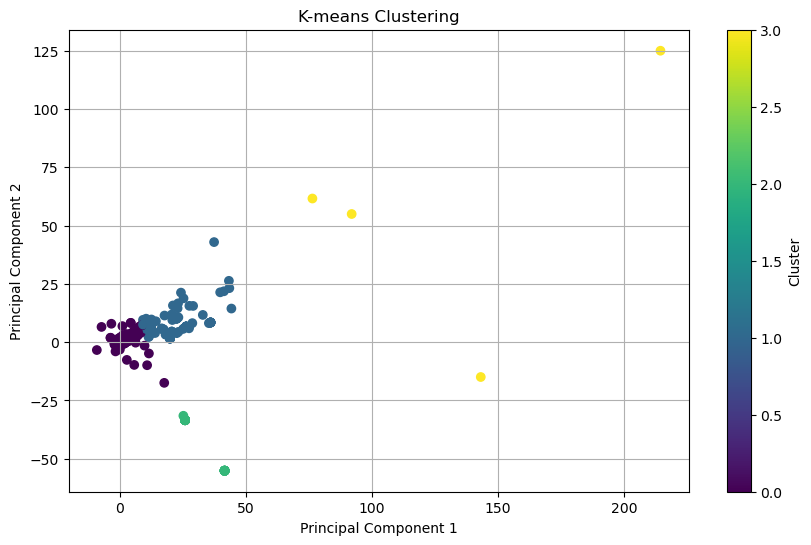

Silhouette plot for 2018:


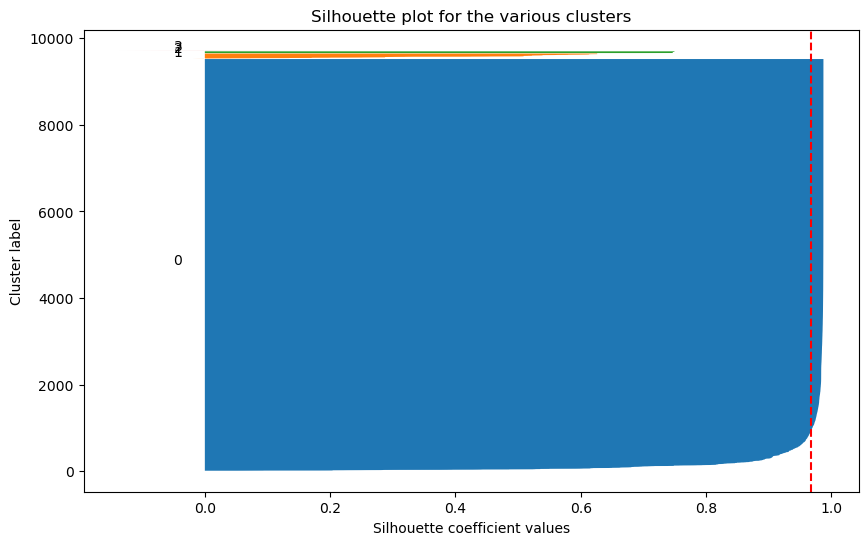


Performing K-means clustering for 2019 dataset...



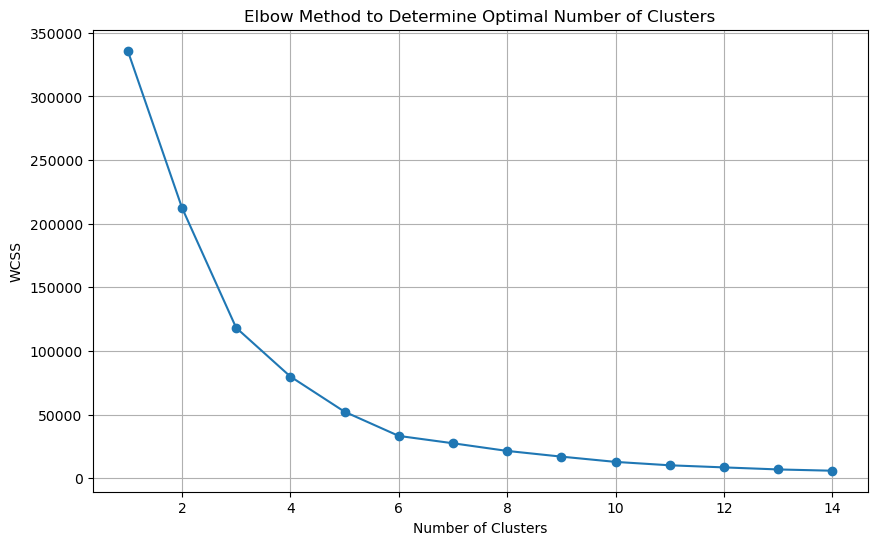

Cluster plot for 2019:


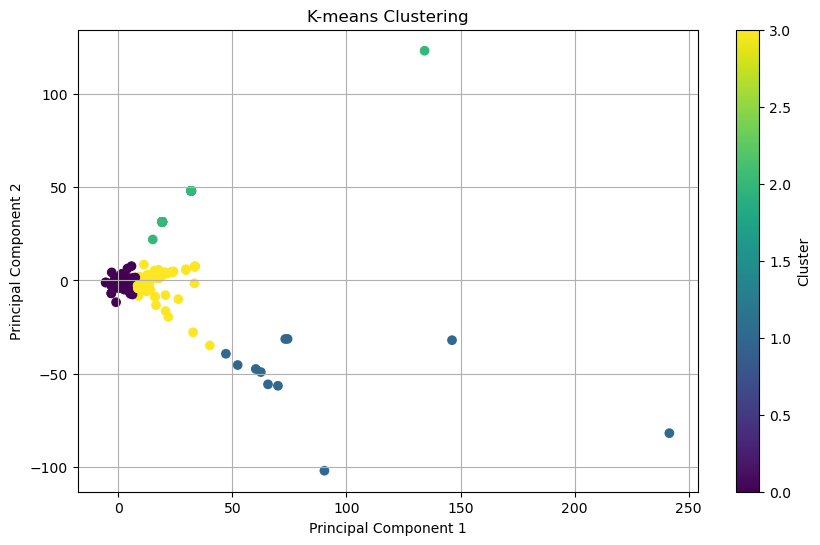

Silhouette plot for 2019:


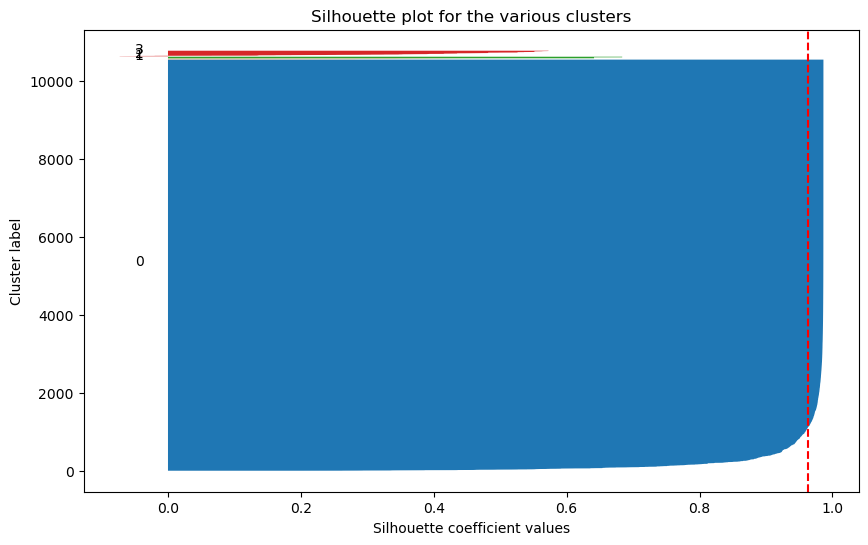


Performing K-means clustering for 2020 dataset...



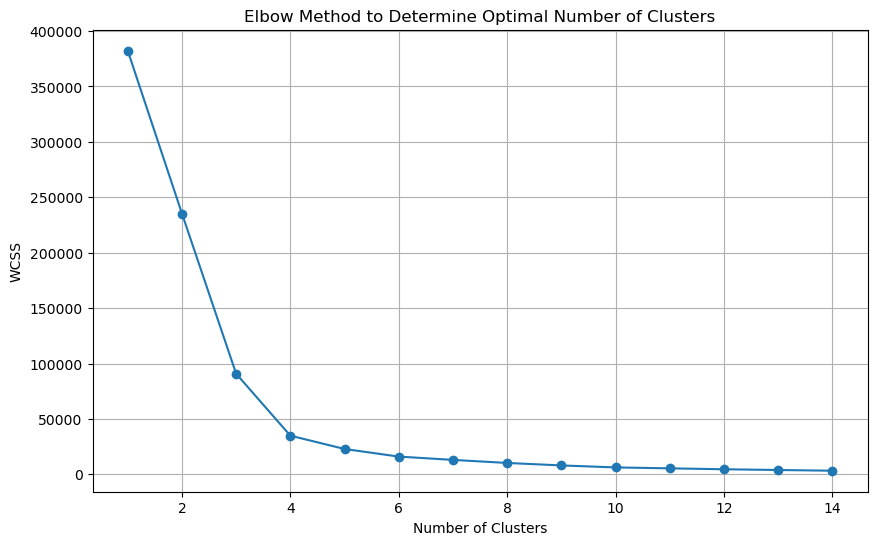

Cluster plot for 2020:


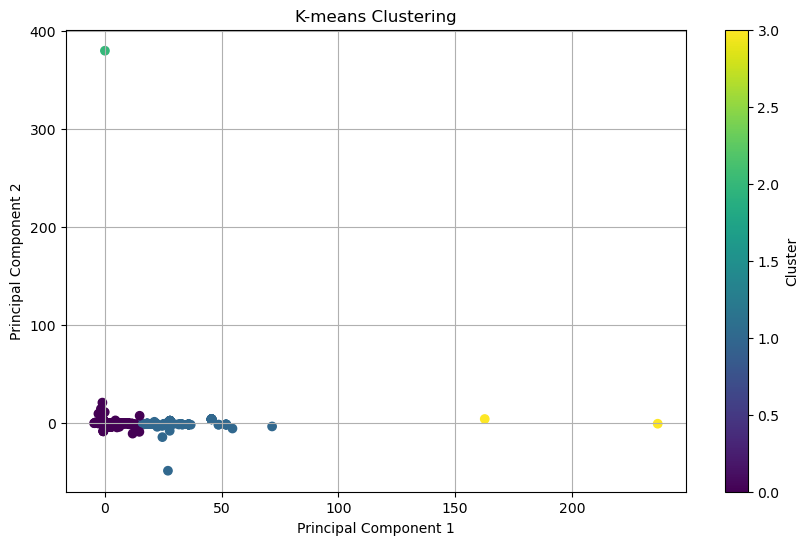

Silhouette plot for 2020:


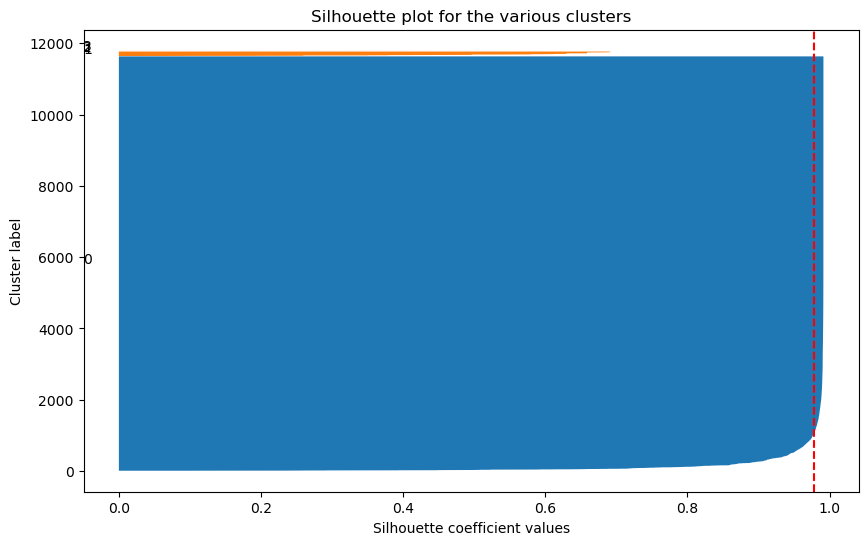


Performing K-means clustering for 2021 dataset...



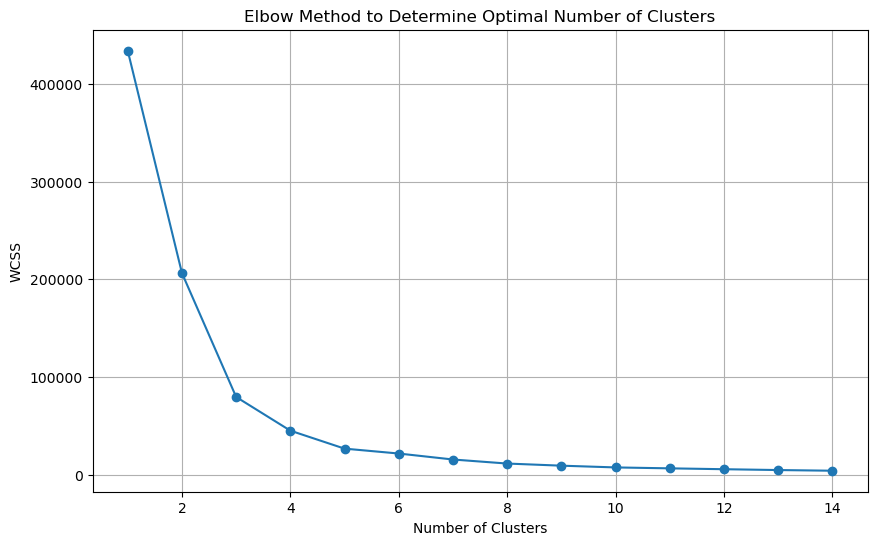

Cluster plot for 2021:


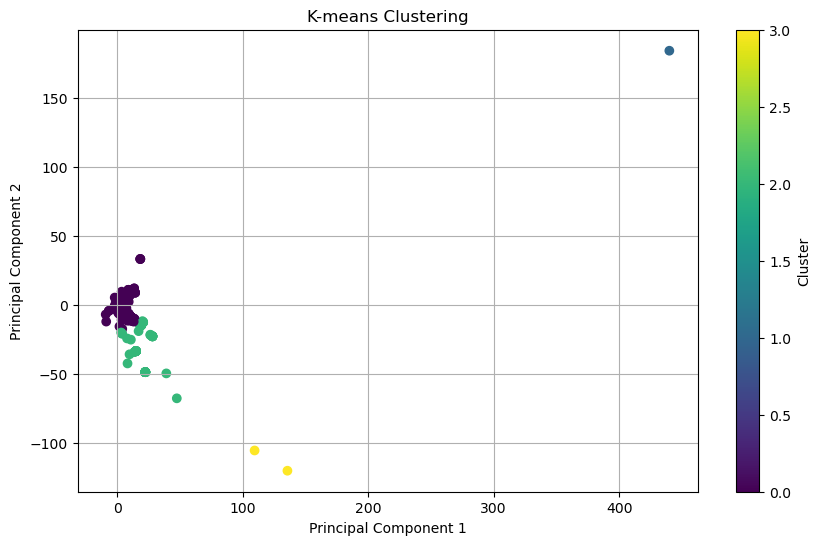

Silhouette plot for 2021:


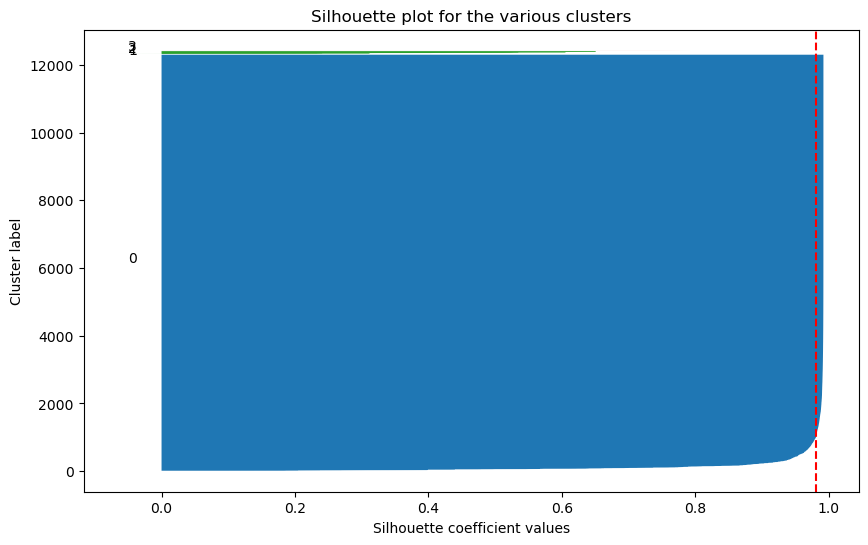


Performing K-means clustering for 2022 dataset...



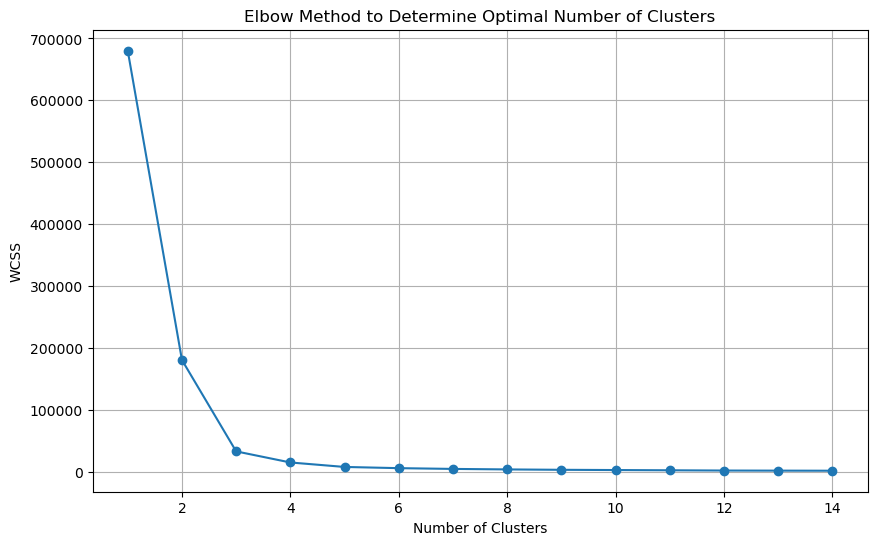

Cluster plot for 2022:


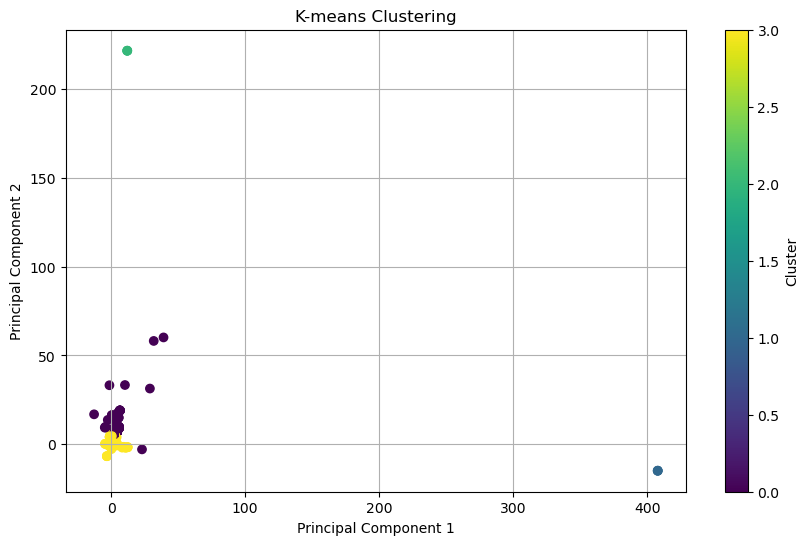

Silhouette plot for 2022:


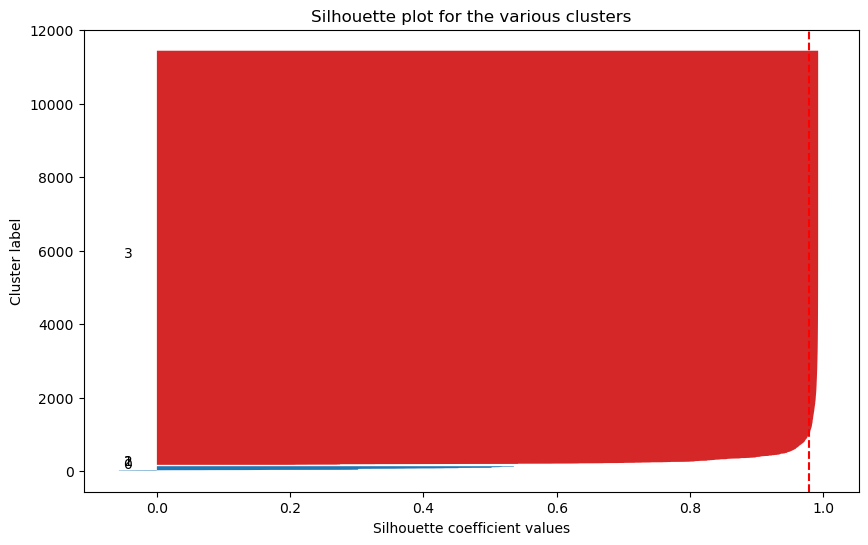


Performing K-means clustering for 2023 dataset...



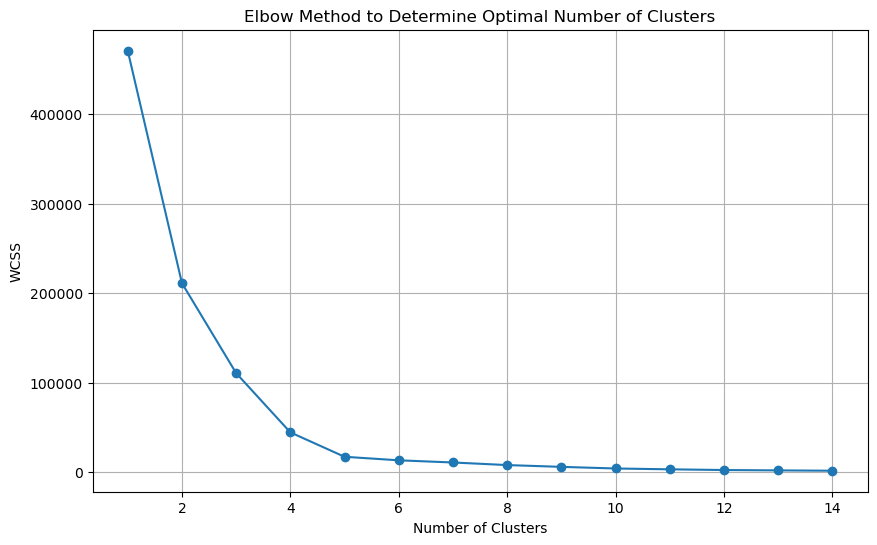

Cluster plot for 2023:


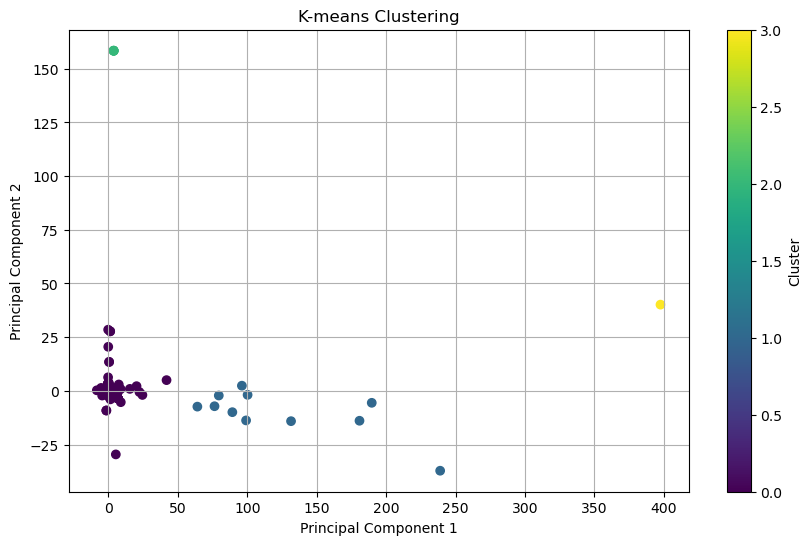

Silhouette plot for 2023:


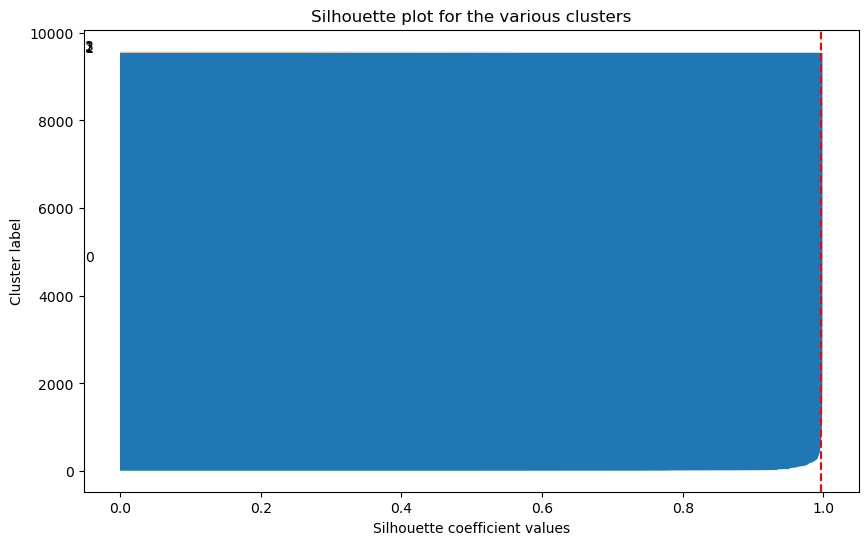

In [14]:
# Loop through each dataset and perform K-means clustering analysis
clustering_results = {}

for year, df in full_df.items():
    try:
        print(f"\nPerforming K-means clustering for {year} dataset...\n")
        
        # Perform K-means clustering analysis
        clusters, cluster_plot, silhouette_avg, silhouette_values = kmeans_clustering_analysis(df)
        
        # Store the clustering results
        clustering_results[year] = {
            'clusters': clusters,
            'cluster_plot': cluster_plot,
            'silhouette_avg': silhouette_avg,
            'silhouette_values': silhouette_values
        }
        
        # Display the cluster plot
        print(f"Cluster plot for {year}:")
        cluster_plot.show()
        plt.close()  # Close the figure to avoid too many open figures

        # Plot silhouette scores
        print(f"Silhouette plot for {year}:")
        plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

    except Exception as e:
        print(f"Error performing clustering analysis on {year}: {e}")


In [ ]:
for year, df in full_df.items():
    test = create_cluster_definition_dataset(df)


### Price Variation Analysis and Investment Decisions by Cluster Definition (2014-2018)

#### 2014 Analysis:
- **Cluster 1: Medium operational performance, medium profitability**  
  - **Price Variation**: Fairly narrow distribution with a median near 0%.  
  - **Investment Decision**: These companies are more stable but may not offer high returns. Suitable for conservative portfolios seeking steady performance with minimal risk.
  
- **Cluster 2: High asset base, high operational performance**  
  - **Price Variation**: Wider distribution and higher volatility, with potential for large gains.  
  - **Investment Decision**: Attractive for growth-oriented investors. High operational and asset base companies may experience larger gains but come with higher risk.

- **Cluster 3: High operational efficiency, medium asset base**  
  - **Price Variation**: Tighter distribution with fewer outliers, indicating stable performance.  
  - **Investment Decision**: Ideal for balanced portfolios, offering moderate returns with relatively low volatility.

- **Cluster 0: Low operational performance, low profitability**  
  - **Price Variation**: Broader, negative distribution, with a significant portion experiencing losses.  
  - **Investment Decision**: Avoid for most portfolios, as these companies are underperforming and carry higher risks of losses.

#### 2015 Analysis:
- **Cluster 1: Low operational performance, low profitability**  
  - **Price Variation**: Wide variation, indicating instability and poor performance.  
  - **Investment Decision**: High risk, likely to underperform. Best to avoid unless betting on a turnaround.

- **Cluster 2: Medium asset base, medium profitability**  
  - **Price Variation**: Stable performance, with fewer extreme outliers.  
  - **Investment Decision**: Suitable for balanced portfolios seeking stable, moderate returns.

- **Cluster 3: High asset base, high operational performance**  
  - **Price Variation**: High volatility with potential for large positive price variations.  
  - **Investment Decision**: Suitable for growth portfolios. Potential for high returns, but expect volatility.

- **Cluster 0: High operational efficiency, medium asset base**  
  - **Price Variation**: Controlled range, indicating stability with moderate gains.  
  - **Investment Decision**: Great for balanced or conservative portfolios. Provides reliable, stable returns.

#### 2016 Analysis:
- **Cluster 2: High asset base, high operational performance**  
  - **Price Variation**: High volatility with some large positive outliers.  
  - **Investment Decision**: Growth-focused investors may find this cluster appealing, with high potential for returns but higher risk.

- **Cluster 1: Low operational performance, low profitability**  
  - **Price Variation**: Negative and low price variation, with many underperforming companies.  
  - **Investment Decision**: Avoid for most portfolios. High risk of losses and poor returns.

- **Cluster 3: High operational efficiency, high asset base**  
  - **Price Variation**: Controlled positive distribution with stability.  
  - **Investment Decision**: Suitable for balanced portfolios seeking steady, predictable returns.

- **Cluster 0: Medium operational performance, medium profitability**  
  - **Price Variation**: Stable with fewer extreme values, indicating moderate returns.  
  - **Investment Decision**: A safe choice for conservative or balanced portfolios aiming for moderate growth with low risk.

#### 2017 Analysis:
- **Cluster 2: High operational performance, high profitability**  
  - **Price Variation**: Positive price variation with large gains, high volatility.  
  - **Investment Decision**: Best suited for aggressive growth portfolios. High returns expected, but with increased risk.

- **Cluster 1: Medium operational performance, medium profitability**  
  - **Price Variation**: Stable with moderate returns.  
  - **Investment Decision**: Ideal for balanced portfolios that prioritize steady returns with lower risk.

- **Cluster 3: High asset base, medium operational efficiency**  
  - **Price Variation**: Steadier, controlled price variations with fewer outliers.  
  - **Investment Decision**: Suitable for conservative investors who value stability and modest returns.

- **Cluster 0: Low profitability, low operational performance**  
  - **Price Variation**: Poor performance with negative price variation.  
  - **Investment Decision**: Avoid for most portfolios, as these companies are likely to underperform.

#### 2018 Analysis:
- **Cluster 2: High operational performance, high profitability**  
  - **Price Variation**: High volatility with potential for large positive returns.  
  - **Investment Decision**: Suitable for high-growth portfolios, but be cautious of the inherent risks in volatile markets.

- **Cluster 1: Medium operational performance, medium profitability**  
  - **Price Variation**: Stable price variation, ideal for steady performance.  
  - **Investment Decision**: Good fit for balanced portfolios seeking moderate growth with low volatility.

- **Cluster 3: High asset base, high operational efficiency**  
  - **Price Variation**: Consistent, positive price variation.  
  - **Investment Decision**: Great for long-term, conservative portfolios that prioritize stability over rapid growth.

- **Cluster 0: Low operational performance, low profitability**  
  - **Price Variation**: Negative performance with poor price variation.  
  - **Investment Decision**: Avoid for most investors due to the high risk of underperformance.

---

### Investment Strategy Recommendations:
1. **Growth-Oriented Portfolios**: Invest in clusters with **high operational performance** and **high asset bases** (Clusters 2 and 3 in most years). These companies are more volatile but offer the potential for higher returns.
2. **Balanced Portfolios**: Focus on clusters with **medium operational performance and medium profitability** (Cluster 1 in most years). These provide stable returns with less volatility, suitable for risk-averse investors.
3. **Conservative Portfolios**: Select clusters with **high operational efficiency** and **medium to high asset bases** (Cluster 3 in many cases). These companies tend to offer more stability, making them ideal for long-term, low-risk investments.
4. **Avoid High-Risk Clusters**: Clusters with **low operational performance** and **low profitability** (Cluster 0) generally show negative or underperforming results. They pose higher risks for losses and should be avoided unless taking a contrarian bet on recovery.

---

### Conclusion:
By analyzing the price variations across different cluster definitions, investors can align their strategies with companies that fit their risk appetite and investment goals. Companies with higher operational performance or asset bases tend to offer greater potential returns, though with increased volatility, while lower-performing clusters should generally be avoided in most investment strategies.


## 3. Target Variable Engineering

In this step, we will create a new **target variable** that identifies stocks that outperform the S&P 500 by more than 2%. Target variable engineering is critical in defining the outcome we want to predict and helps align the model’s learning process with our project’s goal of selecting high-performing stocks.

#### Why Target Variable Engineering?

- **Align with the Project Goal**: The ultimate objective of this project is to build a portfolio of stocks that consistently beats the market. By creating a target variable that reflects stocks outperforming the S&P 500 by more than 2%, we focus the model’s learning on identifying those high-value stocks.
- **Simplify the Prediction Task**: By defining a clear target (outperformance of 2% over the S&P 500), we make the prediction task binary (outperform vs. not outperform), which can improve model accuracy and interpretability.
- **Improve Model Focus**: With a well-defined target, the model will be better able to focus on stocks with the highest potential for positive returns, helping us achieve the goal of beating the market.

#### Steps:
1. **Calculate S&P 500 Performance**: We will use historical data to calculate the S&P 500 returns for the same time period as the stocks in the dataset.
2. **Compare Stock Performance to S&P 500**: For each stock, we will compare its annual performance to the S&P 500. If a stock's performance exceeds the S&P 500 by more than 2%, it will be labeled as a **1** (outperform). Otherwise, it will be labeled as **0** (underperform).
3. **Create the Binary Target Variable**: The target variable will be a binary feature, where 1 represents stocks that outperform the S&P 500 by more than 2%, and 0 represents stocks that do not.

By engineering this target variable, we create a clear objective for the model to focus on: selecting stocks with the highest potential to outperform the market by a significant margin.


In [ ]:
# Function to get annual returns for the S&P 500 from Yahoo Finance
def get_sp500_returns(start_year, end_year):
    sp500 = yf.Ticker("^GSPC")
    # Fetch data starting from the year before the first year to calculate percentage change correctly
    sp500_data = sp500.history(period="1d", start=f"{start_year-1}-01-01", end=f"{end_year}-12-31")
    
    # Calculate the annual returns for each year
    sp500_annual_returns = sp500_data['Close'].resample('Y').ffill().pct_change() * 100  # Convert to percentage
    sp500_annual_returns.index = sp500_annual_returns.index.year  # Change index to just the year
    
    # Drop the first year (start_year - 1), as we only care about returns starting from the first full year
    sp500_annual_returns = sp500_annual_returns.loc[start_year:]
    
    return sp500_annual_returns

# Fetch S&P 500 annual returns from 2015 to 2019 (starting from 2014 to calculate the percentage change)
sp500_returns = get_sp500_returns(2015, 2019)

# Threshold for outperforming S&P 500 by more than 2%
outperformance_threshold = 2

# New df to merge
all_dfs = []

# Create the target variable for each dataset
for year, df in full_df.items():
    # Calculate the corresponding S&P 500 return (e.g., 2014 data corresponds to 2015 performance)
    next_year = int(year) + 1
    if next_year in sp500_returns.index:
        sp500_return = sp500_returns[next_year]
        
        # Calculate the threshold for outperformance
        target_threshold = sp500_return + outperformance_threshold
        
        # Create the target variable 'Outperform' (1 if stock outperforms by more than 2%, 0 otherwise)
        df['Outperform'] = np.where(df['PRICE VAR [%]'] > target_threshold, 1, 0)
        
         # Convert the 'Sector' column to dummy variables
        if 'Sector' in df.columns:
            sector_dummies = pd.get_dummies(df['Sector'], drop_first=True).astype(int)
            df = pd.concat([df, sector_dummies], axis=1).drop(columns=['Sector'])
        
        # Append the dataframe to the list
        all_dfs.append(df)
    else:
        print(f"S&P 500 return data for {next_year} not available.")

# Merge all datasets into one
merged_df = pd.concat(all_dfs, ignore_index=True)

# Define the output path
output_path = f"data/for_modeling_datasets/full_Financial_Data_for_modeling.csv"

# Save the merged dataset to the specified output path
os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create directory if it doesn't exist
merged_df.to_csv(output_path, index=False)

print(f"Saved merged dataset with target variable and dummy variables to {output_path}")

# Preview the first 50 rows of the merged dataset
merged_df.head(50)

In [ ]:
sp500_returns.head()

In [ ]:
df_test = pd.read_csv('data/for_modeling_datasets/full_Financial_Data_for_modeling.csv')
df_test.columns.tolist()

### 4. Next Steps: Modeling Classification

With the data preprocessed, outliers handled, features engineered, and the target variable created, the next step in this project will be to build and evaluate **classification models**. The goal is to predict whether a stock will **outperform** the S&P 500 by more than 2% based on the financial indicators.

We will implement and evaluate several classification models, including:

1. **Logistic Regression**:
   - A simple and interpretable linear model that will serve as a baseline for classification performance.

2. **Random Forest Classifier**:
   - A robust ensemble model that leverages decision trees and provides feature importance, which may be useful for understanding which indicators contribute the most to stock outperformance.

3. **Gradient Boosting Classifier (e.g., XGBoost, LightGBM)**:
   - Advanced boosting models that can handle complex patterns and interactions between features, potentially improving performance.

4. **Support Vector Machines (SVM)**:
   - A powerful model that aims to find the optimal hyperplane separating outperforming stocks from underperforming ones.

5. **K-Nearest Neighbors (KNN)**:
   - A simple yet effective method that classifies stocks based on their similarity to neighboring data points.

6. **Artificial Neural Networks (Sequential ANN)**:
   - A deep learning model that can capture non-linear relationships in the data. We will build a **Sequential ANN** to model complex interactions between financial indicators.

### Key Steps in the Modeling Process:
- **Model Training**: Train each model using the cleaned and engineered dataset.
- **Model Evaluation**: Evaluate the models using standard classification metrics such as **accuracy**, **precision**, **recall**, **F1 score**, and **AUC-ROC**.
- **Model Comparison**: Compare the performance of all models and select the best-performing model for predicting stock outperformance.
